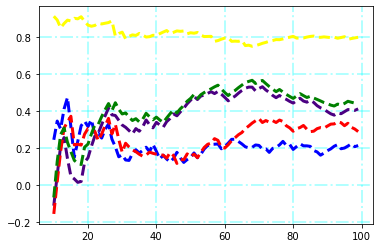

    number of node     corrd    corrbw    corrcc    corrsc    corrac
0               10 -0.111111  0.244444 -0.155556 -0.066667  0.911111
1               11  0.054545  0.345455  0.018182  0.127273  0.890909
2               12  0.212121  0.303030  0.181818  0.272727  0.848485
3               13  0.256410  0.410256  0.307692  0.307692  0.871795
4               14  0.142857  0.472527  0.340659  0.230769  0.890110
..             ...       ...       ...       ...       ...       ...
85              95  0.396193  0.200000  0.320493  0.440538  0.800672
86              96  0.407456  0.210526  0.333772  0.452193  0.786404
87              97  0.406787  0.222509  0.311856  0.447165  0.790808
88              98  0.402903  0.207238  0.302756  0.442457  0.794235
89              99  0.411255  0.213358  0.288806  0.449598  0.797568

[90 rows x 6 columns]


In [2]:
#program for correltion between kendall's tau coefficient and top-100 nodes
import csv
import networkx as nx
import numpy as np
from operator import itemgetter 
from scipy.stats import kendalltau
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

vertices_Lasp= [2170, 3519, 2524, 412, 655, 2895, 1184, 1177, 3156, 3574, 637, 1418, 933, 3164, 2589, 819, 2688, 2935, 2458, 2797, 3311, 3746, 2067, 3581, 881, 3573, 3038, 2993, 3837, 3318, 2076, 444, 1159, 1628, 3016, 1824, 856, 1690, 3530, 1430, 3294, 2847, 2248, 1165, 2363, 2157, 1670, 1829, 2854, 429, 306, 2188, 1550, 3423, 300, 3842, 2953, 2881, 1206, 564, 590, 3015, 2846, 3047, 1877, 670, 748, 851, 3510, 1518, 3513, 3418, 639, 2276, 1203, 1889, 3316, 2455, 741, 1344, 3549, 3105, 2176, 3376, 3335, 716, 2247, 360, 2185, 3762, 1940, 434, 678, 528, 954, 654, 3867, 1904, 2856, 2391, 723, 131, 2338, 1057, 3198, 2883, 287, 1722, 1691, 161, 1464, 1685, 1276, 1198, 1335, 3586, 2611, 2198, 2981, 709, 1847, 889, 383, 2355, 3399, 3705, 3226, 556, 2989, 2249, 201, 1893, 915, 3839, 1024, 458, 1448, 506, 2278, 1361, 3885, 781, 1783, 3786, 2292, 646, 3356, 1419, 117, 2742, 976, 1688, 3322, 3531, 676, 3532, 20, 1438, 2498, 1734, 3379, 2309, 3800, 2056, 2858, 1526, 788, 485, 2409, 1182, 1962, 427, 3420, 1864, 2148, 1700, 1064, 3037, 2006, 3843, 3890, 2231, 3873, 1371, 2079, 1705, 2167, 3249, 758, 3801, 949, 3128, 611, 1029, 3641, 958, 3020, 718, 3053, 3087, 3246, 2221, 3761, 2569, 2302, 1491, 1745, 3124, 328, 303, 3704, 3005, 2623, 2216, 630, 2896, 2966, 1007, 2085, 2591, 840, 2028, 559, 3614, 1976, 3118, 3043, 2236, 2328, 1712, 1466, 2071, 3778, 1296, 2268, 26, 510, 3828, 3782, 3262, 33, 1593, 103, 1910, 931, 852, 359, 809, 230, 1282, 1779, 296, 1429, 568, 3202, 3568, 2372, 765, 2970, 3540, 1533, 2750, 760, 1105, 2870, 3206, 1876, 1470, 337, 1120, 696, 58, 2253, 105, 2132, 858, 689, 1881, 1835, 324, 1239, 2070, 198, 2754, 2636, 2172, 1843, 2261, 269, 884, 498, 2369, 3136, 2001, 454, 1900, 1791, 763, 3371, 3710, 395, 2712, 1515, 2156, 382, 2833, 2545, 1912, 1318, 2496, 1762, 2680, 829, 3719, 624, 3286, 3442, 1207, 890, 141, 565, 2091, 2923, 2698, 1875, 2542, 1427, 249, 1711, 928, 2149, 2963, 1433, 168, 904, 686, 390, 228, 2732, 1143, 1897, 2044, 110, 917, 1264, 3214, 3576, 3132, 1630, 3693, 1061, 2897, 3256, 3736, 3819, 1069, 3111, 2195, 3039, 2495, 384, 3051, 3810, 1467, 2313, 1780, 2127, 150, 461, 1059, 2619, 380, 740, 3310, 2271, 3168, 60, 210, 3700, 41, 982, 3567, 1349, 1179, 3686, 428, 1104, 3604, 732, 2320, 1311, 2563, 343, 2728, 3284, 3483, 2508, 1591, 3264, 830, 2465, 833, 871, 2099, 3417, 860, 2679, 1807, 610, 923, 1378, 1663, 3325, 1266, 867, 361, 1974, 2675, 417, 1345, 1308, 3352, 3857, 1841, 488, 2229, 3025, 13, 3555, 68, 3538, 2711, 1661, 3126, 3821, 1906, 2866, 3055, 0, 1838, 1744, 14, 2543, 1, 1009, 1171, 1465, 2069, 2080, 1856, 3799, 1033, 2717, 1603, 942, 3678, 952, 815, 2, 3656, 3459, 1157, 1993, 3, 386, 2659, 2160, 1925, 3511, 372, 1506, 2303, 1634, 1706, 749, 2790, 452, 1936, 2915, 2972, 1100, 2918, 3026, 2406, 1673, 11, 2250, 2350, 1050, 1060, 1457, 3054, 72, 1553, 1114, 3525, 2064, 3791, 1595, 1596, 545, 1840, 423, 1788, 2890, 603, 1498, 703, 1073, 1422, 3283, 2590, 3431, 354, 1720, 3291, 2773, 2804, 2476, 2036, 46, 1986, 2588, 3507, 566, 4, 667, 1931, 5, 275, 1874, 3832, 1929, 3237, 1209, 578, 3852, 1452, 2361, 2005, 77, 3409, 2816, 80, 2454, 1119, 771, 3204, 2201, 2764, 1609, 315, 3550, 1193, 2344, 1370, 2593, 2472, 3221, 3062, 3747, 3082, 2713, 911, 6, 7, 495, 3189, 2109, 1920, 1961, 3651, 2179, 3339, 938, 48, 2549, 3122, 2984, 3870, 908, 2449, 3143, 965, 229, 1729, 9, 2848, 2424, 920, 393, 455, 130, 2731, 3536, 3392, 2126, 2055, 3135, 450, 245, 2584, 1190, 1530, 1617, 1678, 3238, 3096, 75, 111, 2801, 187, 3397, 1268, 516, 2860, 2672, 3662, 3476, 76, 3701, 12, 3336, 1865, 2661, 2724, 3235, 1696, 342, 264, 126, 2571, 1980, 2241, 2373, 3394, 460, 3659, 1399, 2024, 1998, 1775, 2821, 2799, 1122, 2998, 3884, 2464, 2206, 362, 3244, 672, 3552, 1977, 2772, 325, 3883, 2474, 3437, 1497, 15, 2435, 3468, 937, 753, 16, 971, 3287, 592, 3314, 3541, 17, 2931, 18, 51, 1004, 3017, 2646, 2329, 19, 375, 190, 2323, 2639, 947, 657, 530, 1403, 693, 36, 974, 22, 1125, 23, 3731, 1389, 399, 250, 2985, 3767, 2695, 3684, 1792, 557, 3816, 3755, 415, 24, 1173, 2770, 2933, 1149, 879, 373, 1531, 25, 2062, 828, 146, 1809, 2130, 2859, 1474, 1667, 2719, 27, 2193, 1291, 2823, 28, 2709, 2583, 2789, 3580, 3056, 2310, 29, 1911, 1483, 1322, 2346, 576, 761, 820, 152, 791, 1574, 780, 30, 3029, 2694, 3094, 31, 2794, 3467, 32, 946, 2277, 86, 1046, 62, 456, 3763, 70, 635, 3493, 3508, 34, 3727, 3714, 936, 35, 2597, 1516, 2899, 2973, 3195, 3613, 38, 253, 1576, 3630, 2225, 1251, 2238, 3306, 3690, 1280, 1162, 1571, 876, 1694, 492, 2720, 1127, 40, 3161, 2512, 2919, 277, 935, 1254, 847, 2214, 2041, 42, 775, 2243, 2008, 1145, 3254, 43, 625, 730, 270, 2618, 951, 1297, 1136, 478, 2567, 1286, 2774, 3333, 44, 932, 2505, 616, 3713, 45, 47, 258, 3775, 369, 2517, 512, 1202, 1205, 1167, 944, 391, 1092, 2365, 2769, 1766, 1950, 3593, 3797, 2478, 1075, 1219, 3517, 211, 1557, 49, 3874, 2921, 2666, 1790, 2506, 50, 3090, 1067, 3348, 2475, 767, 3040, 2333, 3666, 3321, 1456, 3663, 1832, 2131, 3740, 2089, 804, 3044, 52, 1000, 2348, 53, 3590, 3766, 517, 3526, 54, 3162, 1825, 1028, 1871, 2034, 679, 962, 195, 55, 1169, 3644, 3200, 3169, 3487, 3503, 3150, 3253, 56, 1883, 57, 1801, 2052, 88, 1941, 1343, 449, 59, 2413, 2982, 2727, 3340, 3445, 61, 3193, 3278, 2975, 1504, 281, 2269, 3052, 1803, 1983, 3011, 63, 266, 2629, 957, 66, 1133, 192, 2407, 2886, 2548, 2939, 797, 1301, 3482, 64, 2885, 65, 2335, 827, 3252, 2031, 561, 1570, 1218, 501, 2462, 3113, 2877, 2497, 3823, 67, 540, 991, 1668, 3104, 2446, 2159, 3129, 2625, 3317, 69, 71, 1888, 1702, 1038, 734, 74, 2219, 457, 869, 2976, 3274, 925, 10, 3845, 307, 496, 2433, 374, 575, 752, 3844, 1761, 529, 697, 92, 2112, 1984, 2412, 3099, 3303, 2370, 309, 1524, 3382, 3605, 2592, 78, 285, 2305, 2547, 3422, 396, 3364, 134, 1887, 650, 891, 2434, 3485, 421, 363, 2948, 1548, 3367, 3091, 79, 2194, 1338, 3208, 1201, 662, 3393, 81, 1454, 293, 3137, 1964, 1800, 2293, 2432, 82, 855, 1039, 2796, 322, 2246, 1164, 3669, 3063, 1175, 308, 1787, 1659, 2022, 1245, 894, 955, 1132, 1425, 3396, 2288, 223, 1197, 887, 2204, 333, 83, 3083, 3571, 3579, 2522, 84, 85, 3537, 3035, 3697, 87, 89, 90, 2852, 1658, 1963, 806, 1115, 91, 2710, 1903, 2003, 1455, 113, 3158, 1379, 93, 1727, 619, 94, 2706, 96, 2817, 706, 3429, 537, 1428, 1229, 1312, 1152, 1684, 3276, 1968, 1834, 97, 1561, 377, 1521, 1547, 1580, 1675, 2602, 2502, 1870, 3497, 155, 1035, 1346, 2991, 98, 1645, 2751, 99, 2814, 597, 254, 406, 3557, 2136, 3492, 100, 101, 1536, 2992, 3553, 3865, 1786, 981, 909, 102, 1086, 2491, 1664, 104, 345, 137, 2802, 3267, 2171, 183, 3209, 798, 1441, 3881, 2528, 802, 681, 1640, 1214, 402, 1158, 995, 2117, 2118, 1053, 1620, 2753, 188, 202, 3138, 425, 3615, 2707, 160, 737, 2209, 3676, 3152, 3288, 2471, 3619, 2035, 2038, 910, 1987, 106, 1822, 3512, 1117, 799, 1051, 1742, 2609, 107, 206, 1719, 108, 1954, 896, 1615, 1281, 340, 1055, 2479, 3413, 2486, 2873, 109, 3002, 2251, 416, 626, 2674, 2116, 2929, 203, 2884, 831, 2640, 3076, 157, 1362, 2217, 3023, 3544, 3265, 2340, 3405, 3212, 989, 1089, 3790, 1347, 3101, 3074, 551, 2735, 1187, 2902, 114, 2352, 115, 116, 1537, 169, 246, 3711, 3408, 1225, 941, 3006, 1794, 118, 119, 120, 3599, 2986, 814, 3529, 441, 121, 3649, 2222, 122, 2668, 2734, 1597, 123, 3065, 695, 1008, 1619, 845, 1257, 2834, 3159, 520, 297, 3670, 124, 3349, 3682, 1063, 394, 125, 3380, 1256, 834, 3854, 2393, 1644, 127, 1641, 3498, 2622, 3495, 129, 953, 2162, 1578, 3108, 1444, 2447, 1054, 1500, 1848, 1852, 2114, 762, 2951, 2669, 1186, 132, 872, 2485, 260, 133, 1996, 863, 1582, 525, 2390, 3739, 398, 135, 227, 596, 136, 1340, 1752, 2417, 2483, 3167, 2487, 3683, 247, 1284, 2065, 3282, 3157, 2087, 3826, 2092, 138, 139, 3389, 3281, 3564, 1646, 140, 3520, 1918, 2960, 1960, 142, 1815, 3049, 143, 2376, 2853, 2513, 1023, 3457, 2202, 2657, 144, 895, 3802, 1310, 1981, 2234, 147, 825, 2030, 148, 1443, 149, 1651, 1584, 2061, 3499, 3174, 868, 1469, 1599, 3088, 3312, 704, 3041, 1520, 151, 1751, 1155, 641, 939, 252, 705, 2761, 1244, 2025, 3427, 2342, 2029, 1487, 153, 2988, 3855, 3133, 1223, 699, 800, 1210, 567, 3506, 39, 154, 2582, 156, 3229, 1868, 1262, 159, 445, 692, 1902, 2748, 2145, 1863, 235, 177, 2620, 1111, 1228, 1652, 259, 442, 1231, 2275, 1589, 162, 163, 2650, 882, 2867, 600, 1426, 2665, 3381, 164, 2110, 3007, 165, 166, 2200, 1017, 555, 2637, 617, 3461, 167, 2421, 3106, 2489, 1510, 480, 3745, 1295, 777, 3795, 3664, 3607, 812, 213, 3390, 2670, 3660, 3785, 1481, 172, 2511, 3460, 1529, 312, 261, 862, 1315, 173, 1058, 2527, 174, 1252, 769, 1325, 1726, 1795, 176, 3846, 1898, 1625, 1616, 776, 1539, 179, 3556, 1955, 3464, 2788, 3543, 3117, 3478, 2784, 182, 726, 1748, 3534, 547, 184, 185, 186, 2339, 1421, 2312, 1489, 1854, 2166, 2233, 1415, 1714, 1743, 1992, 1633, 294, 536, 355, 3601, 2835, 2027, 961, 3718, 189, 3472, 2150, 1130, 1381, 3068, 3061, 191, 538, 2555, 826, 2952, 3559, 3757, 3290, 1070, 193, 194, 2493, 1168, 196, 197, 3362, 208, 1098, 1534, 1757, 199, 200, 2638, 2765, 859, 1913, 728, 379, 73, 2967, 1449, 1933, 2382, 1271, 632, 3355, 298, 204, 205, 1718, 3707, 1540, 207, 3416, 2955, 209, 291, 318, 2142, 3708, 3622, 739, 633, 1588, 2553, 3401, 1397, 3326, 843, 2777, 1139, 1084, 212, 3551, 2692, 3465, 3658, 1907, 796, 1463, 3230, 215, 499, 1816, 217, 3577, 1738, 1183, 218, 807, 1355, 2701, 3103, 301, 219, 220, 3341, 2812, 1708, 3488, 3446, 3665, 2235, 585, 221, 738, 222, 3489, 1484, 2499, 1879, 1687, 1632, 1917, 2004, 424, 3042, 3391, 2631, 2841, 1891, 1939, 3825, 3627, 224, 1044, 3119, 3597, 225, 1922, 1923, 899, 226, 3432, 3285, 1170, 1045, 2403, 1793, 591, 3680, 3583, 735, 2504, 2910, 487, 3645, 2898, 604, 438, 2716, 3836, 1503, 3655, 2878, 231, 880, 304, 232, 3243, 1735, 1079, 2083, 1797, 403, 295, 3868, 926, 2875, 233, 234, 968, 1019, 571, 2682, 3657, 317, 37, 1166, 236, 237, 238, 239, 240, 241, 3592, 3502, 273, 243, 2645, 2280, 2242, 3450, 786, 940, 2730, 3071, 3000, 244, 2891, 1997, 1221, 3433, 1094, 900, 1846, 248, 3207, 1866, 1736, 1568, 251, 1135, 2533, 2807, 1492, 2049, 3028, 2556, 3814, 3357, 3329, 1514, 3140, 2314, 3741, 711, 255, 256, 3190, 1477, 257, 3234, 1994, 2762, 3031, 3706, 2226, 3034, 2725, 2726, 768, 3255, 645, 2306, 2284, 265, 2836, 3146, 3756, 1759, 1958, 319, 1440, 2980, 2925, 1831, 3871, 2536, 263, 3184, 1978, 2385, 447, 3260, 764, 1737, 3475, 3788, 3783, 267, 2096, 3726, 1799, 2550, 3840, 2568, 1648, 3620, 1160, 483, 2395, 414, 1102, 3308, 2601, 1623, 2351, 3275, 2427, 1830, 271, 3030, 1277, 1283, 3239, 2803, 1034, 1671, 1820, 2600, 274, 1380, 1174, 2270, 2033, 1480, 2849, 276, 782, 3342, 2213, 3070, 1124, 278, 1191, 1549, 3086, 3560, 2530, 279, 2452, 3770, 1949, 2263, 3561, 2137, 3721, 3263, 280, 3210, 2023, 3688, 491, 2425, 1944, 2039, 282, 283, 3304, 284, 1796, 2613, 1855, 3753, 408, 3444, 1682, 339, 3570, 3617, 1328, 2808, 2760, 3081, 1488, 2721, 1020, 508, 3245, 286, 387, 3187, 3343, 3733, 3879, 314, 861, 668, 3886, 288, 2297, 1676, 3527, 289, 742, 2759, 1932, 2616, 2428, 2626, 1756, 290, 2647, 2603, 292, 145, 3045, 178, 1649, 2218, 3232, 1445, 2084, 3374, 1304, 1279, 2078, 3888, 810, 419, 2105, 1915, 299, 3730, 886, 1048, 214, 1562, 3642, 1082, 3443, 2154, 2787, 3257, 893, 3407, 1274, 302, 1937, 2081, 3130, 2990, 3652, 992, 3211, 1366, 1985, 3181, 2124, 3218, 1142, 2520, 1072, 1575, 305, 2289, 1721, 864, 2936, 3188, 2928, 1493, 3462, 539, 3454, 2260, 642, 3451, 996, 2819, 2596, 3699, 310, 311, 3448, 3667, 3486, 3798, 1096, 1431, 836, 2294, 1969, 2152, 3806, 313, 1577, 2420, 1410, 497, 1564, 2296, 3771, 2255, 2937, 519, 316, 1097, 3862, 2930, 1278, 3014, 3696, 2565, 3715, 2958, 320, 321, 2000, 3231, 902, 1081, 1015, 3251, 3650, 3602, 3831, 3369, 439, 1099, 323, 2987, 3672, 3668, 326, 327, 685, 3151, 729, 329, 2404, 3344, 330, 2401, 2016, 331, 1395, 2161, 332, 1896, 2287, 3197, 2566, 1555, 2396, 334, 335, 552, 866, 336, 216, 756, 1833, 1339, 338, 1982, 341, 1163, 1858, 3120, 2863, 518, 344, 2488, 3024, 2959, 346, 347, 2722, 2940, 2696, 2615, 2577, 3849, 1269, 2168, 2343, 3019, 348, 3178, 1293, 349, 912, 2825, 821, 2744, 462, 1509, 1027, 356, 1715, 2141, 350, 351, 3009, 2060, 1351, 2441, 3447, 352, 1928, 1047, 3748, 358, 3860, 3270, 2783, 451, 1354, 2389, 2143, 3021, 2187, 1331, 2103, 2888, 2283, 1200, 1606, 2115, 3324, 1519, 605, 606, 364, 2995, 366, 367, 368, 3878, 3594, 470, 370, 371, 1227, 3712, 2971, 2492, 1728, 376, 378, 1934, 2575, 1373, 3334, 2113, 2745, 494, 688, 1103, 1188, 1872, 3372, 3875, 548, 3777, 1674, 1573, 2239, 1400, 388, 1255, 2457, 2718, 2950, 3268, 2072, 392, 945, 3514, 1473, 1873, 1592, 2366, 1758, 1908, 963, 2507, 1681, 2203, 2810, 3366, 397, 400, 401, 1134, 2539, 436, 2974, 404, 493, 1011, 2757, 405, 3808, 407, 1006, 648, 433, 993, 1948, 1299, 1472, 943, 181, 3880, 2086, 409, 410, 411, 3621, 785, 2595, 745, 3403, 1342, 418, 1990, 3001, 3271, 2791, 544, 1002, 2318, 1543, 1971, 2108, 420, 1765, 2872, 2240, 2429, 1451, 426, 967, 413, 3891, 558, 465, 1753, 2780, 1697, 430, 1973, 2610, 1090, 1979, 905, 1285, 431, 432, 719, 1450, 3458, 1749, 839, 816, 1341, 435, 1367, 682, 1945, 1298, 916, 985, 3131, 562, 2954, 443, 1930, 638, 1392, 3166, 1585, 628, 1975, 1590, 2082, 446, 3820, 587, 448, 1989, 2400, 1080, 2766, 1723, 3803, 453, 2864, 1957, 2018, 3889, 2190, 459, 463, 464, 466, 1350, 467, 1300, 854, 468, 2307, 3013, 2947, 469, 471, 472, 1952, 1680, 2628, 474, 3598, 475, 1216, 476, 3066, 744, 477, 988, 621, 2839, 779, 479, 598, 481, 2282, 1508, 1851, 759, 647, 482, 3859, 484, 983, 2604, 2920, 2267, 2561, 2259, 3077, 1559, 3022, 2795, 2917, 3289, 490, 959, 3434, 3729, 700, 1382, 3008, 3400, 2957, 505, 1612, 3273, 500, 2838, 502, 503, 1647, 504, 3725, 2903, 2924, 3411, 680, 521, 1859, 507, 1172, 3085, 1258, 509, 1774, 2879, 3050, 2779, 3769, 511, 170, 3691, 1999, 513, 514, 515, 2228, 3109, 381, 2048, 3010, 1739, 523, 524, 2357, 2043, 1306, 3569, 1946, 674, 1329, 3494, 3815, 3337, 2829, 2122, 1844, 1101, 2737, 526, 1525, 2912, 3742, 527, 1129, 2962, 569, 2299, 599, 2655, 3436, 3703, 3145, 3139, 2295, 2120, 1935, 1185, 2934, 531, 914, 532, 533, 3004, 3222, 2608, 3609, 1476, 2440, 535, 3774, 1716, 1768, 1242, 542, 543, 1409, 546, 3192, 2738, 3471, 549, 581, 3003, 1128, 1412, 1621, 2564, 3241, 550, 3522, 2332, 1131, 560, 272, 1372, 3112, 2097, 553, 554, 3018, 2820, 2321, 1511, 2208, 1026, 666, 2518, 2353, 1839, 2678, 1861, 2598, 563, 2541, 2009, 640, 1823, 3466, 2378, 3406, 3787, 874, 3072, 2077, 1972, 3358, 489, 3695, 1785, 2778, 3626, 3171, 602, 1817, 570, 702, 1113, 2053, 998, 3479, 1849, 3277, 3827, 572, 960, 1126, 1088, 3179, 3749, 2347, 574, 3834, 357, 577, 579, 850, 580, 2473, 1137, 3377, 1890, 3743, 2469, 3410, 875, 790, 582, 583, 1594, 1773, 586, 1836, 2015, 588, 589, 2572, 2785, 838, 593, 3754, 1014, 594, 2463, 2871, 595, 1303, 694, 1819, 1030, 601, 3856, 1764, 1383, 2904, 1953, 1226, 2624, 1324, 608, 3300, 609, 1123, 2026, 2411, 612, 1141, 1607, 534, 613, 614, 615, 618, 3635, 1402, 1326, 21, 622, 3638, 2330, 1358, 1805, 930, 623, 2729, 1074, 2207, 2546, 1857, 2384, 1068, 627, 629, 631, 634, 3114, 755, 717, 1921, 2911, 644, 3858, 1305, 3654, 2345, 715, 1267, 1434, 649, 651, 3064, 1784, 3632, 2334, 873, 3215, 2599, 2165, 1572, 1106, 3674, 1236, 3012, 986, 656, 3439, 658, 2264, 3612, 659, 660, 652, 2656, 661, 713, 2632, 1091, 1709, 1078, 3709, 2673, 3298, 2308, 1560, 663, 664, 665, 2360, 3588, 1853, 3804, 707, 1056, 1505, 620, 3585, 3351, 669, 3147, 2140, 2301, 2100, 2047, 3387, 671, 1334, 1243, 2811, 673, 3677, 2381, 3509, 1110, 2614, 2932, 2845, 1695, 2106, 1635, 677, 2905, 1363, 2480, 1156, 1522, 2747, 2831, 2642, 1878, 1605, 683, 684, 3758, 687, 3134, 2822, 2191, 2551, 3219, 1406, 690, 2399, 1485, 691, 2755, 793, 1453, 857, 2869, 2147, 1270, 2481, 1926, 2158, 1496, 3882, 708, 3490, 1247, 1916, 710, 712, 714, 2178, 3807, 2129, 1622, 1432, 1627, 1368, 1828, 720, 3203, 3776, 721, 722, 2398, 2868, 1330, 3491, 1771, 724, 725, 2057, 3175, 727, 733, 736, 3578, 1566, 1693, 743, 3148, 3293, 746, 747, 1189, 3247, 2996, 2274, 1290, 2651, 751, 754, 1246, 757, 2374, 3589, 2410, 990, 766, 268, 1042, 1040, 770, 2439, 1583, 1731, 3191, 2516, 2908, 774, 2354, 3058, 1294, 803, 3345, 778, 1546, 3368, 2580, 2630, 1018, 2743, 3515, 3048, 2257, 3661, 3648, 3847, 805, 783, 784, 3469, 929, 3528, 1401, 2893, 789, 3554, 792, 3765, 1468, 794, 2705, 1767, 3438, 795, 1036, 2042, 969, 1376, 3724, 1535, 2703, 3404, 1077, 2509, 801, 2671, 2662, 2258, 2652, 808, 1154, 2663, 1196, 813, 2104, 1275, 1862, 773, 2683, 2212, 1733, 1414, 2032, 2889, 2579, 3728, 1660, 3142, 3332, 3224, 1241, 3425, 2128, 2763, 817, 573, 584, 818, 1087, 2501, 822, 2529, 2658, 2824, 865, 2633, 2648, 1704, 2252, 823, 3302, 2557, 1317, 901, 3155, 3501, 3233, 832, 2281, 1804, 2702, 3813, 835, 2011, 1802, 1970, 837, 2254, 1140, 1384, 3716, 2460, 841, 842, 977, 844, 2123, 3611, 1482, 112, 846, 2273, 848, 849, 2010, 1031, 3242, 1461, 1850, 1656, 3213, 2818, 853, 3822, 3809, 2525, 3297, 950, 1604, 3236, 3441, 3623, 2012, 3772, 2691, 1012, 2456, 870, 1884, 2173, 877, 1541, 924, 3183, 878, 3107, 2095, 2107, 1460, 3248, 1180, 1302, 2941, 1499, 1021, 607, 1754, 3796, 883, 2815, 885, 888, 1437, 1377, 3647, 1459, 1517, 3250, 898, 903, 2999, 1439, 2388, 906, 1374, 3170, 907, 964, 3533, 2977, 2444, 3160, 3866, 3584, 1332, 918, 919, 921, 922, 1991, 1692, 3861, 1462, 1263, 2298, 927, 1725, 2102, 994, 3272, 1407, 1782, 158, 3046, 1388, 3095, 2445, 2684, 2215, 1995, 934, 3643, 1760, 2687, 2155, 1631, 1689, 1637, 2210, 3421, 948, 2017, 2909, 2644, 3582, 3732, 2634, 2965, 956, 3216, 2806, 2968, 440, 3386, 3639, 966, 972, 975, 2244, 1146, 3307, 1052, 3060, 978, 979, 3864, 1217, 984, 987, 3496, 3694, 3266, 997, 999, 1272, 2535, 1001, 1003, 2752, 3481, 1005, 1093, 3185, 1010, 2697, 1016, 3395, 1416, 2607, 3186, 2756, 3685, 3154, 1022, 3610, 1025, 1238, 1643, 1234, 1404, 1032, 3078, 1192, 3378, 1336, 2138, 1037, 1233, 2979, 1041, 1353, 1043, 2942, 1750, 1966, 1049, 2359, 1927, 3347, 3829, 3223, 1669, 2362, 3698, 2020, 1062, 2197, 522, 1065, 1083, 2237, 3547, 3720, 2134, 2826, 1071, 1121, 1289, 3313, 1747, 1639, 1076, 2144, 2325, 1665, 1095, 2019, 787, 2983, 2419, 1314, 1107, 1108, 1109, 2101, 2690, 3428, 1112, 1523, 1116, 1411, 1118, 2146, 3794, 3353, 3093, 3618, 2606, 2119, 1261, 3563, 2874, 1842, 3177, 2677, 1479, 2832, 3631, 3305, 2430, 3261, 1138, 3165, 2664, 1144, 1147, 2654, 2002, 2223, 2177, 701, 3415, 2316, 1151, 1333, 3480, 1161, 2205, 3398, 2961, 3679, 1435, 3473, 2151, 1176, 1208, 1699, 1178, 897, 1181, 1608, 3182, 2699, 3385, 2256, 1602, 1587, 2554, 1776, 2667, 1194, 1195, 1552, 1770, 1662, 2431, 2327, 1204, 2139, 2907, 2605, 3144, 1551, 1777, 2066, 2887, 1212, 1265, 1417, 1213, 1215, 1827, 3435, 1013, 1220, 1423, 1538, 2843, 1237, 1222, 2068, 1614, 2653, 3781, 1235, 3505, 1352, 3452, 2014, 2336, 3687, 1364, 3636, 3228, 3172, 2649, 2857, 1356, 1248, 1249, 1250, 175, 2073, 1626, 3153, 2570, 2300, 3780, 1259, 1260, 1732, 3744, 2075, 1273, 3296, 3603, 3535, 1386, 2364, 3299, 1287, 3453, 3354, 3036, 2059, 1292, 2285, 2088, 2386, 3455, 2686, 1307, 2526, 1309, 1313, 1316, 824, 2714, 2531, 1319, 1320, 2111, 1321, 1323, 2317, 1447, 2521, 3127, 1544, 2913, 3100, 1886, 3863, 1348, 1369, 3851, 2519, 2448, 3872, 1357, 1360, 3773, 1365, 2051, 2641, 3869, 3315, 1396, 2617, 3440, 3811, 1892, 1375, 2094, 2181, 1385, 3330, 1390, 1393, 2700, 2621, 3220, 3373, 1394, 1398, 1781, 1513, 1442, 1066, 1405, 1408, 3123, 1413, 1772, 3080, 3402, 1565, 3075, 2538, 2739, 2562, 1471, 3477, 3853, 2587, 3681, 3388, 1224, 3205, 1436, 3309, 2540, 2046, 2809, 2865, 2418, 1666, 1446, 1327, 1905, 3850, 1458, 2776, 3110, 1909, 2786, 3115, 1475, 3516, 3116, 1947, 1919, 1478, 2798, 8, 1601, 1486, 1490, 1494, 1495, 1501, 1502, 2844, 1741, 1507, 2746, 1512, 3653, 2956, 2174, 2740, 1558, 1527, 1528, 1532, 2660, 1636, 1542, 1701, 2153, 2054, 636, 2733, 1554, 1556, 3539, 1563, 2326, 2997, 1567, 2224, 1569, 2380, 1581, 1586, 2375, 3383, 1598, 1600, 2324, 3634, 1610, 1611, 1613, 1642, 2279, 3824, 1618, 1624, 1230, 2304, 1869, 2164, 3097, 1965, 95, 2058, 1629, 3359, 1638, 2468, 1253, 1837, 3259, 2775, 2402, 1650, 1746, 2840, 1653, 3812, 1672, 1654, 1655, 2133, 1657, 2414, 3504, 2851, 1337, 3217, 1677, 2437, 1686, 3735, 2681, 385, 3689, 2945, 698, 1814, 1359, 3629, 1698, 1703, 2368, 2594, 1153, 3163, 1713, 1717, 2758, 3269, 3848, 1789, 2192, 1724, 2576, 1730, 2827, 3587, 1740, 2578, 1880, 2850, 1798, 1755, 3702, 1763, 1769, 1818, 1778, 2477, 1924, 2544, 3752, 3196, 1806, 1914, 2262, 1808, 1810, 3637, 1811, 1812, 2573, 3414, 2861, 1959, 1821, 3616, 2319, 3722, 1826, 1956, 3449, 2515, 3764, 750, 2013, 1845, 2559, 1860, 2442, 3671, 1867, 2183, 2922, 3033, 2949, 3805, 1882, 1885, 3546, 2291, 3575, 3470, 1894, 1895, 3280, 1899, 3089, 1901, 3279, 242, 3760, 3320, 3141, 3430, 2813, 2387, 353, 3346, 3484, 1545, 1938, 1942, 1943, 3558, 437, 1951, 473, 3323, 1683, 2534, 3833, 2358, 2537, 1679, 675, 1988, 3887, 2482, 262, 3675, 2415, 2944, 2007, 2367, 2341, 3692, 2443, 2189, 3738, 3456, 3572, 2693, 3591, 3057, 3734, 3877, 2901, 2021, 3361, 973, 2245, 3835, 2490, 2040, 2768, 2882, 2045, 2265, 2050, 2782, 2090, 2063, 1211, 1085, 3524, 3360, 1707, 2175, 2074, 128, 2467, 389, 1232, 180, 2938, 3606, 2392, 2426, 3331, 3059, 3292, 2800, 2098, 3121, 1424, 3595, 2121, 1420, 3646, 2125, 2906, 1579, 3596, 2135, 2964, 2182, 2037, 3792, 541, 3027, 2163, 2510, 2169, 3768, 2862, 2466, 2708, 2331, 3370, 3817, 2715, 3759, 3737, 2180, 2184, 1967, 3098, 2186, 2880, 3818, 3319, 2196, 2211, 3375, 2220, 3723, 2227, 2438, 2230, 2232, 2199, 3838, 2523, 3565, 3600, 3793, 772, 2266, 2792, 2560, 2272, 2470, 2286, 2290, 3500, 2914, 2805, 3624, 2900, 2450, 2586, 3363, 2311, 2315, 2828, 2676, 2894, 2337, 2349, 3102, 3633, 3199, 3350, 2356, 2371, 970, 3412, 2377, 2946, 3545, 2397, 2405, 2408, 3779, 3032, 2416, 2422, 2423, 2436, 2781, 2451, 2394, 2484, 2494, 2500, 2503, 2514, 2627, 171, 2532, 3717, 3173, 3628, 3562, 3625, 2552, 2723, 2558, 980, 2574, 2736, 2749, 3750, 2581, 2585, 1148, 3548, 3180, 2612, 2830, 3295, 422, 1150, 3176, 3518, 2379, 2771, 3092, 3424, 2793, 2635, 3225, 1710, 2643, 1199, 2322, 811, 2093, 731, 2685, 2689, 2927, 2704, 2969, 3608, 2741, 2767, 3419, 1387, 2837, 2842, 2855, 3084, 2876, 2916, 2892, 2461, 2943, 3784, 2926, 3338, 3227, 3426, 3301, 2978, 2994, 2383, 1813, 365, 1391, 3640, 3673, 3125, 653, 3067, 3069, 3073, 3079, 3240, 3789, 1240, 3149, 3201, 3327, 3328, 643, 3258, 3463, 3841, 2453, 3365, 892, 3384, 1288, 3194, 3474, 3542, 2459, 3521, 3523, 913, 3751, 3566, 486, 3830, 3876]


# rLASP=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642]
#print(rLASP)

vertices_d=[3254, 2008, 3525, 1177, 1673, 3156, 3122, 1595, 2659, 1840, 2036, 566, 1073, 603, 3519, 386, 1961, 48, 354, 229, 1506, 2589, 3164, 72, 545, 11, 1184, 452, 3507, 1775, 1060, 2588, 1114, 3511, 3394, 1100, 703, 342, 3, 3791, 3431, 2890, 2773, 2350, 2160, 2064, 1936, 1720, 1706, 1596, 1553, 1498, 1399, 1050, 749, 372, 3291, 3244, 3026, 2918, 2804, 2790, 2590, 2303, 2250, 1634, 423, 46, 2895, 2688, 2406, 1986, 2476, 126, 362, 2206, 2109, 1925, 965, 819, 2935, 2449, 1987, 1788, 3283, 2972, 1457, 1422, 3054, 2751, 2373, 2885, 2170, 264, 2661, 1792, 672, 2821, 2524, 1053, 160, 3235, 2799, 2571, 1980, 1702, 529, 3659, 3209, 2724, 2464, 1865, 460, 187, 3644, 2024, 551, 3038, 1984, 137, 3552, 2520, 1920, 1214, 3844, 2984, 2772, 655, 1761, 1205, 880, 3318, 3052, 2035, 1727, 1696, 1122, 697, 575, 5, 3837, 2802, 2424, 2171, 1690, 1159, 444, 3884, 3883, 3530, 3016, 2365, 1998, 1887, 752, 393, 285, 2584, 2440, 2412, 2112, 1476, 1139, 797, 3392, 3294, 3157, 3135, 2305, 2126, 1497, 1142, 258, 211, 3881, 3767, 3590, 3476, 3401, 3265, 2847, 2797, 325, 76, 3131, 3096, 3091, 2672, 2344, 2310, 2076, 412, 3619, 3437, 2998, 2475, 2241, 2118, 2055, 1557, 1548, 985, 455, 3550, 3221, 3062, 2915, 2483, 2474, 2472, 2233, 2179, 1431, 1370, 935, 275, 80, 3609, 3580, 3409, 2454, 2188, 2065, 1977, 1615, 1286, 1193, 916, 911, 590, 425, 3510, 3138, 2247, 2157, 1452, 1389, 1379, 1038, 933, 891, 564, 399, 23, 3731, 3418, 2985, 2816, 2753, 2547, 2487, 2361, 2340, 1136, 557, 398, 345, 82, 3852, 3536, 3200, 3082, 2973, 2860, 2276, 2187, 1996, 1929, 1853, 1597, 1209, 938, 681, 525, 516, 363, 315, 183, 3797, 3747, 3579, 3312, 3083, 2709, 2682, 2201, 2176, 2067, 1609, 1167, 1123, 1119, 780, 547, 152, 111, 78, 77, 3816, 3762, 3364, 2993, 2848, 2769, 2764, 2620, 2592, 2346, 2339, 2214, 2029, 1940, 1874, 1489, 1206, 1070, 1035, 947, 920, 868, 807, 734, 637, 478, 360, 309, 202, 92, 9, 3339, 3316, 3282, 3253, 3167, 2939, 2761, 2731, 2668, 2312, 2117, 1950, 1743, 1582, 1257, 1203, 1075, 1056, 1054, 845, 741, 716, 639, 434, 415, 387, 157, 3870, 3826, 3755, 3684, 3651, 3574, 3274, 2695, 2507, 2478, 2370, 2185, 1834, 1530, 1344, 1322, 1175, 1149, 944, 761, 576, 339, 259, 250, 134, 3333, 3311, 3212, 3143, 3076, 2976, 2953, 2883, 2629, 2455, 2407, 2391, 2360, 2152, 2041, 1854, 1678, 1425, 1268, 1171, 1133, 1125, 995, 908, 798, 567, 528, 277, 235, 192, 130, 104, 3746, 3586, 3581, 3517, 3482, 3427, 3413, 3376, 3198, 3189, 3065, 2814, 2774, 2602, 2601, 2528, 2486, 1911, 1904, 1863, 1824, 1729, 1685, 1652, 1628, 1599, 1465, 1428, 1418, 1165, 1033, 881, 791, 665, 662, 312, 297, 260, 252, 51, 3703, 3615, 3605, 3602, 3573, 3422, 3011, 2948, 2791, 2555, 2549, 2479, 2246, 2080, 1751, 1681, 1619, 1617, 1580, 1561, 1430, 1335, 1190, 1173, 1169, 1155, 1092, 1072, 730, 596, 391, 270, 246, 227, 66, 65, 3867, 3798, 3559, 3423, 3382, 3362, 3303, 3134, 3099, 3056, 3024, 3017, 2981, 2952, 2618, 2502, 2497, 2471, 2458, 2296, 2275, 2198, 2122, 2025, 1787, 1691, 1675, 1670, 1616, 1524, 1464, 1255, 1218, 1162, 1158, 1132, 1084, 882, 619, 266, 201, 3882, 3799, 3741, 3728, 3638, 3630, 3617, 3468, 3324, 3101, 3023, 3009, 2902, 2863, 2718, 2597, 2213, 2060, 1933, 1870, 1847, 1829, 1783, 1714, 1570, 1499, 1346, 1329, 1198, 1067, 1057, 988, 957, 851, 815, 812, 723, 524, 439, 377, 300, 287, 253, 155, 97, 39, 24, 3886, 3842, 3705, 3543, 3497, 3399, 3332, 3251, 3248, 3224, 3142, 3094, 3041, 2889, 2873, 2561, 2393, 2363, 2355, 2351, 2267, 2248, 2166, 2032, 1930, 1733, 1668, 1632, 1547, 1521, 1426, 1414, 1278, 1275, 1221, 1210, 1191, 1004, 872, 753, 705, 581, 222, 30, 1, 3775, 3749, 3656, 3593, 3485, 3034, 2991, 2988, 2884, 2881, 2846, 2721, 2567, 2553, 2539, 2533, 2513, 2462, 2249, 2226, 2212, 2159, 2092, 2022, 1862, 1832, 1766, 1640, 1543, 1481, 1347, 1281, 1166, 1019, 952, 951, 914, 896, 889, 862, 748, 650, 561, 503, 492, 429, 369, 347, 333, 301, 3839, 3831, 3665, 3532, 3416, 3389, 3356, 3342, 3326, 3263, 3252, 3218, 3081, 2886, 2877, 2812, 2796, 2717, 2565, 2498, 2434, 2321, 2231, 2209, 2154, 2150, 2107, 2105, 2095, 2079, 2069, 2038, 1982, 1971, 1937, 1856, 1726, 1620, 1603, 1469, 1397, 1297, 1280, 1254, 1223, 1185, 1055, 991, 915, 861, 856, 843, 826, 800, 742, 707, 704, 699, 695, 556, 501, 450, 379, 317, 279, 254, 245, 203, 123, 63, 43, 3888, 3879, 3815, 3804, 3740, 3724, 3688, 3670, 3622, 3588, 3478, 3460, 3447, 3445, 3429, 3405, 3390, 3355, 3281, 3271, 3226, 3174, 3140, 3107, 3071, 3049, 3015, 3000, 2941, 2930, 2888, 2858, 2854, 2737, 2701, 2646, 2645, 2609, 2548, 2499, 2295, 2292, 2162, 2148, 2120, 2108, 2042, 2031, 2012, 2004, 1932, 1758, 1708, 1687, 1665, 1645, 1562, 1550, 1421, 1419, 1361, 1351, 1301, 1298, 1219, 1157, 1131, 1117, 1052, 1048, 1024, 1009, 1008, 989, 963, 955, 942, 863, 850, 781, 779, 744, 646, 628, 604, 600, 540, 497, 487, 392, 272, 243, 186, 169, 146, 117, 96, 62, 3715, 3669, 3667, 3666, 3660, 3657, 3534, 3513, 3506, 3459, 3457, 3434, 3337, 3278, 3113, 3104, 3088, 3020, 3007, 2980, 2934, 2920, 2899, 2839, 2831, 2810, 2707, 2683, 2666, 2642, 2631, 2583, 2582, 2579, 2566, 2492, 2427, 2357, 2302, 2284, 2283, 2278, 2269, 2259, 2254, 2089, 2053, 1993, 1962, 1935, 1903, 1864, 1734, 1722, 1682, 1660, 1646, 1623, 1583, 1576, 1516, 1483, 1460, 1400, 1285, 1202, 1182, 1101, 1064, 1039, 1002, 899, 804, 799, 773, 764, 700, 676, 670, 638, 538, 512, 506, 496, 485, 427, 419, 406, 349, 306, 298, 153, 29, 20, 10, 3860, 3855, 3834, 3806, 3801, 3800, 3786, 3766, 3721, 3706, 3678, 3676, 3650, 3611, 3522, 3489, 3488, 3479, 3420, 3367, 3344, 3343, 3335, 3321, 3270, 3243, 3129, 3108, 3066, 3042, 3029, 2992, 2955, 2933, 2834, 2794, 2730, 2719, 2655, 2647, 2623, 2616, 2615, 2611, 2580, 2575, 2572, 2481, 2447, 2446, 2435, 2378, 2342, 2318, 2309, 2263, 2239, 2235, 2142, 2131, 2130, 2052, 2043, 2006, 1969, 1955, 1908, 1896, 1836, 1822, 1756, 1742, 1705, 1656, 1644, 1635, 1574, 1529, 1514, 1449, 1444, 1438, 1373, 1270, 1244, 1227, 1180, 1113, 998, 993, 976, 959, 940, 895, 836, 828, 793, 790, 782, 777, 719, 717, 709, 598, 585, 560, 544, 530, 520, 457, 430, 401, 307, 304, 289, 278, 265, 208, 182, 112, 108, 99, 3845, 3843, 3794, 3790, 3785, 3739, 3729, 3727, 3683, 3662, 3641, 3639, 3614, 3584, 3508, 3469, 3465, 3464, 3450, 3446, 3369, 3277, 3275, 3267, 3246, 3193, 3159, 3152, 3146, 3145, 3133, 3103, 3037, 3003, 2989, 2974, 2967, 2871, 2856, 2823, 2817, 2725, 2670, 2626, 2569, 2568, 2522, 2521, 2463, 2457, 2390, 2366, 2333, 2280, 2277, 2242, 2221, 2136, 2078, 2034, 1978, 1975, 1964, 1958, 1954, 1927, 1889, 1883, 1877, 1801, 1757, 1745, 1721, 1715, 1549, 1518, 1504, 1491, 1472, 1456, 1443, 1382, 1331, 1187, 1183, 1086, 971, 954, 937, 912, 857, 785, 776, 758, 682, 678, 668, 537, 433, 356, 340, 303, 281, 196, 161, 147, 125, 106, 91, 81, 55, 54, 3865, 3859, 3840, 3822, 3761, 3756, 3753, 3704, 3690, 3677, 3627, 3583, 3582, 3564, 3560, 3556, 3554, 3553, 3547, 3540, 3531, 3503, 3493, 3471, 3467, 3391, 3379, 3329, 3285, 3276, 3260, 3197, 3169, 3144, 3124, 3117, 3106, 3086, 3063, 3014, 2971, 2966, 2958, 2929, 2844, 2838, 2829, 2825, 2789, 2734, 2696, 2673, 2610, 2591, 2493, 2433, 2428, 2403, 2382, 2359, 2335, 2316, 2307, 2167, 2116, 2106, 1976, 1890, 1846, 1844, 1797, 1786, 1773, 1753, 1688, 1651, 1639, 1594, 1588, 1575, 1571, 1536, 1487, 1429, 1416, 1403, 1350, 1340, 1291, 1271, 1262, 1130, 1127, 1051, 1044, 1029, 1015, 1007, 1006, 987, 981, 977, 946, 945, 943, 909, 876, 869, 855, 820, 735, 728, 702, 667, 654, 633, 632, 625, 611, 601, 597, 559, 456, 436, 424, 407, 296, 274, 220, 213, 195, 191, 172, 143, 129, 101, 75, 73, 67, 3873, 3828, 3823, 3793, 3788, 3778, 3754, 3712, 3709, 3708, 3701, 3697, 3696, 3680, 3642, 3620, 3597, 3569, 3549, 3498, 3495, 3481, 3466, 3436, 3397, 3378, 3357, 3341, 3322, 3306, 3290, 3262, 3255, 3249, 3230, 3170, 3137, 3118, 3093, 3087, 3077, 3070, 3050, 3047, 3005, 2957, 2954, 2940, 2928, 2921, 2919, 2909, 2907, 2896, 2801, 2784, 2781, 2779, 2777, 2763, 2752, 2726, 2660, 2657, 2640, 2639, 2630, 2605, 2603, 2527, 2518, 2452, 2409, 2396, 2338, 2323, 2304, 2288, 2240, 2204, 2200, 2177, 2132, 2123, 2096, 2085, 2083, 2028, 2009, 1973, 1968, 1949, 1948, 1931, 1917, 1900, 1871, 1869, 1866, 1816, 1809, 1796, 1723, 1704, 1700, 1694, 1648, 1626, 1607, 1593, 1546, 1519, 1509, 1503, 1493, 1484, 1463, 1450, 1441, 1412, 1410, 1393, 1392, 1315, 1306, 1300, 1251, 1242, 1230, 1229, 1226, 1201, 1192, 1099, 1082, 1076, 1045, 1023, 1017, 1000, 962, 932, 930, 910, 840, 825, 814, 809, 762, 739, 711, 679, 640, 635, 630, 622, 571, 543, 515, 510, 480, 445, 418, 402, 375, 358, 332, 321, 318, 293, 284, 225, 224, 190, 166, 131, 88, 83, 47, 33, 28, 25, 3890, 3868, 3863, 3851, 3847, 3836, 3832, 3814, 3803, 3782, 3776, 3757, 3726, 3714, 3655, 3653, 3631, 3561, 3557, 3541, 3520, 3515, 3461, 3444, 3440, 3408, 3402, 3380, 3368, 3304, 3238, 3229, 3220, 3210, 3204, 3188, 3184, 3119, 3105, 3060, 3053, 3048, 3044, 3019, 3018, 3013, 3008, 2960, 2905, 2898, 2867, 2859, 2811, 2759, 2757, 2749, 2742, 2712, 2703, 2658, 2648, 2637, 2622, 2621, 2614, 2556, 2550, 2543, 2516, 2511, 2506, 2489, 2488, 2473, 2448, 2437, 2421, 2414, 2404, 2372, 2270, 2268, 2255, 2236, 2224, 2222, 2219, 2168, 2147, 2141, 2015, 2002, 1997, 1981, 1979, 1946, 1939, 1907, 1893, 1881, 1855, 1833, 1830, 1820, 1805, 1800, 1782, 1781, 1779, 1768, 1765, 1764, 1748, 1719, 1698, 1684, 1671, 1643, 1625, 1604, 1573, 1538, 1531, 1526, 1520, 1496, 1494, 1492, 1462, 1454, 1448, 1445, 1381, 1353, 1338, 1325, 1310, 1293, 1282, 1276, 1274, 1256, 1252, 1243, 1239, 1238, 1188, 1174, 1170, 1152, 1135, 1129, 1124, 1120, 1080, 1042, 1040, 1018, 990, 967, 958, 939, 936, 931, 922, 884, 852, 847, 831, 827, 822, 810, 796, 786, 771, 768, 765, 713, 696, 687, 684, 657, 648, 641, 617, 609, 605, 586, 562, 558, 555, 552, 534, 483, 481, 475, 468, 465, 441, 416, 408, 404, 359, 337, 319, 299, 290, 267, 261, 241, 240, 232, 218, 212, 206, 127, 86, 79, 70, 26, 15, 3885, 3880, 3846, 3825, 3808, 3783, 3743, 3733, 3713, 3682, 3661, 3646, 3621, 3613, 3612, 3592, 3585, 3571, 3568, 3563, 3537, 3529, 3512, 3509, 3486, 3452, 3448, 3403, 3372, 3347, 3314, 3305, 3300, 3298, 3288, 3287, 3286, 3247, 3237, 3234, 3233, 3232, 3208, 3206, 3203, 3187, 3165, 3161, 3153, 3150, 3148, 3130, 3128, 3045, 3043, 2975, 2970, 2947, 2937, 2879, 2853, 2849, 2843, 2836, 2822, 2807, 2787, 2783, 2776, 2775, 2768, 2754, 2750, 2744, 2720, 2697, 2690, 2671, 2664, 2653, 2632, 2608, 2578, 2577, 2570, 2554, 2534, 2517, 2469, 2450, 2439, 2432, 2401, 2353, 2347, 2308, 2306, 2299, 2298, 2261, 2253, 2252, 2216, 2210, 2207, 2194, 2191, 2189, 2181, 2173, 2161, 2151, 2137, 2128, 2104, 2103, 2086, 2081, 2077, 2071, 2070, 2056, 2039, 2017, 1972, 1965, 1941, 1923, 1922, 1918, 1910, 1898, 1879, 1868, 1858, 1849, 1837, 1815, 1804, 1799, 1793, 1762, 1759, 1750, 1744, 1738, 1735, 1716, 1709, 1692, 1641, 1638, 1578, 1569, 1563, 1537, 1533, 1513, 1508, 1470, 1453, 1423, 1409, 1407, 1404, 1398, 1384, 1371, 1363, 1362, 1358, 1355, 1354, 1341, 1339, 1324, 1296, 1295, 1283, 1253, 1245, 1231, 1212, 1186, 1145, 1141, 1121, 1111, 1102, 1097, 1089, 1083, 1079, 1078, 1074, 1071, 1069, 1046, 1014, 992, 968, 953, 949, 928, 926, 925, 904, 901, 877, 875, 874, 858, 837, 834, 802, 767, 763, 759, 755, 738, 725, 710, 689, 680, 677, 652, 626, 616, 592, 580, 574, 568, 563, 532, 504, 499, 466, 458, 383, 374, 371, 351, 324, 283, 273, 271, 268, 230, 223, 217, 215, 198, 188, 185, 181, 159, 142, 139, 120, 109, 105, 103, 90, 58, 53, 49, 42, 37, 36, 18, 16, 3872, 3869, 3861, 3854, 3827, 3813, 3811, 3807, 3796, 3769, 3742, 3735, 3719, 3710, 3700, 3691, 3652, 3648, 3643, 3632, 3626, 3624, 3618, 3606, 3599, 3589, 3577, 3567, 3539, 3535, 3533, 3527, 3516, 3494, 3492, 3487, 3484, 3472, 3449, 3442, 3441, 3407, 3377, 3373, 3371, 3363, 3359, 3351, 3336, 3313, 3307, 3299, 3297, 3245, 3239, 3228, 3205, 3191, 3190, 3185, 3183, 3177, 3162, 3136, 3116, 3111, 3110, 3085, 3078, 3072, 3058, 3051, 3028, 2997, 2990, 2963, 2959, 2923, 2922, 2904, 2900, 2887, 2875, 2872, 2868, 2864, 2833, 2832, 2828, 2827, 2808, 2805, 2798, 2788, 2786, 2760, 2739, 2738, 2722, 2714, 2710, 2700, 2694, 2692, 2691, 2684, 2680, 2678, 2667, 2641, 2636, 2600, 2593, 2586, 2559, 2546, 2542, 2538, 2536, 2535, 2529, 2525, 2519, 2504, 2496, 2495, 2480, 2441, 2436, 2429, 2425, 2417, 2415, 2400, 2395, 2385, 2369, 2352, 2329, 2328, 2324, 2317, 2314, 2300, 2297, 2271, 2264, 2260, 2243, 2238, 2237, 2234, 2225, 2220, 2218, 2208, 2205, 2180, 2172, 2145, 2133, 2119, 2115, 2110, 2091, 2087, 2082, 2051, 2049, 2016, 2013, 2005, 1999, 1994, 1991, 1990, 1989, 1985, 1983, 1963, 1953, 1952, 1944, 1924, 1921, 1912, 1909, 1876, 1875, 1872, 1845, 1843, 1842, 1839, 1828, 1825, 1818, 1791, 1790, 1752, 1725, 1701, 1695, 1676, 1649, 1647, 1633, 1624, 1601, 1587, 1586, 1585, 1564, 1541, 1539, 1535, 1534, 1517, 1515, 1511, 1500, 1482, 1479, 1473, 1468, 1467, 1461, 1459, 1451, 1442, 1439, 1435, 1433, 1383, 1380, 1372, 1367, 1359, 1356, 1328, 1318, 1312, 1302, 1287, 1272, 1264, 1258, 1241, 1240, 1237, 1234, 1228, 1207, 1172, 1163, 1160, 1143, 1140, 1134, 1118, 1096, 1068, 1065, 1030, 1028, 1001, 999, 996, 974, 969, 964, 924, 907, 905, 902, 893, 878, 846, 835, 829, 794, 788, 787, 760, 757, 751, 737, 718, 694, 692, 688, 686, 674, 660, 647, 645, 634, 624, 612, 608, 591, 587, 579, 578, 573, 572, 539, 531, 508, 498, 484, 454, 448, 440, 438, 421, 403, 396, 395, 390, 389, 382, 335, 331, 330, 329, 328, 295, 294, 292, 288, 280, 269, 263, 249, 228, 221, 214, 189, 177, 176, 170, 168, 141, 132, 124, 110, 50, 44, 35, 32, 19, 14, 6, 2, 0, 3871, 3862, 3858, 3856, 3829, 3824, 3820, 3819, 3812, 3810, 3809, 3779, 3777, 3773, 3770, 3748, 3738, 3736, 3734, 3730, 3725, 3720, 3717, 3716, 3707, 3693, 3686, 3685, 3672, 3668, 3663, 3654, 3649, 3645, 3633, 3616, 3607, 3601, 3595, 3576, 3562, 3548, 3546, 3544, 3524, 3518, 3514, 3455, 3443, 3439, 3438, 3433, 3432, 3421, 3417, 3415, 3410, 3398, 3396, 3387, 3385, 3383, 3374, 3354, 3349, 3345, 3340, 3323, 3315, 3310, 3292, 3284, 3280, 3273, 3272, 3269, 3266, 3257, 3256, 3250, 3241, 3231, 3222, 3215, 3214, 3202, 3178, 3175, 3172, 3168, 3158, 3151, 3139, 3132, 3123, 3120, 3109, 3095, 3092, 3040, 3039, 3036, 3031, 3027, 3010, 3006, 2996, 2995, 2986, 2961, 2946, 2938, 2925, 2917, 2913, 2912, 2911, 2910, 2901, 2897, 2870, 2865, 2852, 2851, 2824, 2806, 2800, 2782, 2771, 2770, 2766, 2765, 2762, 2755, 2748, 2735, 2732, 2706, 2705, 2699, 2698, 2693, 2687, 2674, 2665, 2656, 2652, 2649, 2633, 2627, 2619, 2617, 2613, 2599, 2598, 2587, 2573, 2562, 2545, 2505, 2482, 2468, 2431, 2430, 2418, 2402, 2399, 2398, 2394, 2392, 2380, 2379, 2376, 2364, 2354, 2332, 2326, 2319, 2313, 2311, 2294, 2293, 2279, 2257, 2256, 2230, 2228, 2217, 2202, 2195, 2190, 2164, 2156, 2149, 2146, 2144, 2129, 2127, 2121, 2111, 2088, 2084, 2075, 2074, 2072, 2066, 2062, 2061, 2048, 2044, 2033, 2027, 2023, 2014, 2001, 2000, 1988, 1947, 1913, 1902, 1897, 1892, 1888, 1880, 1857, 1848, 1838, 1835, 1831, 1819, 1810, 1807, 1806, 1795, 1780, 1767, 1763, 1747, 1740, 1736, 1728, 1718, 1713, 1712, 1711, 1689, 1686, 1679, 1669, 1666, 1662, 1658, 1657, 1653, 1650, 1642, 1631, 1630, 1622, 1621, 1613, 1605, 1592, 1590, 1581, 1577, 1567, 1560, 1555, 1545, 1540, 1525, 1505, 1486, 1477, 1466, 1455, 1434, 1432, 1427, 1395, 1386, 1369, 1366, 1360, 1349, 1334, 1333, 1330, 1305, 1304, 1303, 1299, 1288, 1284, 1277, 1269, 1267, 1236, 1233, 1225, 1224, 1222, 1220, 1216, 1197, 1164, 1146, 1128, 1115, 1110, 1109, 1105, 1094, 1090, 1081, 1063, 1061, 1058, 1041, 1037, 1022, 1016, 982, 948, 927, 923, 921, 917, 903, 894, 890, 879, 866, 865, 854, 853, 823, 817, 816, 808, 806, 805, 795, 778, 775, 770, 769, 756, 745, 726, 715, 701, 698, 691, 671, 658, 642, 621, 618, 594, 569, 565, 554, 548, 526, 519, 511, 495, 493, 491, 476, 473, 472, 470, 469, 467, 461, 453, 446, 432, 428, 410, 388, 384, 381, 380, 373, 364, 355, 353, 320, 308, 291, 256, 251, 247, 210, 197, 194, 180, 174, 173, 167, 150, 149, 140, 136, 122, 113, 107, 102, 98, 94, 64, 61, 60, 41, 34, 31, 27, 3887, 3878, 3877, 3874, 3857, 3849, 3835, 3821, 3817, 3802, 3795, 3787, 3781, 3780, 3774, 3771, 3760, 3752, 3745, 3744, 3723, 3718, 3711, 3695, 3694, 3692, 3687, 3681, 3675, 3664, 3658, 3647, 3637, 3636, 3635, 3634, 3629, 3628, 3604, 3603, 3598, 3594, 3591, 3572, 3570, 3565, 3558, 3555, 3551, 3545, 3538, 3526, 3502, 3500, 3499, 3491, 3483, 3475, 3458, 3456, 3454, 3453, 3435, 3430, 3428, 3425, 3419, 3414, 3412, 3411, 3406, 3404, 3400, 3393, 3388, 3386, 3381, 3360, 3352, 3348, 3346, 3330, 3325, 3309, 3302, 3293, 3264, 3261, 3259, 3258, 3223, 3219, 3217, 3213, 3199, 3195, 3192, 3182, 3181, 3180, 3179, 3176, 3160, 3147, 3127, 3126, 3121, 3115, 3102, 3098, 3097, 3090, 3084, 3080, 3079, 3074, 3068, 3061, 3059, 3057, 3055, 3035, 3033, 3032, 3030, 3025, 3022, 3004, 3002, 3001, 2982, 2977, 2964, 2950, 2949, 2945, 2943, 2942, 2927, 2924, 2916, 2908, 2903, 2891, 2880, 2874, 2869, 2866, 2861, 2857, 2845, 2840, 2835, 2830, 2819, 2818, 2813, 2803, 2793, 2792, 2785, 2778, 2758, 2746, 2733, 2729, 2728, 2713, 2711, 2708, 2702, 2686, 2679, 2677, 2675, 2651, 2650, 2638, 2634, 2628, 2625, 2606, 2595, 2594, 2576, 2564, 2563, 2557, 2551, 2544, 2541, 2540, 2537, 2530, 2508, 2491, 2490, 2485, 2470, 2467, 2465, 2460, 2445, 2444, 2443, 2413, 2410, 2397, 2389, 2388, 2386, 2371, 2367, 2362, 2358, 2349, 2348, 2343, 2341, 2336, 2330, 2325, 2320, 2290, 2287, 2285, 2282, 2273, 2258, 2245, 2229, 2223, 2211, 2197, 2193, 2184, 2183, 2174, 2158, 2155, 2143, 2140, 2139, 2138, 2134, 2125, 2124, 2114, 2102, 2101, 2099, 2098, 2097, 2094, 2090, 2059, 2058, 2057, 2046, 2045, 2040, 2037, 2030, 2021, 2019, 2011, 2003, 1992, 1974, 1970, 1966, 1959, 1943, 1938, 1934, 1926, 1919, 1906, 1891, 1878, 1873, 1861, 1860, 1851, 1841, 1827, 1823, 1814, 1803, 1802, 1798, 1789, 1785, 1777, 1776, 1771, 1770, 1760, 1746, 1741, 1737, 1731, 1707, 1680, 1677, 1672, 1663, 1661, 1659, 1655, 1637, 1636, 1614, 1612, 1602, 1600, 1598, 1591, 1572, 1568, 1566, 1565, 1556, 1554, 1544, 1542, 1523, 1495, 1488, 1485, 1480, 1474, 1471, 1440, 1437, 1420, 1417, 1415, 1411, 1408, 1405, 1402, 1390, 1388, 1378, 1376, 1375, 1374, 1357, 1352, 1348, 1345, 1343, 1336, 1327, 1326, 1323, 1320, 1317, 1311, 1308, 1294, 1290, 1289, 1273, 1266, 1265, 1261, 1260, 1246, 1232, 1217, 1215, 1211, 1208, 1204, 1199, 1195, 1194, 1179, 1151, 1138, 1137, 1126, 1112, 1106, 1104, 1095, 1091, 1088, 1087, 1077, 1059, 1047, 1043, 1036, 1034, 1027, 1025, 1020, 1013, 1011, 983, 978, 973, 966, 961, 960, 956, 941, 934, 929, 906, 900, 898, 887, 883, 871, 867, 860, 859, 841, 839, 833, 830, 821, 792, 783, 774, 747, 740, 736, 732, 727, 724, 720, 712, 708, 706, 690, 669, 666, 664, 659, 629, 623, 620, 610, 606, 599, 593, 588, 584, 583, 577, 549, 546, 536, 535, 533, 523, 521, 517, 507, 500, 489, 488, 479, 477, 474, 464, 463, 462, 451, 447, 435, 426, 422, 420, 417, 414, 411, 394, 367, 361, 357, 348, 344, 343, 338, 322, 316, 302, 231, 209, 178, 175, 164, 158, 156, 148, 145, 138, 135, 128, 121, 116, 115, 114, 93, 85, 71, 68, 59, 57, 56, 52, 40, 22, 21, 13, 12, 8, 7, 4, 3891, 3889, 3876, 3875, 3866, 3864, 3853, 3850, 3848, 3841, 3838, 3833, 3830, 3818, 3805, 3792, 3789, 3784, 3772, 3768, 3765, 3764, 3763, 3759, 3758, 3751, 3750, 3737, 3732, 3722, 3702, 3699, 3698, 3689, 3679, 3674, 3673, 3671, 3640, 3625, 3623, 3610, 3608, 3600, 3596, 3587, 3578, 3575, 3566, 3542, 3528, 3523, 3521, 3505, 3504, 3501, 3496, 3490, 3480, 3477, 3474, 3473, 3470, 3463, 3462, 3451, 3426, 3424, 3395, 3384, 3375, 3370, 3366, 3365, 3361, 3358, 3353, 3350, 3338, 3334, 3331, 3328, 3327, 3320, 3319, 3317, 3308, 3301, 3296, 3295, 3289, 3279, 3268, 3242, 3240, 3236, 3227, 3225, 3216, 3211, 3207, 3201, 3196, 3194, 3186, 3173, 3171, 3166, 3163, 3155, 3154, 3149, 3141, 3125, 3114, 3112, 3100, 3089, 3075, 3073, 3069, 3067, 3064, 3046, 3021, 3012, 2999, 2994, 2987, 2983, 2979, 2978, 2969, 2968, 2965, 2962, 2956, 2951, 2944, 2936, 2932, 2931, 2926, 2914, 2906, 2894, 2893, 2892, 2882, 2878, 2876, 2862, 2855, 2850, 2842, 2841, 2837, 2826, 2820, 2815, 2809, 2795, 2780, 2767, 2756, 2747, 2745, 2743, 2741, 2740, 2736, 2727, 2723, 2716, 2715, 2704, 2689, 2685, 2681, 2676, 2669, 2663, 2662, 2654, 2644, 2643, 2635, 2624, 2612, 2607, 2604, 2596, 2585, 2581, 2574, 2560, 2558, 2552, 2532, 2531, 2526, 2523, 2515, 2514, 2512, 2510, 2509, 2503, 2501, 2500, 2494, 2484, 2477, 2466, 2461, 2459, 2456, 2453, 2451, 2442, 2438, 2426, 2423, 2422, 2420, 2419, 2416, 2411, 2408, 2405, 2387, 2384, 2383, 2381, 2377, 2375, 2374, 2368, 2356, 2345, 2337, 2334, 2331, 2327, 2322, 2315, 2301, 2291, 2289, 2286, 2281, 2274, 2272, 2266, 2265, 2262, 2251, 2244, 2232, 2227, 2215, 2203, 2199, 2196, 2192, 2186, 2182, 2178, 2175, 2169, 2165, 2163, 2153, 2135, 2113, 2100, 2093, 2073, 2068, 2063, 2054, 2050, 2047, 2026, 2020, 2018, 2010, 2007, 1995, 1967, 1960, 1957, 1956, 1951, 1945, 1942, 1928, 1916, 1915, 1914, 1905, 1901, 1899, 1895, 1894, 1886, 1885, 1884, 1882, 1867, 1859, 1852, 1850, 1826, 1821, 1817, 1813, 1812, 1811, 1808, 1794, 1784, 1778, 1774, 1772, 1769, 1755, 1754, 1749, 1739, 1732, 1730, 1724, 1717, 1710, 1703, 1699, 1697, 1693, 1683, 1674, 1667, 1664, 1654, 1629, 1627, 1618, 1611, 1610, 1608, 1606, 1589, 1584, 1579, 1559, 1558, 1552, 1551, 1532, 1528, 1527, 1522, 1512, 1510, 1507, 1502, 1501, 1490, 1478, 1475, 1458, 1447, 1446, 1436, 1424, 1413, 1406, 1401, 1396, 1394, 1391, 1387, 1385, 1377, 1368, 1365, 1364, 1342, 1337, 1332, 1321, 1319, 1316, 1314, 1313, 1309, 1307, 1292, 1279, 1263, 1259, 1250, 1249, 1248, 1247, 1235, 1213, 1200, 1196, 1189, 1181, 1178, 1176, 1168, 1161, 1156, 1154, 1153, 1150, 1148, 1147, 1144, 1116, 1108, 1107, 1103, 1098, 1093, 1085, 1066, 1062, 1049, 1032, 1031, 1026, 1021, 1012, 1010, 1005, 1003, 997, 994, 986, 984, 980, 979, 975, 972, 970, 950, 919, 918, 913, 897, 892, 888, 886, 885, 873, 870, 864, 849, 848, 844, 842, 838, 832, 824, 818, 813, 811, 803, 801, 789, 784, 772, 766, 754, 750, 746, 743, 733, 731, 729, 722, 721, 714, 693, 685, 683, 675, 673, 663, 661, 656, 653, 651, 649, 644, 643, 636, 631, 627, 615, 614, 613, 607, 602, 595, 589, 582, 570, 553, 550, 542, 541, 527, 522, 518, 514, 513, 509, 505, 502, 494, 490, 486, 482, 471, 459, 449, 443, 442, 437, 431, 413, 409, 405, 400, 397, 385, 378, 376, 370, 368, 366, 365, 352, 350, 346, 341, 336, 334, 327, 326, 323, 314, 313, 311, 310, 305, 286, 282, 276, 262, 257, 255, 248, 244, 242, 239, 238, 237, 236, 234, 233, 226, 219, 216, 207, 205, 204, 200, 199, 193, 184, 179, 171, 165, 163, 162, 154, 151, 144, 133, 119, 118, 100, 95, 89, 87, 84, 74, 69, 45, 38, 17]

vertices_bw=  [3254, 2008, 819, 2170, 2751, 2895, 3038, 2682, 211, 2589, 160, 655, 1344, 3212, 3837, 988, 1227, 528, 3024, 3294, 3746, 1177, 1595, 716, 3471, 2883, 1430, 1670, 1617, 137, 3586, 2524, 2321, 1214, 347, 3203, 1206, 947, 3122, 720, 2188, 3776, 2038, 889, 3525, 1057, 2455, 91, 360, 1829, 1856, 1643, 1996, 2993, 1198, 2076, 1904, 639, 3513, 412, 3052, 3389, 2659, 3590, 1054, 1506, 2761, 2248, 130, 1053, 3493, 1418, 1165, 168, 1690, 260, 2355, 1500, 1673, 2092, 3843, 1833, 670, 3574, 3016, 2884, 3581, 2709, 3703, 2176, 3209, 2539, 1084, 635, 333, 2305, 935, 1877, 3615, 3076, 1285, 596, 1435, 2572, 2797, 1130, 3536, 3205, 3047, 704, 730, 2885, 2247, 444, 259, 1184, 345, 3519, 3135, 62, 547, 2584, 2035, 392, 637, 3274, 169, 1645, 1303, 1987, 3394, 1329, 3145, 3653, 1615, 1705, 157, 748, 1665, 3083, 20, 3449, 662, 1597, 3318, 1832, 187, 2067, 872, 3436, 3156, 2620, 2502, 2958, 1427, 1896, 1162, 1210, 1639, 221, 3265, 2424, 1792, 2344, 858, 278, 1824, 2888, 3106, 2283, 1035, 450, 1788, 1562, 5, 2309, 1518, 914, 556, 3258, 2263, 1136, 2871, 2463, 3281, 235, 2458, 2126, 3540, 1569, 1471, 445, 3335, 3846, 103, 1691, 3579, 2953, 3362, 1171, 3619, 279, 3214, 1961, 1425, 2440, 1476, 3003, 920, 3457, 2976, 2130, 1881, 3053, 182, 3051, 1278, 3326, 1173, 2668, 1280, 3011, 2036, 3697, 2881, 3788, 646, 125, 1863, 1652, 1688, 3458, 1255, 82, 3418, 2483, 2475, 1722, 2970, 1191, 856, 2731, 3399, 3630, 2726, 2299, 81, 1671, 96, 3376, 851, 676, 2364, 433, 3561, 2846, 1291, 1651, 781, 429, 2928, 2957, 3642, 1468, 3204, 2831, 271, 1628, 581, 2575, 1373, 1182, 850, 1431, 2055, 1455, 2520, 3842, 1742, 3045, 622, 3726, 1650, 2527, 1203, 492, 880, 2854, 277, 387, 1924, 72, 1929, 3816, 2615, 603, 1930, 1331, 741, 2363, 457, 1561, 954, 1257, 762, 3226, 529, 915, 723, 840, 2847, 1464, 2602, 3164, 3278, 3890, 58, 1504, 2989, 2817, 3873, 2569, 564, 1286, 965, 3152, 264, 2491, 2362, 3652, 455, 764, 2132, 217, 2973, 3311, 2275, 2578, 3465, 2340, 2707, 861, 1456, 1550, 953, 2554, 2992, 807, 1428, 3644, 258, 65, 567, 1082, 684, 3573, 1937, 3244, 2236, 1438, 2812, 2645, 3657, 3009, 3786, 147, 1052, 303, 2233, 3246, 3510, 601, 2521, 3391, 2488, 1175, 3442, 1530, 3761, 3577, 166, 2310, 2856, 1412, 2975, 3445, 1361, 1170, 2496, 1072, 3161, 506, 3285, 758, 3508, 1159, 777, 1622, 2249, 757, 2028, 3712, 3662, 1073, 2573, 300, 3643, 1139, 1594, 2053, 2222, 1056, 1806, 1089, 3683, 598, 106, 2185, 3727, 1854, 1616, 393, 246, 3834, 1029, 1166, 3775, 568, 139, 2060, 1064, 797, 971, 3309, 2813, 1343, 2513, 3609, 551, 1033, 678, 1149, 1759, 1236, 1024, 3005, 3092, 324, 2373, 358, 3128, 1940, 2150, 545, 3347, 1125, 1963, 1734, 587, 1979, 2216, 113, 2653, 2433, 3783, 3050, 354, 1889, 1602, 371, 787, 1142, 1503, 2725, 306, 2814, 688, 559, 2122, 3800, 1903, 2277, 1254, 3228, 142, 3007, 1190, 618, 2080, 3091, 1946, 3460, 3049, 3778, 932, 1678, 2547, 3583, 2657, 1900, 604, 1467, 60, 3562, 1773, 1013, 590, 126, 799, 3322, 738, 3020, 478, 3749, 401, 1183, 2555, 2338, 2372, 548, 1441, 402, 496, 1761, 456, 3602, 1114, 1076, 287, 430, 697, 441, 1958, 945, 480, 3019, 654, 2688, 143, 328, 2922, 359, 2603, 1529, 2255, 1426, 1847, 2753, 3860, 3270, 1721, 534, 2553, 3403, 3741, 1745, 41, 1482, 3621, 2323, 2042, 1775, 1273, 2666, 2221, 51, 146, 537, 3056, 2810, 1296, 952, 2498, 317, 3762, 881, 1019, 285, 1548, 1023, 1711, 2952, 1276, 891, 291, 933, 3580, 3839, 3867, 1727, 1978, 2742, 1993, 3188, 3798, 3560, 2860, 1565, 161, 3549, 3000, 2489, 2421, 2591, 3144, 2542, 1866, 3828, 2471, 2166, 3105, 2056, 383, 2917, 2044, 1818, 1022, 159, 1649, 1217, 170, 3249, 3754, 1335, 2930, 2543, 117, 2231, 434, 3015, 2167, 498, 2701, 2940, 1962, 1714, 3881, 2864, 3093, 3344, 2187, 566, 33, 782, 1834, 2157, 3423, 812, 253, 2083, 2447, 1336, 3534, 2214, 2823, 2937, 2154, 1526, 2821, 458, 177, 1686, 3660, 3753, 1638, 845, 1306, 3825, 1708, 1810, 3831, 3767, 3299, 1887, 3793, 227, 152, 1965, 1131, 1356, 292, 2127, 26, 3704, 802, 985, 1489, 1853, 1372, 3531, 1443, 3065, 699, 2774, 274, 1312, 3859, 1637, 3478, 1448, 882, 1048, 515, 1283, 275, 949, 931, 1619, 1822, 225, 232, 1538, 268, 2848, 1074, 2971, 1469, 3554, 2717, 3829, 2559, 1797, 1197, 2246, 97, 2844, 2267, 1571, 1931, 1696, 3234, 3530, 131, 2414, 1399, 2133, 3885, 788, 718, 428, 3576, 2172, 982, 923, 210, 823, 504, 2260, 794, 3675, 3398, 2982, 2925, 2087, 2037, 1432, 21, 3043, 3682, 1805, 763, 2959, 899, 363, 403, 295, 516, 1716, 3882, 3269, 3037, 2566, 3129, 2712, 3440, 3118, 1282, 2003, 2029, 2611, 1744, 2278, 1199, 2240, 3420, 3620, 70, 3735, 612, 1646, 3568, 319, 111, 875, 3728, 3611, 485, 2082, 3434, 421, 2622, 1918, 785, 1668, 230, 3131, 2168, 524, 3430, 61, 1632, 3058, 2565, 552, 425, 3284, 2623, 1578, 2284, 3680, 2754, 958, 809, 3160, 2444, 2022, 222, 776, 1494, 1379, 3132, 3392, 1779, 3179, 3197, 42, 1359, 904, 1836, 3429, 1252, 1042, 1040, 1890, 869, 2409, 1586, 3401, 1563, 3719, 1016, 755, 24, 183, 1783, 201, 2822, 3276, 682, 2328, 1700, 3606, 2391, 3782, 1662, 572, 2858, 3713, 281, 1843, 362, 3078, 580, 2015, 1371, 2253, 3518, 86, 3543, 342, 2996, 3087, 3379, 3200, 1370, 1593, 1840, 3845, 1582, 3809, 1186, 1626, 2115, 1090, 321, 1893, 1607, 1354, 1439, 3103, 2191, 709, 1155, 3532, 48, 2718, 3537, 1743, 39, 751, 814, 1080, 1726, 472, 836, 1000, 1238, 707, 2863, 2070, 1791, 1835, 3202, 2870, 2156, 2001, 1712, 1466, 1105, 565, 2389, 495, 3760, 3716, 3628, 3388, 3222, 3217, 3121, 3084, 3059, 2625, 2392, 1326, 1233, 1077, 115, 2678, 229, 1655, 2493, 241, 2853, 1491, 835, 83, 337, 1268, 1188, 2415, 88, 3817, 2960, 3879, 1787, 1132, 2268, 1111, 1340, 2225, 922, 2896, 2843, 1423, 3247, 3273, 1152, 828, 790, 1207, 2148, 3138, 3466, 3259, 228, 775, 2836, 3193, 1452, 3469, 2399, 3441, 539, 3315, 312, 695, 3641, 571, 976, 3661, 3686, 727, 3017, 2777, 3277, 3498, 2058, 2360, 141, 3184, 3111, 3468, 3535, 2980, 1753, 2091, 1465, 2269, 2517, 3282, 2897, 463, 3151, 1864, 852, 2006, 487, 2811, 1243, 80, 2219, 3321, 3036, 2198, 630, 3263, 1968, 1229, 2280, 1264, 780, 2786, 530, 3198, 1, 672, 2224, 2495, 1923, 2608, 1984, 1067, 680, 2680, 2583, 2690, 2929, 375, 190, 2647, 1174, 1141, 510, 453, 2105, 325, 2902, 475, 2868, 3033, 940, 3206, 742, 2536, 37, 2630, 705, 3638, 2131, 1231, 3794, 2963, 110, 3567, 249, 3752, 2544, 1014, 1397, 843, 890, 2907, 1827, 2655, 2292, 1920, 2486, 2597, 1989, 2899, 1516, 725, 2750, 1419, 1486, 1738, 1910, 1433, 390, 3605, 2181, 3008, 404, 3635, 3736, 1481, 2636, 1381, 1473, 700, 3495, 416, 3062, 1685, 1157, 3124, 600, 1205, 418, 1212, 1349, 1876, 3627, 1782, 3729, 1382, 198, 1113, 1437, 2317, 855, 1347, 1640, 2071, 1973, 2052, 127, 3364, 296, 3253, 2719, 3637, 3742, 3801, 3507, 2833, 2393, 815, 2369, 2865, 1492, 3541, 2061, 798, 3459, 2228, 1980, 3158, 2208, 6, 3371, 3616, 2319, 2781, 3485, 1256, 959, 3316, 1239, 2802, 3836, 1933, 744, 2796, 1613, 3066, 632, 73, 696, 657, 2302, 1576, 213, 1981, 2261, 3482, 3313, 2721, 1295, 3766, 996, 1604, 611, 3356, 1752, 1543, 386, 1403, 1044, 2697, 269, 2361, 1515, 503, 2499, 1007, 3405, 2142, 1127, 3039, 3656, 3396, 894, 2276, 3467, 991, 398, 2072, 150, 2649, 85, 2171, 2079, 1630, 2710, 2698, 252, 1780, 2041, 2933, 3380, 3233, 859, 1514, 3705, 3312, 1679, 760, 2183, 1994, 689, 1976, 467, 2085, 1897, 512, 2619, 2629, 540, 3286, 917, 0, 2195, 3417, 3614, 2921, 1587, 3734, 3082, 3756, 1520, 53, 2981, 384, 2966, 3262, 2605, 829, 3503, 1912, 1429, 1875, 9, 2923, 1641, 2271, 1069, 1470, 3700, 380, 928, 2545, 884, 624, 454, 427, 686, 765, 382, 1533, 105, 3352, 3126, 1179, 343, 3857, 3821, 3819, 3810, 3710, 3604, 3555, 3538, 3483, 3325, 3310, 3256, 3168, 3136, 3055, 3025, 2866, 2732, 2711, 2675, 2508, 2465, 2320, 2313, 2229, 2149, 1974, 1906, 1841, 1762, 1663, 1378, 1345, 1318, 1311, 1308, 1266, 1104, 1061, 1059, 867, 860, 833, 830, 740, 732, 488, 461, 417, 395, 361, 13, 3693, 3264, 2728, 2679, 2563, 2099, 1661, 1120, 610, 68, 2935, 1807, 1591, 1143, 871, 3085, 1172, 2598, 440, 94, 1669, 3665, 1271, 78, 667, 3701, 1941, 1695, 3559, 1284, 27, 1194, 2351, 619, 995, 2533, 1109, 1060, 36, 2109, 846, 719, 438, 2696, 3862, 2632, 497, 11, 1750, 3060, 3715, 1324, 1269, 628, 1192, 10, 1748, 3500, 1071, 2511, 261, 2152, 50, 1462, 1121, 1656, 1451, 2783, 900, 2472, 2920, 3626, 1088, 3738, 1793, 868, 1386, 3869, 2641, 2051, 2346, 3499, 3840, 543, 283, 2739, 2538, 2380, 3178, 2189, 2270, 2173, 2530, 525, 3607, 3407, 3476, 2672, 993, 3387, 256, 1911, 175, 3582, 129, 3333, 1293, 1322, 576, 2259, 3688, 1796, 1449, 3622, 1169, 2670, 1955, 3564, 946, 1046, 1221, 8, 3416, 3238, 2011, 3042, 1129, 2779, 1106, 638, 2568, 3550, 3221, 3251, 1100, 1070, 3452, 2439, 2014, 2207, 989, 2336, 1025, 1078, 771, 1599, 396, 3479, 3337, 3260, 332, 2816, 3096, 1574, 2789, 2912, 2457, 1588, 633, 191, 1393, 439, 90, 299, 3210, 2162, 3297, 2525, 1325, 2687, 2257, 415, 659, 2101, 3632, 2234, 3071, 243, 1560, 1304, 779, 616, 1581, 3081, 669, 2193, 978, 1004, 862, 452, 930, 2609, 1117, 562, 1702, 3169, 1228, 3669, 3868, 2561, 3108, 3655, 3345, 3494, 674, 3421, 3739, 2004, 1687, 2639, 1484, 1185, 3448, 3811, 2791, 1384, 2407, 3239, 307, 990, 586, 335, 369, 3139, 1917, 3130, 1542, 800, 2875, 273, 3617, 3450, 2242, 132, 2793, 3101, 3585, 1216, 499, 432, 481, 1015, 1972, 2017, 3023, 267, 2550, 2646, 469, 761, 76, 2601, 2159, 446, 1723, 1681, 2518, 1215, 753, 2610, 3491, 834, 2948, 3292, 3170, 3733, 3187, 1201, 1338, 1472, 3835, 3691, 3302, 2557, 2245, 1999, 660, 2402, 1736, 1747, 71, 1043, 1374, 1988, 2954, 2446, 1333, 1947, 203, 245, 2828, 876, 3547, 1728, 3847, 3329, 272, 579, 3589, 3618, 2119, 2974, 3790, 1187, 1358, 3157, 2792, 1964, 2617, 2108, 120, 3385, 1097, 293, 2435, 1454, 2066, 1713, 1635, 2577, 55, 3014, 3097, 3668, 2904, 1800, 937, 1815, 301, 893, 3613, 1485, 2867, 804, 1927, 1809, 2333, 687, 2144, 2434, 2352, 14, 2312, 477, 3690, 3592, 1698, 3799, 1709, 2032, 1566, 925, 1757, 49, 3035, 2722, 1684, 172, 2118, 3824, 575, 3104, 3342, 28, 2209, 3512, 3, 192, 3888, 3230, 2074, 2714, 3520, 3717, 2404, 2832, 2939, 1366, 2081, 3515, 1922, 3822, 1549, 3880, 1898, 181, 3288, 2160, 140, 791, 3797, 3565, 1388, 3267, 1167, 634, 3826, 967, 1218, 2179, 3243, 1086, 1666, 2398, 2449, 1362, 1499, 1357, 407, 3723, 934, 121, 3414, 2861, 1959, 1450, 623, 3447, 1290, 1145, 2378, 3400, 104, 3367, 414, 2738, 1580, 270, 1483, 3330, 1375, 2401, 2143, 2226, 3439, 2768, 2107, 1442, 2497, 1932, 3086, 1508, 2642, 1583, 2365, 1636, 2684, 905, 2417, 364, 1261, 290, 2516, 2776, 2909, 3803, 665, 3488, 2235, 585, 1949, 3443, 1242, 767, 2757, 3220, 2621, 2390, 951, 3409, 2454, 1193, 911, 3489, 2300, 2794, 3191, 645, 2306, 2945, 650, 679, 1849, 1816, 2734, 3612, 3814, 2556, 2901, 2297, 1676, 658, 422, 353, 288, 3314, 3287, 16, 752, 2412, 2506, 2482, 3854, 2106, 2693, 3041, 1977, 1517, 2618, 2112, 1081, 2995, 2213, 2851, 1411, 2839, 3852, 1209, 315, 902, 3175, 1274, 2462, 561, 574, 98, 3446, 847, 266, 3524, 2164, 903, 174, 2065, 3795, 3745, 3664, 1369, 1682, 66, 726, 2849, 2487, 67, 594, 681, 2104, 3509, 2282, 1851, 2891, 1410, 2787, 1119, 77, 214, 44, 2984, 1756, 3029, 2347, 1842, 3427, 1101, 3422, 2507, 3472, 1801, 2432, 2103, 2765, 573, 406, 3511, 1133, 3167, 215, 3077, 3109, 3481, 2752, 3010, 2048, 2110, 877, 3183, 1541, 2770, 879, 2111, 3667, 626, 1620, 3355, 501, 712, 2418, 2616, 289, 2254, 3324, 1051, 1704, 3858, 3383, 134, 701, 2564, 1128, 878, 447, 3094, 1990, 929, 2013, 3095, 3174, 3241, 1621, 2673, 202, 3034, 3411, 2445, 841, 3676, 186, 2567, 1367, 2200, 1017, 3461, 2637, 617, 555, 3323, 3706, 265, 1087, 1950, 1612, 2403, 43, 2651, 2357, 577, 3529, 3563, 957, 2043, 2664, 837, 3639, 351, 3298, 1741, 2295, 2120, 149, 563, 185, 2479, 2492, 2535, 999, 2339, 1605, 2075, 1766, 3369, 2504, 640, 1134, 3631, 339, 2730, 2307, 3413, 3677, 2648, 1380, 1828, 1030, 374, 2069, 955, 1039, 895, 597, 3785, 3271, 3453, 1971, 795, 1625, 523, 2117, 2534, 2298, 304, 92, 1244, 2033, 1570, 1211, 796, 3721, 1675, 1461, 3844, 484, 1820, 783, 1258, 3146, 483, 1804, 1790, 2522, 2890, 1935, 560, 3293, 854, 3098, 1715, 356, 2877, 2238, 1415, 2873, 2485, 3486, 3823, 47, 2279, 1642, 2763, 1208, 3070, 2919, 1300, 3595, 212, 2343, 717, 2329, 2699, 2256, 3359, 735, 974, 1463, 3340, 1045, 2600, 451, 3796, 1758, 3354, 2134, 759, 647, 1224, 2473, 3255, 2703, 1925, 519, 1975, 3048, 1018, 1879, 3808, 1444, 987, 3415, 3013, 3861, 1991, 1692, 3650, 584, 2528, 2023, 2002, 2034, 195, 3162, 1871, 1825, 1028, 962, 1226, 1009, 1846, 25, 2204, 1839, 2859, 1310, 1158, 1225, 1037, 349, 1868, 2667, 1395, 745, 1737, 1353, 1351, 2468, 2290, 912, 2294, 901, 710, 1330, 703, 2155, 1760, 426, 30, 1341, 3872, 2519, 3747, 2201, 1609, 2546, 2908, 1600, 1720, 1135, 3134, 2400, 448, 1939, 2285, 535, 2825, 2737, 2353, 436, 1751, 2764, 1874, 2025, 1546, 1771, 1556, 3813, 768, 1554, 2879, 1008, 825, 3390, 1493, 1445, 3074, 491, 1146, 188, 2934, 926, 786, 1511, 3063, 816, 1281, 896, 1055, 2039, 734, 3696, 2947, 1694, 558, 465, 1400, 3165, 2988, 1223, 2769, 521, 1858, 2206, 1123, 2021, 164, 3806, 1969, 2631, 817, 2942, 2000, 148, 1648, 29, 1099, 3408, 3304, 2450, 998, 3804, 3588, 2845, 3647, 2428, 2431, 2749, 3779, 2784, 3351, 1603, 2898, 1408, 284, 2161, 2634, 1982, 508, 916, 435, 2694, 1407, 1496, 3252, 2316, 1735, 1079, 1880, 1601, 3088, 3506, 153, 3815, 411, 1633, 3740, 3569, 2852, 1658, 1115, 806, 468, 3820, 2829, 1844, 3410, 3444, 2652, 2031, 1983, 1038, 2744, 2141, 1509, 3343, 938, 3300, 176, 2138, 3275, 196, 54, 1102, 694, 3748, 2955, 208, 3428, 2626, 1404, 2318, 2027, 866, 1301, 3307, 2190, 1764, 1270, 1339, 2, 2997, 2077, 874, 2078, 2661, 3517, 3189, 2452, 1092, 391, 3743, 2469, 3548, 2758, 3522, 826, 2016, 330, 2436, 2174, 1389, 399, 23, 2818, 2706, 1623, 280, 1819, 3708, 739, 297, 3195, 2211, 1122, 3884, 3883, 1998, 1997, 3305, 2288, 3724, 2702, 2147, 1118, 2388, 1814, 318, 544, 218, 698, 3709, 3731, 557, 1298, 3127, 1598, 3336, 2588, 588, 3870, 3597, 1050, 2886, 1519, 3119, 2116, 3886, 2177, 2009, 1075, 1416, 3666, 1567, 254, 1297, 2243, 1845, 1163, 1251, 2146, 3339, 2427, 302, 1091, 2911, 690, 2665, 2382, 728, 419, 1315, 112, 608, 2548, 2057, 3346, 2580, 3397, 1110, 2638, 1002, 2123, 3368, 1068, 2441, 1725, 3593, 1479, 473, 1405, 2394, 3022, 3006, 939, 3654, 1434, 1305, 1267, 883, 715, 3791, 3431, 2773, 2350, 2064, 1936, 1706, 1596, 1553, 1498, 749, 372, 1701, 2205, 2838, 2627, 3266, 3150, 2303, 2089, 2804, 3770, 2425, 2592, 309, 3235, 2799, 2571, 1838, 2180, 3659, 2724, 460, 1865, 3670, 2798, 63, 2481, 793, 3072, 1453, 857, 1350, 379, 1531, 963, 2252, 3280, 109, 2464, 1124, 605, 2720, 3502, 3718, 3393, 2772, 2913, 136, 1083, 3645, 2910, 135, 3332, 3224, 3142, 2889, 1733, 1414, 1275, 2212, 1862, 1457, 1422, 3054, 3137, 3218, 2137, 863, 1647, 1202, 1219, 2376, 2202, 1934, 3651, 1047, 3140, 2967, 3306, 2587, 1803, 2059, 1870, 1346, 377, 155, 3497, 308, 2834, 520, 1402, 820, 3245, 3552, 3378, 668, 3115, 3863, 3571, 331, 3001, 3787, 3695, 3406, 3348, 2778, 2541, 1823, 1785, 489, 3113, 2671, 348, 3487, 2359, 942, 713, 3143, 908, 2308, 2808, 2760, 1328, 2024, 1246, 15, 1729, 123, 1575, 3291, 3026, 2918, 2790, 2590, 2250, 1634, 423, 46, 2946, 2549, 1234, 1883, 2677, 99, 1892, 2136, 1913, 839, 1644, 2406, 1986, 968, 3159, 189, 2887, 2961, 2801, 102, 910, 2476, 1497, 3190, 2396, 2467, 1327, 966, 898, 907, 606, 2660, 2241, 1557, 2640, 1768, 410, 1944, 702, 2210, 2045, 1241, 2985, 1857, 3437, 373, 642, 1237, 3148, 992, 298, 381, 756, 3372, 3027, 3757, 2230, 167, 75, 3044, 652, 1534, 3215, 2599, 2998, 1421, 1907, 3730, 770, 2656, 2905, 2586, 2733, 3678, 1001, 197, 921, 711, 1765, 538, 2095, 1952, 822, 124, 1363, 3556, 1477, 3533, 2430, 1272, 2658, 1355, 609, 2096, 2324, 3248, 3107, 2012, 1460, 1302, 1180, 2128, 224, 3714, 3514, 2806, 1719, 936, 206, 1537, 3769, 2151, 1781, 3002, 3634, 3257, 1245, 223, 3649, 3527, 2311, 2304, 1888, 1869, 1230, 592, 394, 2927, 79, 569, 1262, 3526, 517, 3539, 1513, 1398, 3570, 1488, 3648, 3208, 3771, 31, 3492, 1855, 408, 3232, 2264, 3464, 1096, 3646, 1287, 2562, 1220, 2223, 677, 3877, 3692, 3591, 3572, 3456, 3435, 3057, 2443, 2367, 2341, 1195, 792, 64, 2729, 964, 1830, 3177, 2782, 1289, 625, 3672, 2827, 1277, 3557, 2941, 2335, 2370, 1539, 2480, 1798, 18, 93, 2986, 1006, 943, 3812, 3744, 3725, 3455, 3237, 3090, 2460, 2354, 1795, 1653, 1459, 973, 906, 769, 3402, 2478, 944, 1253, 1348, 138, 122, 2397, 1677, 1799, 3117, 2094, 2030, 1585, 2088, 2218, 1525, 526, 32, 2139, 3250, 3018, 2803, 2145, 1034, 692, 108, 2366, 1908, 3633, 3851, 2448, 3855, 831, 3153, 2570, 3832, 3454, 3374, 3120, 2633, 2593, 2529, 2237, 2197, 2090, 2084, 2005, 1390, 1065, 924, 578, 178, 145, 2314, 827, 3599, 3545, 3377, 3182, 2194, 1409, 1140, 1137, 853, 593, 389, 355, 3381, 3172, 2857, 2537, 2385, 2086, 1334, 1011, 671, 493, 263, 251, 1966, 2915, 3068, 3061, 2293, 1948, 1299, 220, 19, 2788, 1164, 3229, 294, 3544, 1763, 1222, 531, 3887, 3802, 424, 2474, 3290, 3028, 2807, 2049, 1954, 340, 2872, 2755, 2429, 1487, 691, 35, 3807, 3357, 3123, 2129, 2614, 1547, 1521, 3363, 2342, 2239, 3558, 3386, 2184, 621, 3516, 3116, 1919, 1360, 1041, 3891, 3889, 3878, 3876, 3875, 3874, 3871, 3866, 3865, 3864, 3856, 3853, 3850, 3849, 3848, 3841, 3838, 3833, 3830, 3827, 3818, 3805, 3792, 3789, 3784, 3781, 3780, 3777, 3774, 3773, 3772, 3768, 3765, 3764, 3763, 3759, 3758, 3755, 3751, 3750, 3737, 3732, 3722, 3720, 3711, 3707, 3702, 3699, 3698, 3694, 3689, 3687, 3685, 3684, 3681, 3679, 3674, 3673, 3671, 3663, 3658, 3640, 3636, 3629, 3625, 3624, 3623, 3610, 3608, 3603, 3601, 3600, 3598, 3596, 3594, 3587, 3584, 3578, 3575, 3566, 3553, 3551, 3546, 3542, 3528, 3523, 3521, 3505, 3504, 3501, 3496, 3490, 3484, 3480, 3477, 3475, 3474, 3473, 3470, 3463, 3462, 3451, 3438, 3433, 3432, 3426, 3425, 3424, 3419, 3412, 3404, 3395, 3384, 3382, 3375, 3373, 3370, 3366, 3365, 3361, 3360, 3358, 3353, 3350, 3349, 3341, 3338, 3334, 3331, 3328, 3327, 3320, 3319, 3317, 3308, 3303, 3301, 3296, 3295, 3289, 3283, 3279, 3272, 3268, 3261, 3242, 3240, 3236, 3231, 3227, 3225, 3223, 3219, 3216, 3213, 3211, 3207, 3201, 3199, 3196, 3194, 3192, 3186, 3185, 3181, 3180, 3176, 3173, 3171, 3166, 3163, 3155, 3154, 3149, 3147, 3141, 3133, 3125, 3114, 3112, 3110, 3102, 3100, 3099, 3089, 3080, 3079, 3075, 3073, 3069, 3067, 3064, 3046, 3040, 3032, 3031, 3030, 3021, 3012, 3004, 2999, 2994, 2991, 2990, 2987, 2983, 2979, 2978, 2977, 2972, 2969, 2968, 2965, 2964, 2962, 2956, 2951, 2950, 2949, 2944, 2943, 2938, 2936, 2932, 2931, 2926, 2924, 2916, 2914, 2906, 2903, 2900, 2894, 2893, 2892, 2882, 2880, 2878, 2876, 2874, 2869, 2862, 2855, 2850, 2842, 2841, 2840, 2837, 2835, 2830, 2826, 2824, 2820, 2819, 2815, 2809, 2805, 2800, 2795, 2785, 2780, 2775, 2771, 2767, 2766, 2762, 2759, 2756, 2748, 2747, 2746, 2745, 2743, 2741, 2740, 2736, 2735, 2727, 2723, 2716, 2715, 2713, 2708, 2705, 2704, 2700, 2695, 2692, 2691, 2689, 2686, 2685, 2683, 2681, 2676, 2674, 2669, 2663, 2662, 2654, 2650, 2644, 2643, 2635, 2628, 2624, 2613, 2612, 2607, 2606, 2604, 2596, 2595, 2594, 2585, 2582, 2581, 2579, 2576, 2574, 2560, 2558, 2552, 2551, 2540, 2532, 2531, 2526, 2523, 2515, 2514, 2512, 2510, 2509, 2505, 2503, 2501, 2500, 2494, 2490, 2484, 2477, 2470, 2466, 2461, 2459, 2456, 2453, 2451, 2442, 2438, 2437, 2426, 2423, 2422, 2420, 2419, 2416, 2413, 2411, 2410, 2408, 2405, 2395, 2387, 2386, 2384, 2383, 2381, 2379, 2377, 2375, 2374, 2371, 2368, 2358, 2356, 2349, 2348, 2345, 2337, 2334, 2332, 2331, 2330, 2327, 2326, 2325, 2322, 2315, 2301, 2296, 2291, 2289, 2287, 2286, 2281, 2274, 2273, 2272, 2266, 2265, 2262, 2258, 2251, 2244, 2232, 2227, 2220, 2217, 2215, 2203, 2199, 2196, 2192, 2186, 2182, 2178, 2175, 2169, 2165, 2163, 2158, 2153, 2140, 2135, 2125, 2124, 2121, 2114, 2113, 2102, 2100, 2098, 2097, 2093, 2073, 2068, 2063, 2062, 2054, 2050, 2047, 2046, 2040, 2026, 2020, 2019, 2018, 2010, 2007, 1995, 1992, 1985, 1970, 1967, 1960, 1957, 1956, 1953, 1951, 1945, 1943, 1942, 1938, 1928, 1926, 1921, 1916, 1915, 1914, 1909, 1905, 1902, 1901, 1899, 1895, 1894, 1891, 1886, 1885, 1884, 1882, 1878, 1873, 1872, 1867, 1861, 1860, 1859, 1852, 1850, 1848, 1837, 1831, 1826, 1821, 1817, 1813, 1812, 1811, 1808, 1802, 1794, 1789, 1786, 1784, 1778, 1777, 1776, 1774, 1772, 1770, 1769, 1767, 1755, 1754, 1749, 1746, 1740, 1739, 1732, 1731, 1730, 1724, 1718, 1717, 1710, 1707, 1703, 1699, 1697, 1693, 1689, 1683, 1680, 1674, 1672, 1667, 1664, 1660, 1659, 1657, 1654, 1631, 1629, 1627, 1624, 1618, 1614, 1611, 1610, 1608, 1606, 1592, 1590, 1589, 1584, 1579, 1577, 1573, 1572, 1568, 1564, 1559, 1558, 1555, 1552, 1551, 1545, 1544, 1540, 1536, 1535, 1532, 1528, 1527, 1524, 1523, 1522, 1512, 1510, 1507, 1505, 1502, 1501, 1495, 1490, 1480, 1478, 1475, 1474, 1458, 1447, 1446, 1440, 1436, 1424, 1420, 1417, 1413, 1406, 1401, 1396, 1394, 1392, 1391, 1387, 1385, 1383, 1377, 1376, 1368, 1365, 1364, 1352, 1342, 1337, 1332, 1323, 1321, 1320, 1319, 1317, 1316, 1314, 1313, 1309, 1307, 1294, 1292, 1288, 1279, 1265, 1263, 1260, 1259, 1250, 1249, 1248, 1247, 1240, 1235, 1232, 1213, 1204, 1200, 1196, 1189, 1181, 1178, 1176, 1168, 1161, 1160, 1156, 1154, 1153, 1151, 1150, 1148, 1147, 1144, 1138, 1126, 1116, 1112, 1108, 1107, 1103, 1098, 1095, 1094, 1093, 1085, 1066, 1063, 1062, 1058, 1049, 1036, 1032, 1031, 1027, 1026, 1021, 1020, 1012, 1010, 1005, 1003, 997, 994, 986, 984, 983, 981, 980, 979, 977, 975, 972, 970, 969, 961, 960, 956, 950, 948, 941, 927, 919, 918, 913, 909, 897, 892, 888, 887, 886, 885, 873, 870, 865, 864, 849, 848, 844, 842, 838, 832, 824, 821, 818, 813, 811, 810, 808, 805, 803, 801, 789, 784, 778, 774, 773, 772, 766, 754, 750, 747, 746, 743, 737, 736, 733, 731, 729, 724, 722, 721, 714, 708, 706, 693, 685, 683, 675, 673, 666, 664, 663, 661, 656, 653, 651, 649, 648, 644, 643, 641, 636, 631, 629, 627, 620, 615, 614, 613, 607, 602, 599, 595, 591, 589, 583, 582, 570, 554, 553, 550, 549, 546, 542, 541, 536, 533, 532, 527, 522, 518, 514, 513, 511, 509, 507, 505, 502, 500, 494, 490, 486, 482, 479, 476, 474, 471, 470, 466, 464, 462, 459, 449, 443, 442, 437, 431, 420, 413, 409, 405, 400, 397, 388, 385, 378, 376, 370, 368, 367, 366, 365, 357, 352, 350, 346, 344, 341, 338, 336, 334, 329, 327, 326, 323, 322, 320, 316, 314, 313, 311, 310, 305, 286, 282, 276, 262, 257, 255, 250, 248, 247, 244, 242, 240, 239, 238, 237, 236, 234, 233, 231, 226, 219, 216, 209, 207, 205, 204, 200, 199, 194, 193, 184, 180, 179, 173, 171, 165, 163, 162, 158, 156, 154, 151, 144, 133, 128, 119, 118, 116, 114, 107, 101, 100, 95, 89, 87, 84, 74, 69, 59, 57, 56, 52, 45, 40, 38, 34, 22, 17, 12, 7, 4]

vertices_cc= [3254, 2008, 2895, 819, 2751, 211, 160, 3837, 2885, 2035, 1214, 1053, 1206, 3122, 1987, 3318, 2157, 1673, 1177, 2620, 2682, 259, 3038, 3209, 2036, 3525, 1595, 235, 1863, 1652, 1727, 603, 3326, 2821, 947, 3024, 1665, 3226, 3156, 965, 2170, 1761, 697, 3881, 3138, 2524, 3574, 137, 655, 1139, 1057, 3867, 126, 2067, 3135, 1278, 354, 1961, 1114, 72, 2344, 1084, 3471, 425, 2520, 2118, 1184, 2373, 264, 3786, 2126, 2321, 2424, 3519, 202, 681, 662, 1142, 985, 444, 2528, 3394, 723, 566, 2455, 3244, 3274, 3344, 1506, 762, 3536, 342, 1257, 169, 1775, 3590, 3265, 556, 1166, 2659, 2038, 2584, 1792, 455, 1073, 3860, 3270, 3619, 3007, 1171, 2731, 362, 345, 325, 995, 1856, 1840, 2976, 1597, 1399, 1651, 2954, 2275, 1159, 387, 3676, 672, 287, 2188, 183, 1671, 1980, 3145, 2753, 547, 2471, 3615, 3466, 182, 1019, 1678, 2055, 393, 880, 1443, 317, 1158, 2572, 1984, 2602, 3376, 798, 64, 3016, 3282, 1643, 2707, 1494, 277, 1052, 1702, 2117, 1750, 1714, 2166, 1854, 147, 3212, 3507, 2868, 2248, 3513, 638, 2930, 3260, 1640, 3748, 452, 1100, 2233, 3157, 1379, 575, 48, 2154, 1048, 920, 225, 3152, 529, 3826, 1296, 563, 185, 104, 275, 1620, 65, 3, 2160, 1561, 889, 1285, 1284, 319, 1344, 2340, 260, 1060, 429, 861, 2171, 2299, 2483, 333, 752, 3879, 976, 11, 3797, 506, 2263, 2412, 3824, 2844, 1033, 2398, 2065, 2112, 2487, 103, 3561, 3511, 3060, 2209, 3844, 545, 1788, 445, 2668, 3662, 2848, 1972, 2363, 386, 1937, 258, 2189, 2890, 1753, 2517, 704, 1441, 402, 954, 703, 1720, 1438, 1078, 3701, 2725, 1050, 1503, 2588, 3791, 3431, 2773, 2350, 2064, 1936, 1706, 1596, 1553, 1498, 749, 372, 3291, 3026, 2918, 2804, 2790, 2590, 2303, 2250, 1634, 423, 46, 2406, 1986, 2476, 2693, 3383, 1824, 1893, 1925, 274, 764, 3738, 2167, 2802, 246, 2278, 2856, 496, 3065, 2080, 1619, 695, 2105, 98, 2935, 3283, 2972, 1457, 1422, 3054, 1628, 2884, 1486, 3476, 1993, 2672, 3401, 1530, 3611, 2071, 2164, 1110, 903, 174, 3579, 3167, 2871, 2463, 2553, 1212, 241, 42, 3315, 872, 3392, 3087, 229, 2831, 3642, 2439, 2622, 760, 1146, 1910, 1024, 92, 1228, 935, 2243, 3178, 3734, 1190, 2765, 2545, 3877, 3692, 3591, 3572, 3456, 3435, 3057, 2443, 2367, 2341, 1195, 792, 3530, 1686, 1876, 3335, 1430, 3294, 1145, 2881, 3288, 1087, 1038, 1829, 1056, 3846, 24, 1615, 2847, 3080, 2575, 1373, 741, 2516, 2404, 3767, 988, 1210, 76, 2688, 564, 1904, 1965, 3311, 2475, 9, 1748, 321, 3800, 1203, 1082, 2701, 3657, 2284, 3509, 1448, 3407, 1174, 730, 3843, 3469, 782, 2973, 1178, 848, 140, 3096, 899, 3621, 2565, 785, 347, 3746, 619, 1617, 80, 1035, 3703, 130, 1397, 843, 639, 1681, 1975, 856, 3316, 1977, 177, 2360, 807, 1208, 3299, 2958, 3816, 157, 132, 2933, 637, 2777, 1691, 3005, 2488, 3825, 1198, 2449, 2378, 1047, 952, 1054, 2501, 2226, 611, 1930, 2109, 3164, 3037, 2365, 1280, 2589, 3066, 1370, 2984, 3009, 3403, 2060, 882, 2769, 2309, 2206, 1950, 299, 2507, 503, 2267, 1205, 1122, 1690, 971, 2661, 2214, 3235, 2799, 2571, 3659, 2724, 1865, 2772, 460, 1696, 3062, 1497, 3437, 1211, 1, 2915, 2241, 1557, 1639, 3884, 3883, 1998, 457, 3072, 915, 3552, 2440, 1476, 91, 2998, 910, 3083, 2259, 1075, 3842, 1920, 1167, 2478, 944, 2355, 3238, 3430, 1452, 1173, 3550, 3221, 2472, 802, 3409, 2454, 1193, 911, 2770, 879, 188, 3775, 737, 2464, 1149, 628, 3882, 1111, 2502, 963, 3639, 1389, 399, 23, 3731, 2024, 557, 2393, 1081, 2920, 1090, 1157, 2474, 528, 2614, 3267, 3706, 265, 245, 1293, 2992, 2179, 552, 1361, 2726, 1489, 2959, 1425, 3534, 2710, 1743, 1086, 1996, 744, 2928, 1029, 3188, 640, 734, 230, 3146, 2911, 768, 2597, 515, 751, 2486, 3405, 2492, 3839, 3399, 1641, 1468, 2283, 1221, 369, 1295, 10, 3845, 1562, 2797, 97, 2985, 450, 1645, 3755, 250, 3656, 3684, 2695, 1274, 415, 2185, 2208, 6, 818, 30, 938, 3094, 3870, 3285, 307, 3517, 3189, 3609, 1092, 571, 391, 1766, 3014, 1219, 1464, 3756, 1333, 2810, 777, 1927, 306, 1759, 781, 2150, 2787, 1451, 3029, 3823, 47, 3581, 3103, 2305, 2041, 37, 1231, 2974, 3683, 1465, 301, 3718, 3076, 3339, 3593, 1202, 3436, 3052, 1853, 2249, 1670, 1846, 815, 2236, 412, 3131, 5, 3715, 2709, 1254, 2717, 161, 1511, 2339, 3766, 2312, 2077, 874, 1136, 665, 3651, 1644, 3799, 1734, 2534, 3342, 2033, 3143, 908, 719, 1729, 2549, 1392, 1192, 2447, 1554, 2458, 2638, 1507, 186, 581, 430, 1162, 680, 3411, 2980, 881, 558, 465, 2603, 1076, 187, 2399, 3696, 2069, 1978, 3809, 149, 893, 2240, 3554, 1499, 300, 3255, 1758, 3652, 2286, 916, 392, 3568, 2899, 1516, 580, 2107, 2292, 1106, 2690, 2391, 3420, 2306, 676, 3440, 1709, 3070, 2919, 2066, 1713, 3134, 2198, 716, 3496, 2493, 2694, 83, 3204, 2177, 3034, 3705, 2316, 1908, 102, 2366, 2863, 1548, 3248, 1580, 403, 295, 1072, 707, 2497, 891, 194, 3218, 2095, 3495, 2941, 1675, 2462, 561, 3107, 2012, 1460, 1000, 1227, 968, 20, 1870, 1346, 377, 155, 3497, 1547, 1521, 2991, 1585, 1185, 568, 501, 2213, 902, 1236, 2310, 470, 2860, 1123, 1421, 2087, 247, 3184, 757, 2433, 2437, 3716, 1180, 363, 1929, 2673, 2636, 1330, 1015, 1218, 1979, 1469, 3011, 1298, 2539, 1604, 1699, 2031, 687, 1603, 942, 835, 1044, 3834, 1723, 93, 1426, 2996, 2662, 3597, 224, 218, 3119, 2359, 1997, 2561, 1191, 2270, 3056, 645, 3577, 3421, 521, 1009, 3678, 1286, 1130, 3573, 3298, 436, 1531, 2022, 3108, 1415, 1175, 1590, 3148, 1091, 1347, 1973, 2582, 1847, 3191, 890, 304, 1575, 1276, 758, 2610, 3584, 1165, 2219, 847, 1923, 2970, 2734, 441, 111, 142, 1255, 2877, 2902, 1583, 740, 2110, 1737, 1485, 434, 269, 574, 3580, 2009, 2246, 2092, 551, 3592, 3468, 567, 3804, 3588, 2285, 535, 590, 1565, 1877, 3685, 1771, 554, 3582, 129, 2650, 1419, 3307, 3179, 3198, 1599, 1418, 2819, 3351, 3328, 3878, 3594, 2846, 1560, 271, 855, 3105, 1502, 914, 3817, 2836, 2708, 747, 3050, 3761, 845, 3101, 504, 2786, 3709, 2678, 3602, 2598, 2046, 1787, 1132, 495, 2645, 1466, 933, 7, 3768, 3370, 3312, 2862, 2715, 2466, 2331, 1928, 1010, 683, 366, 868, 3888, 3626, 3257, 3186, 3154, 2756, 2632, 2607, 3831, 447, 2883, 901, 710, 3627, 878, 3003, 2269, 609, 699, 53, 713, 3041, 2308, 1225, 2362, 1302, 2162, 418, 1089, 2172, 1186, 127, 2413, 59, 3789, 2272, 1821, 282, 548, 1427, 2946, 3457, 94, 1533, 3498, 1843, 1237, 1355, 2742, 512, 1572, 3674, 3012, 2165, 986, 478, 3698, 117, 486, 2335, 1059, 827, 2295, 2120, 1935, 1085, 405, 2522, 646, 3796, 1570, 477, 2536, 1291, 1922, 3330, 2698, 1375, 797, 2934, 148, 3210, 480, 217, 841, 1444, 1431, 2666, 3413, 3347, 3343, 82, 3472, 85, 2, 3661, 2479, 3886, 3790, 1187, 2547, 668, 3144, 2617, 360, 825, 3704, 1721, 3459, 2647, 472, 113, 1602, 1493, 701, 248, 236, 329, 1371, 2225, 3174, 2063, 516, 1268, 3607, 3047, 2369, 3297, 2525, 373, 684, 3847, 176, 1402, 3069, 2322, 1478, 2006, 2276, 2822, 2873, 297, 1416, 1281, 896, 2981, 1982, 1055, 1400, 1124, 2239, 2896, 1582, 2854, 2511, 1573, 261, 2834, 520, 3408, 2691, 2485, 812, 273, 253, 726, 419, 1731, 1712, 1188, 659, 1566, 1860, 358, 131, 3563, 577, 1848, 3263, 3571, 1008, 3753, 374, 290, 3091, 3200, 3166, 2042, 485, 776, 630, 1546, 123, 3670, 3491, 3159, 1744, 62, 1118, 3648, 805, 2078, 712, 2149, 953, 1329, 1638, 2907, 279, 234, 748, 2849, 2865, 285, 2085, 3078, 2021, 164, 3418, 3195, 2211, 203, 714, 3136, 598, 3433, 1094, 3644, 989, 1741, 2168, 328, 3782, 3558, 3386, 2184, 2615, 3185, 2667, 1831, 810, 240, 1716, 531, 2114, 2543, 3795, 3745, 3664, 869, 411, 2081, 1586, 3613, 2130, 1480, 338, 3544, 1763, 1222, 3063, 3516, 3733, 3252, 3187, 3113, 2820, 1887, 688, 1335, 3124, 2074, 775, 905, 922, 1656, 1350, 795, 2338, 453, 3447, 1496, 1711, 3402, 466, 1576, 770, 2642, 3605, 1605, 1151, 2605, 2608, 2929, 498, 3871, 1417, 1265, 3655, 1529, 1353, 122, 1348, 138, 454, 2840, 134, 3647, 790, 3480, 3278, 2434, 1705, 931, 39, 2257, 3502, 1616, 314, 1704, 1216, 1020, 2111, 3641, 2101, 3818, 3364, 1037, 3510, 2988, 1223, 800, 2191, 1518, 3865, 3553, 1786, 1536, 981, 909, 101, 3121, 2034, 195, 1871, 962, 679, 579, 2735, 1405, 2648, 2554, 2028, 2816, 3088, 3333, 479, 3423, 1685, 270, 214, 2618, 2351, 3506, 2567, 1949, 153, 43, 3329, 2839, 3357, 3606, 900, 1592, 36, 2124, 231, 3192, 546, 3500, 2719, 2176, 3829, 1958, 1213, 3422, 783, 2796, 3669, 3253, 1812, 3097, 213, 2364, 850, 1797, 1550, 3618, 2750, 2119, 1442, 2687, 1594, 2268, 3074, 26, 1182, 1067, 2606, 530, 508, 2053, 2634, 2116, 432, 594, 3019, 2371, 2888, 3868, 2030, 3762, 2875, 1258, 650, 1694, 772, 305, 1811, 643, 3345, 439, 3428, 106, 1834, 1169, 3245, 2887, 3728, 1940, 799, 2652, 308, 951, 398, 78, 3109, 2187, 1966, 281, 1125, 2937, 3369, 3787, 3695, 3406, 3348, 2778, 2541, 1823, 1785, 489, 642, 2957, 3710, 3077, 2023, 1437, 2401, 3891, 1947, 2696, 3371, 348, 3660, 1377, 852, 2925, 1428, 2732, 40, 1440, 3100, 3233, 3023, 1070, 2721, 2491, 3246, 2780, 1697, 1380, 427, 395, 3855, 3688, 3133, 1571, 3743, 2469, 1752, 2390, 3859, 3508, 2573, 2482, 2244, 2891, 1859, 925, 2577, 3798, 2722, 2082, 112, 2761, 2123, 1664, 525, 2258, 941, 159, 1989, 1669, 3774, 3223, 1317, 2927, 1303, 1099, 2152, 1176, 162, 2146, 302, 1647, 549, 3271, 1470, 3239, 717, 3732, 2965, 2630, 2540, 3485, 2809, 3269, 2228, 2181, 877, 3183, 1541, 2684, 1351, 1828, 3169, 1962, 3400, 3722, 663, 3575, 3470, 2058, 1941, 2431, 3231, 2510, 3646, 2394, 3258, 3277, 918, 3596, 1447, 755, 3735, 1127, 1728, 537, 1199, 3643, 3338, 876, 1820, 3851, 3560, 2448, 613, 95, 2940, 1287, 1408, 2450, 1080, 3505, 3162, 1825, 1028, 339, 1626, 3887, 3730, 2908, 3306, 1251, 779, 840, 272, 3240, 2838, 3378, 1131, 1556, 875, 3653, 3324, 2527, 2892, 3465, 3610, 3320, 3251, 977, 3852, 3449, 1209, 315, 1119, 77, 2155, 1760, 426, 473, 3625, 283, 1833, 2585, 1815, 1194, 570, 2361, 1385, 661, 1822, 3000, 1515, 1294, 2407, 3650, 2559, 2016, 330, 3445, 3395, 2635, 1179, 3751, 3206, 2265, 1532, 2791, 1903, 3241, 1621, 382, 2000, 1971, 814, 3332, 3224, 3142, 2889, 2032, 1733, 1414, 1275, 2515, 2212, 1956, 1862, 1354, 2683, 2579, 773, 2781, 108, 1954, 340, 2435, 937, 58, 3849, 2600, 3620, 3323, 657, 3128, 1578, 2108, 3671, 2318, 3822, 3082, 3586, 862, 3724, 1693, 2817, 2139, 3460, 1921, 3448, 1269, 3429, 3358, 1144, 401, 3356, 853, 335, 143, 3279, 396, 1918, 2343, 3362, 1816, 2948, 3482, 1765, 2855, 1808, 595, 2872, 2429, 35, 1889, 753, 2706, 475, 1051, 3747, 2201, 1609, 2764, 1874, 1526, 1864, 1262, 2583, 3229, 831, 3453, 359, 626, 1320, 3739, 3367, 1543, 3727, 2337, 2327, 3415, 3346, 2122, 3850, 1905, 949, 367, 3801, 3247, 2138, 2720, 3830, 634, 414, 1336, 2823, 1384, 778, 1481, 476, 1500, 2842, 2643, 614, 2083, 278, 996, 28, 544, 1939, 2253, 863, 1660, 1868, 2812, 2945, 2713, 3049, 932, 2718, 2697, 1796, 3114, 3127, 2353, 1340, 3548, 3273, 1404, 3236, 950, 743, 257, 3008, 404, 3811, 866, 788, 3677, 1331, 1519, 3071, 2858, 243, 2922, 3450, 2242, 1662, 192, 2939, 266, 1133, 1504, 66, 3785, 957, 1946, 605, 1581, 2768, 3081, 1890, 1682, 3203, 1695, 1113, 3118, 2655, 2880, 1462, 2864, 2151, 1520, 2685, 2581, 1501, 326, 2417, 3689, 2795, 2774, 2629, 727, 2044, 166, 1770, 1552, 1897, 55, 823, 1612, 2518, 2411, 771, 458, 955, 3697, 1039, 3462, 2503, 1742, 1064, 3532, 895, 351, 1148, 3872, 2519, 3835, 2245, 3293, 1362, 3281, 1234, 2207, 284, 1855, 408, 3010, 2086, 2048, 3444, 917, 2039, 2068, 945, 3158, 3098, 1535, 969, 1473, 1376, 1036, 500, 583, 885, 88, 3541, 3314, 3287, 16, 2011, 3217, 2204, 2546, 1455, 940, 1282, 1074, 2288, 3603, 2609, 1866, 1117, 600, 2651, 3202, 3305, 2601, 3866, 2003, 519, 3132, 3576, 105, 3116, 1360, 1041, 2427, 1919, 1623, 858, 625, 189, 2106, 1088, 2392, 3331, 2426, 3604, 3350, 1779, 312, 724, 3340, 1129, 2670, 421, 1297, 3139, 3275, 1830, 3391, 280, 569, 599, 1482, 2569, 2592, 2255, 309, 2962, 3443, 2221, 1013, 2785, 2425, 1657, 469, 3155, 1708, 1587, 689, 524, 1104, 291, 3771, 745, 215, 2370, 3382, 3303, 3099, 2296, 1524, 803, 172, 2878, 2833, 2496, 1819, 2452, 1836, 196, 54, 1233, 2459, 1878, 2979, 3372, 1001, 2473, 2280, 1459, 197, 3214, 2595, 998, 1872, 1395, 2506, 629, 2423, 1341, 1030, 311, 2457, 2680, 2183, 96, 732, 1967, 1722, 2989, 3390, 3549, 2320, 3432, 2468, 560, 3048, 1018, 3410, 3058, 2611, 1134, 2385, 1491, 263, 165, 2921, 1912, 2568, 1842, 2936, 2289, 864, 1306, 463, 1311, 3515, 1002, 3494, 674, 3863, 1745, 491, 2743, 3493, 493, 499, 2757, 1701, 2664, 837, 1814, 1931, 2445, 0, 523, 3693, 303, 3079, 2563, 3384, 2604, 913, 2737, 3256, 1857, 3630, 3880, 1898, 181, 3522, 3377, 2238, 1630, 1622, 1061, 736, 2266, 631, 368, 794, 3589, 3812, 3523, 2613, 2354, 1653, 3199, 3180, 2830, 2040, 1672, 774, 3295, 2612, 2484, 2416, 2050, 972, 675, 1944, 2653, 3237, 3832, 2593, 2005, 578, 492, 1109, 1403, 2052, 836, 3806, 1969, 1271, 2533, 209, 2792, 139, 2580, 1589, 442, 3368, 635, 1858, 2430, 1388, 3261, 3690, 1101, 2853, 1359, 702, 1007, 3219, 2551, 3587, 974, 2867, 2115, 15, 2640, 146, 3322, 371, 787, 562, 3529, 120, 3599, 2027, 125, 1445, 572, 1197, 1147, 870, 844, 722, 2897, 2498, 3478, 3397, 2300, 1776, 2372, 3129, 75, 3712, 2714, 1318, 2801, 2144, 1754, 1021, 607, 294, 3601, 1633, 1137, 961, 50, 2217, 355, 2835, 2674, 1992, 322, 742, 536, 2845, 2513, 1990, 829, 1896, 690, 3093, 2254, 3337, 1952, 2628, 2537, 1680, 3717, 1715, 356, 2825, 1509, 2332, 3616, 2319, 886, 200, 3885, 3514, 2755, 691, 1873, 3736, 84, 2576, 2754, 482, 2552, 1121, 649, 2932, 2586, 2252, 1432, 2323, 3807, 2129, 832, 2178, 3721, 3749, 324, 1150, 343, 3781, 1614, 1412, 3374, 2084, 2205, 3788, 2738, 816, 1164, 2348, 52, 559, 693, 3486, 3363, 2294, 1817, 3778, 3742, 3483, 2161, 2912, 3153, 2570, 388, 1140, 3059, 3389, 2758, 606, 3828, 2975, 2639, 375, 190, 2728, 49, 1933, 2143, 3225, 1932, 2616, 456, 289, 61, 2626, 1756, 33, 70, 2357, 2043, 1252, 1042, 1040, 2832, 2703, 1666, 851, 2137, 3036, 3385, 232, 3654, 1434, 1305, 1267, 715, 839, 3819, 3665, 3815, 2800, 2591, 1261, 1845, 1163, 587, 3569, 2829, 1844, 2779, 510, 621, 1668, 1435, 2876, 673, 204, 2749, 2159, 991, 3467, 3780, 3033, 1593, 152, 3006, 1778, 540, 3104, 3526, 2446, 517, 2961, 2808, 2760, 2347, 1328, 615, 1591, 3699, 3451, 2596, 2374, 1245, 223, 1983, 3398, 3679, 237, 201, 2886, 3301, 678, 3479, 1757, 2418, 27, 3578, 1023, 1646, 3512, 1749, 1698, 765, 3308, 1324, 198, 1508, 759, 647, 483, 212, 2692, 3890, 2173, 838, 2508, 1625, 979, 766, 89, 3726, 3473, 349, 3001, 2966, 912, 3719, 1283, 2977, 1027, 821, 462, 3075, 2422, 550, 513, 502, 238, 1692, 3861, 1991, 3617, 2952, 2247, 1277, 3030, 3442, 3120, 2199, 1259, 2814, 3160, 2444, 3741, 3130, 2909, 63, 2017, 2558, 2461, 2400, 1475, 448, 87, 2548, 1719, 206, 3707, 1718, 1540, 107, 3290, 2298, 3725, 2803, 2010, 1034, 2924, 2903, 624, 1861, 2627, 830, 1249, 514, 2215, 1995, 346, 1128, 2818, 2465, 1934, 233, 2564, 2730, 709, 364, 1849, 3488, 2235, 585, 3446, 1471, 1183, 3503, 1738, 3598, 474, 3759, 1790, 3015, 276, 1449, 1809, 1393, 651, 2382, 728, 3262, 627, 3141, 888, 3711, 1794, 2020, 3243, 956, 379, 3355, 298, 2967, 3858, 632, 73, 2345, 25, 2859, 1310, 2587, 2148, 2062, 2059, 3667, 2002, 109, 975, 1135, 3393, 3095, 1315, 967, 3681, 596, 3092, 2665, 1456, 3814, 2556, 573, 3827, 3570, 1488, 3396, 894, 1659, 887, 21, 3547, 926, 2103, 1200, 14, 3631, 588, 1273, 334, 1911, 3264, 3259, 1068, 1396, 100, 3150, 381, 3744, 2180, 3640, 1005, 471, 207, 1635, 589, 3266, 2944, 553, 175, 2387, 1181, 1290, 2451, 2356, 1394, 2783, 3163, 1153, 451, 331, 2794, 2951, 2669, 1852, 2397, 1801, 1677, 2029, 1559, 3151, 352, 1170, 1803, 1648, 1102, 1312, 2128, 3595, 1703, 2237, 2441, 3770, 2346, 2274, 1189, 786, 997, 2223, 1322, 576, 3427, 2654, 1155, 1751, 2025, 313, 1832, 729, 685, 2978, 1600, 3039, 1684, 2013, 1782, 2789, 3545, 383, 1916, 859, 1436, 2913, 1924, 136, 3213, 2926, 2377, 154, 268, 3765, 1207, 1549, 1483, 3086, 2555, 2224, 833, 505, 2290, 924, 2428, 1292, 2395, 1160, 3658, 3551, 2368, 780, 3487, 3046, 2195, 2261, 69, 1567, 222, 2317, 3564, 252, 3220, 2621, 1926, 1458, 871, 2740, 1558, 226, 761, 791, 2099, 705, 2851, 3862, 929, 3633, 3361, 2342, 1083, 1065, 3750, 255, 2931, 641, 2953, 3419, 3336, 3737, 2141, 2744, 3680, 3543, 2142, 497, 1955, 3276, 1410, 1487, 1968, 1229, 1152, 1810, 2733, 3612, 2901, 658, 353, 2153, 2054, 636, 2767, 3477, 1474, 12, 2325, 1667, 1608, 1241, 2134, 1976, 1563, 2657, 1632, 1545, 2938, 180, 2376, 2202, 828, 3201, 3546, 948, 1484, 2104, 990, 586, 601, 3222, 2490, 1988, 1313, 706, 3518, 3177, 2874, 22, 3300, 608, 3439, 2532, 919, 2870, 1850, 1301, 1246, 3608, 2210, 2456, 3366, 413, 809, 384, 2410, 2282, 1851, 141, 1096, 708, 2677, 2145, 692, 2748, 1902, 3304, 1372, 1601, 1880, 409, 2045, 1892, 2499, 3042, 1058, 173, 698, 987, 2277, 484, 3720, 1773, 1717, 220, 3341, 2763, 2798, 3638, 584, 416, 2960, 1783, 2436, 2971, 2015, 1514, 481, 337, 3836, 1598, 438, 2766, 1366, 930, 1407, 1105, 74, 2530, 2091, 2956, 2879, 534, 669, 1607, 1141, 897, 725, 3106, 763, 721, 2193, 1735, 1079, 3803, 883, 1839, 3334, 2489, 2421, 1343, 666, 3123, 449, 2061, 622, 1411, 2121, 907, 3027, 251, 860, 1358, 2736, 2324, 1885, 2330, 2828, 2995, 1204, 616, 1316, 3533, 3629, 964, 2190, 3458, 3020, 2381, 1325, 2594, 2291, 1062, 327, 3559, 644, 582, 2442, 2389, 3021, 3714, 936, 1689, 1631, 927, 34, 1420, 2328, 2644, 459, 3810, 1490, 3783, 667, 3794, 2578, 151, 3793, 3499, 3713, 44, 1120, 2746, 2090, 2775, 1837, 2923, 720, 2521, 1011, 2004, 1687, 3489, 3528, 2893, 1401, 2542, 350, 3585, 1879, 946, 86, 1046, 2231, 2098, 1891, 2841, 3539, 2415, 2409, 696, 115, 2200, 1017, 3461, 2637, 617, 555, 2882, 3302, 2557, 789, 3359, 1637, 3889, 2018, 1957, 2197, 522, 892, 1043, 973, 3675, 3193, 1332, 3165, 1806, 3115, 604, 592, 2313, 156, 2679, 3531, 1679, 3313, 1747, 623, 3296, 410, 249, 1736, 3161, 3441, 1424, 1049, 539, 1917, 1951, 610, 3327, 2227, 2131, 3623, 3234, 3102, 2349, 3434, 1256, 3874, 2262, 2477, 3622, 826, 1588, 633, 191, 3708, 739, 318, 3381, 8, 2658, 822, 2827, 2529, 2824, 2633, 865, 980, 1323, 1260, 1138, 2076, 817, 1528, 487, 1217, 67, 1981, 2234, 1505, 1406, 2983, 227, 1097, 81, 2232, 2380, 2917, 219, 3197, 1875, 2019, 1095, 17, 2699, 2256, 1963, 620, 4, 1901, 3521, 1789, 3848, 2192, 3833, 1116, 1688, 3067, 2514, 1769, 397, 731, 1913, 3729, 1382, 1378, 1945, 1235, 1446, 849, 168, 221, 3455, 2686, 2386, 1739, 2072, 2850, 1461, 992, 2990, 1985, 3475, 1838, 1300, 3181, 3211, 370, 1413, 3280, 2963, 2216, 1867, 2307, 3013, 1539, 3412, 784, 193, 3438, 2705, 1767, 700, 959, 1381, 57, 983, 1970, 1802, 2566, 51, 1071, 2088, 332, 3614, 3017, 2623, 468, 2220, 767, 1093, 1740, 361, 3802, 467, 2704, 2453, 3416, 2986, 208, 2955, 3380, 834, 3854, 2079, 1126, 960, 3464, 3117, 1077, 3556, 2784, 1564, 2788, 1882, 1755, 970, 2759, 2531, 3090, 3501, 1663, 1700, 2898, 2403, 2910, 1726, 3876, 3566, 1527, 1479, 3227, 1433, 3668, 3230, 431, 694, 3388, 19, 3808, 1495, 867, 3672, 2987, 518, 3175, 3520, 1026, 618, 1881, 1525, 526, 1266, 1244, 171, 3542, 1492, 2793, 1655, 3325, 1942, 3068, 3061, 1710, 3484, 978, 417, 3763, 1795, 769, 29, 3373, 2700, 3242, 1031, 3205, 1835, 1613, 31, 1683, 446, 3875, 3777, 3769, 1774, 1242, 1768, 2094, 1534, 939, 2771, 2379, 538, 179, 3379, 3425, 2375, 461, 2916, 45, 2675, 2747, 1522, 1156, 3535, 1386, 1974, 2631, 205, 1098, 2037, 1345, 1319, 656, 3840, 543, 1239, 267, 2550, 2947, 2408, 2500, 254, 3140, 842, 406, 2302, 99, 2136, 597, 796, 1463, 958, 711, 1253, 440, 3492, 2314, 686, 2125, 71, 3600, 3557, 718, 1022, 336, 1574, 2384, 2203, 2914, 3053, 3490, 1247, 3182, 2169, 754, 542, 3073, 1004, 390, 150, 464, 344, 378, 1517, 3583, 735, 316, 1045, 1240, 2504, 1793, 3645, 135, 3250, 2997, 1326, 2127, 3321, 3637, 3463, 2414, 1780, 820, 228, 2904, 3022, 2807, 3028, 2049, 804, 424, 532, 2646, 2333, 2329, 357, 1523, 1112, 3481, 2752, 1161, 2745, 2113, 1103, 494, 2813, 1551, 2281, 2158, 3319, 1762, 38, 2326, 2942, 1884, 2663, 1226, 1764, 1339, 110, 3292, 2964, 2535, 2075, 999, 756, 2894, 2315, 1577, 320, 2776, 3813, 1804, 1143, 2702, 2358, 1304, 2264, 3524, 1826, 2297, 1676, 288, 422, 1953, 1383, 3856, 3176, 3004, 1994, 533, 2619, 2405, 2007, 380, 1154, 2494, 2057, 1960, 3310, 2097, 3537, 1818, 32, 664, 1288, 3286, 3820, 2470, 1250, 216, 158, 2419, 1314, 612, 1066, 1270, 2481, 793, 857, 2147, 3869, 2641, 2051, 3779, 921, 3045, 2625, 3634, 654, 3632, 1264, 2230, 167, 244, 60, 3249, 1805, 3772, 2505, 433, 2279, 1642, 1308, 1813, 682, 3352, 2676, 1894, 2741, 3031, 2762, 3776, 591, 3857, 3354, 2467, 1327, 966, 898, 3353, 296, 3784, 2304, 1869, 1230, 3624, 2900, 2805, 1624, 3628, 3173, 3035, 1611, 1016, 3032, 1899, 1108, 3228, 1772, 3018, 1841, 2460, 2001, 2174, 2950, 210, 1248, 133, 1365, 310, 2729, 1798, 41, 2260, 1568, 3207, 3454, 2026, 1429, 1453, 3110, 1909, 3757, 884, 1569, 2396, 846, 389, 3168, 1555, 1943, 128, 2073, 376, 982, 1390, 1964, 3137, 293, 1454, 2432, 1800, 2293, 2229, 488, 1618, 1224, 90, 3309, 2681, 385, 2132, 670, 984, 738, 1510, 1349, 3565, 1289, 3426, 3838, 2523, 3740, 3666, 2089, 2869, 1439, 2287, 1542, 3044, 18, 854, 3663, 3040, 811, 527, 1606, 3636, 2420, 3025, 1337, 2182, 1915, 1272, 1907, 3635, 1307, 13, 1012, 3686, 3682, 3043, 2133, 2949, 3805, 1732, 2689, 1342, 3111, 3540, 3764, 750, 2837, 1003, 119, 2093, 1512, 2156, 1886, 2096, 1799, 1409, 1364, 824, 2806, 1888, 3216, 2968, 3758, 428, 1627, 1368, 199, 1538, 2843, 1423, 3125, 1309, 3268, 1584, 170, 1827, 3555, 2671, 2906, 2852, 1658, 1115, 806, 144, 2716, 2712, 3562, 3702, 2495, 3002, 2251, 1107, 3527, 3424, 1730, 3112, 904, 3414, 2861, 1959, 2163, 2811, 1243, 1369, 1367, 2782, 1356, 292, 68, 3215, 2599, 3064, 2334, 1784, 873, 1196, 2982, 2727, 2905, 1363, 677, 2480, 2352, 3773, 2994, 286, 993, 1472, 1006, 943, 407, 1948, 1450, 648, 2526, 435, 3365, 2993, 1725, 928, 3272, 2102, 3172, 2383, 1279, 3538, 490, 262, 184, 2711, 2723, 2649, 3284, 2512, 3760, 3853, 2815, 1357, 3051, 2273, 3149, 1661, 3864, 3232, 2218, 3289, 2438, 1467, 3754, 2222, 1014, 652, 2056, 660, 3387, 256, 3147, 2140, 2301, 2186, 2100, 2047, 443, 509, 2388, 2509, 3194, 1579, 394, 124, 3349, 3084, 1063, 1391, 365, 1900, 1201, 1338, 79, 3208, 1654, 2194, 400, 3792, 541, 3126, 323, 2739, 2538, 2562, 1636, 1220, 1215, 3691, 1999, 511, 1032, 1777, 114, 1321, 3752, 2544, 733, 2999, 808, 2311, 1334, 671, 2857, 1649, 178, 145, 3317, 565, 1299, 3694, 3170, 2660, 3452, 1883, 2014, 1513, 1398, 2336, 1781, 1025, 1537, 3821, 1374, 1232, 420, 116, 56, 2624, 1629, 1610, 746, 994, 2196, 3417, 2969, 3841, 1906, 1650, 1746, 3673, 3504, 3085, 1172, 801, 1069, 3190, 2271, 2656, 1807, 3723, 1477, 934, 593, 121, 3375, 1674, 239, 118, 2866, 923, 3089, 1544, 653, 3700, 2943, 1791, 3567, 2402, 3171, 602, 1238, 906, 341, 163, 242, 3873, 3404, 507, 2826, 2560, 3649, 1914, 1387, 3055, 1263, 2135, 3196, 1168, 1938, 2574, 3687, 1352, 2070, 3360, 1707, 3474, 1895, 1724, 437, 2175, 813]

vertices_sl=[3254, 2008, 3525, 1177, 1673, 3122, 1595, 3156, 2036, 2659, 1840, 566, 603, 1073, 3519, 1961, 386, 354, 48, 1506, 72, 2895, 1184, 229, 1114, 1775, 11, 545, 452, 3507, 1060, 3394, 3164, 342, 1100, 2588, 3244, 1399, 819, 2589, 3, 3511, 703, 126, 2160, 1720, 2890, 1050, 2773, 3431, 3791, 749, 1498, 1553, 1596, 1706, 1936, 2064, 2350, 372, 2790, 2918, 3026, 3291, 46, 1634, 2250, 2590, 423, 2804, 2303, 362, 1986, 2406, 965, 2476, 1987, 2688, 2751, 1925, 2885, 1788, 2935, 2373, 2972, 3283, 1457, 2206, 1422, 2109, 2449, 264, 160, 3054, 1053, 2821, 2170, 672, 1792, 2524, 1980, 3209, 2661, 1702, 529, 1214, 3038, 137, 2571, 2799, 3235, 2724, 1865, 3659, 460, 2520, 1984, 2464, 3837, 2035, 1761, 2024, 697, 655, 3318, 3844, 1727, 3552, 1920, 880, 211, 2772, 2984, 187, 2424, 444, 575, 551, 3644, 1159, 1205, 2171, 1139, 2802, 3016, 1122, 1696, 752, 393, 2126, 1142, 3135, 2584, 1690, 2412, 2112, 325, 2365, 3530, 3881, 3883, 3884, 1998, 3157, 2344, 5, 258, 3590, 3052, 3265, 3476, 3392, 1497, 76, 985, 3294, 3401, 2672, 2118, 455, 1476, 2440, 2847, 3767, 3619, 2055, 2157, 2305, 2483, 3096, 275, 285, 1887, 425, 3437, 2241, 1557, 2998, 797, 3138, 2233, 2065, 2915, 2188, 2475, 2797, 80, 1379, 2474, 935, 3131, 2179, 1977, 1370, 345, 2310, 3062, 1038, 2472, 3221, 3550, 1597, 412, 1615, 1206, 1548, 2487, 3091, 2682, 2753, 911, 1193, 2454, 3409, 183, 681, 564, 2340, 3536, 2067, 947, 2620, 1452, 547, 23, 399, 1389, 3609, 916, 1431, 590, 3797, 3580, 3731, 557, 1286, 202, 891, 2985, 2973, 938, 933, 3579, 920, 1167, 1996, 3574, 92, 2731, 1257, 2668, 259, 3282, 2848, 387, 1136, 3510, 2769, 2547, 3167, 9, 1853, 734, 1929, 3083, 2117, 363, 235, 3816, 3418, 3274, 1035, 2709, 2214, 3826, 2860, 82, 398, 1950, 2816, 1056, 1075, 807, 639, 3200, 637, 1203, 1123, 2455, 1530, 516, 3316, 1489, 2361, 1652, 1863, 3312, 2276, 741, 277, 662, 157, 1854, 995, 2187, 2976, 1054, 104, 525, 3339, 798, 944, 2478, 1344, 2339, 1678, 111, 415, 1171, 315, 1209, 3852, 3082, 2176, 3376, 868, 3212, 1743, 78, 2528, 3870, 2507, 1149, 2312, 2602, 478, 3651, 2076, 77, 1119, 716, 250, 3755, 3684, 2695, 3065, 3364, 2201, 3747, 1609, 130, 2185, 2360, 3024, 1628, 1940, 360, 3311, 1582, 2247, 1070, 845, 3762, 1824, 260, 434, 65, 3615, 908, 3143, 1561, 1033, 3253, 2764, 1874, 1084, 1619, 1425, 3746, 2041, 528, 3867, 246, 1175, 2275, 3189, 3517, 1904, 3076, 134, 309, 2592, 723, 2761, 1729, 1190, 2391, 1834, 2939, 1158, 2486, 1057, 2080, 1681, 1617, 2471, 730, 1430, 152, 3703, 339, 391, 1092, 3581, 665, 1268, 1173, 567, 287, 2549, 881, 1714, 1599, 1465, 3198, 2883, 780, 2152, 1125, 3333, 619, 1278, 2407, 882, 2370, 1072, 3413, 3573, 2029, 1691, 2346, 1418, 297, 192, 24, 1464, 1133, 3602, 2248, 1165, 2629, 2363, 1580, 3011, 2166, 3009, 2060, 2502, 3482, 1428, 1685, 2246, 1829, 1162, 3134, 1198, 2479, 988, 3605, 2458, 3422, 3056, 1169, 429, 1670, 2497, 2198, 1335, 3882, 1675, 1218, 1255, 3586, 3326, 1019, 270, 2393, 2597, 2774, 576, 1322, 872, 312, 1166, 1132, 1787, 1499, 97, 761, 66, 2863, 2601, 2948, 2038, 2791, 30, 1210, 2981, 3094, 1930, 2267, 1640, 347, 2321, 815, 2213, 1346, 155, 377, 1870, 2355, 2902, 300, 3798, 889, 333, 3842, 3101, 3799, 2884, 1570, 1616, 2618, 1847, 3423, 2553, 1, 1221, 2226, 3399, 3226, 2881, 253, 812, 3468, 1665, 266, 556, 1856, 3705, 704, 3248, 1937, 861, 1911, 317, 439, 2814, 695, 1766, 2105, 1426, 2953, 952, 3362, 3427, 3593, 2561, 1521, 1547, 3497, 3775, 2209, 2154, 3041, 1329, 3728, 3099, 1524, 3382, 2296, 3303, 503, 252, 1620, 791, 3324, 581, 3023, 3656, 39, 1067, 369, 2122, 957, 1191, 169, 3886, 2565, 2873, 301, 1052, 2718, 856, 3034, 1751, 2249, 1155, 2539, 2555, 843, 1397, 3879, 596, 1347, 2092, 2930, 561, 2462, 1280, 2991, 2022, 3251, 245, 2351, 1048, 915, 2952, 450, 3630, 914, 2846, 51, 3839, 201, 1254, 524, 1024, 3342, 2025, 3007, 896, 1281, 748, 1275, 1414, 1733, 2889, 3142, 3224, 3332, 2032, 650, 2107, 753, 2150, 2095, 3218, 1185, 1469, 2721, 3617, 2701, 2707, 638, 851, 3831, 3513, 628, 764, 501, 3485, 1219, 2567, 707, 2717, 506, 1285, 1933, 2993, 227, 2278, 951, 1993, 3741, 2877, 2988, 2069, 2831, 744, 1157, 963, 1481, 862, 3559, 3405, 1603, 1543, 1862, 2212, 3786, 2434, 1055, 1982, 182, 123, 781, 279, 3263, 3252, 1361, 1562, 2284, 699, 1668, 2572, 186, 203, 392, 496, 2941, 2012, 3107, 2292, 3344, 899, 1645, 1758, 3676, 3534, 3017, 1783, 1298, 3657, 43, 2796, 3638, 1421, 3356, 646, 2031, 1223, 3174, 800, 3081, 2533, 492, 3888, 1202, 3270, 3860, 1971, 976, 2263, 3588, 3804, 705, 3611, 222, 3543, 2259, 117, 1419, 942, 2120, 2295, 2042, 2513, 1008, 2920, 1632, 1009, 2492, 2645, 2159, 676, 10, 3670, 2162, 2283, 3447, 782, 989, 3335, 2854, 62, 2810, 1832, 3749, 3688, 1460, 306, 3715, 2812, 3271, 1734, 3532, 20, 1297, 272, 1438, 1516, 2899, 1131, 1443, 2309, 1351, 1583, 3724, 2980, 3429, 2888, 1373, 2575, 3706, 265, 2933, 863, 3800, 512, 2582, 2498, 2378, 742, 2108, 779, 3066, 3460, 2992, 2886, 850, 1550, 63, 147, 3029, 457, 3662, 991, 2269, 1935, 3457, 1644, 307, 2934, 954, 3389, 3445, 3000, 419, 719, 1400, 3152, 3459, 3113, 600, 2053, 777, 3049, 2642, 3088, 1576, 955, 3665, 2666, 3390, 2856, 1004, 2737, 1117, 2609, 485, 3660, 3278, 96, 3281, 3145, 3071, 243, 2858, 430, 2447, 3766, 2725, 3669, 2839, 1180, 379, 1227, 799, 1908, 1182, 1708, 1086, 3469, 3478, 304, 1975, 153, 3506, 1682, 3267, 785, 3420, 2463, 2871, 2583, 3471, 1962, 3639, 2548, 427, 1932, 146, 540, 773, 2683, 2579, 3108, 1903, 2615, 3037, 3146, 2148, 1864, 3843, 1651, 3834, 3343, 971, 1660, 2006, 3678, 1444, 520, 2834, 3815, 1064, 2239, 91, 3260, 2844, 1529, 3683, 1039, 1978, 826, 2231, 1002, 2427, 1623, 2974, 598, 2719, 1753, 2647, 3355, 2167, 3845, 3015, 1301, 274, 717, 497, 1722, 1705, 161, 112, 2130, 1927, 3103, 530, 790, 1877, 3416, 2079, 1656, 3650, 2254, 1726, 2499, 2366, 2318, 1113, 3104, 758, 3367, 1101, 3584, 3855, 544, 3337, 611, 2435, 108, 1639, 1822, 3667, 254, 1687, 2004, 3003, 2357, 401, 3801, 1646, 3622, 1187, 3790, 349, 1029, 668, 998, 1742, 1518, 278, 1483, 895, 2655, 604, 3522, 3159, 298, 2078, 2522, 487, 1721, 776, 560, 940, 2958, 2390, 1836, 3369, 2611, 762, 2052, 1969, 3806, 836, 2034, 2954, 3466, 1015, 3756, 3641, 3277, 3014, 3129, 3285, 3479, 1896, 2673, 3701, 2580, 281, 537, 321, 106, 1846, 289, 2616, 1756, 3140, 3721, 225, 2446, 2646, 1958, 3087, 3739, 402, 1441, 2316, 55, 436, 3243, 3133, 2734, 3020, 3434, 1889, 3246, 3785, 3508, 2043, 1575, 1635, 340, 1954, 1331, 937, 2794, 3727, 2359, 2817, 1044, 2730, 709, 3465, 2433, 2493, 2670, 855, 2610, 3554, 1449, 129, 3582, 700, 445, 585, 2235, 3488, 1504, 1503, 2823, 2342, 1130, 1955, 2335, 2566, 2221, 2142, 2242, 3450, 1416, 3642, 3275, 29, 3761, 828, 3553, 3865, 101, 909, 981, 1536, 1786, 1291, 3627, 2457, 538, 3144, 2777, 2569, 2280, 1082, 3704, 125, 196, 54, 3042, 2568, 3005, 2696, 1514, 3124, 804, 2631, 406, 2302, 195, 869, 3063, 910, 1350, 1192, 2989, 2929, 213, 1491, 3740, 3169, 1076, 3753, 3859, 2726, 1745, 2626, 3489, 303, 2928, 2838, 1757, 2116, 1571, 47, 3823, 2131, 1797, 356, 1715, 515, 876, 640, 3329, 1127, 1594, 1643, 1392, 1671, 3436, 1456, 571, 1801, 678, 977, 3255, 2240, 3677, 3822, 1494, 912, 959, 319, 1262, 1183, 2919, 3070, 2177, 208, 1051, 2955, 1890, 3696, 1893, 83, 143, 3561, 3495, 2967, 3446, 3560, 2106, 3060, 3709, 2623, 2603, 1000, 1244, 1340, 241, 1723, 224, 3597, 945, 2009, 1549, 1973, 3321, 625, 3391, 1574, 3047, 1748, 172, 99, 2089, 3666, 3498, 630, 2907, 2622, 2516, 2404, 702, 418, 825, 2277, 480, 1493, 3690, 1174, 1546, 3467, 3050, 1403, 3238, 552, 2896, 2966, 2605, 1293, 2338, 75, 2521, 670, 131, 840, 2085, 1271, 962, 1871, 679, 1099, 3493, 2957, 358, 1949, 3794, 1007, 768, 2488, 1448, 3503, 1694, 3193, 2123, 1382, 3729, 299, 2825, 2591, 1270, 793, 2481, 81, 3378, 2940, 559, 456, 1844, 2829, 2028, 2781, 2614, 3357, 1274, 1704, 3464, 1626, 3306, 1251, 3547, 3077, 2527, 3188, 3184, 2789, 2630, 2382, 728, 465, 558, 28, 3614, 73, 632, 1519, 3276, 3204, 3620, 2083, 2428, 987, 1487, 2518, 1816, 932, 3564, 1976, 814, 2136, 2333, 3086, 1750, 166, 2236, 3697, 3118, 1604, 847, 2204, 2288, 2971, 1531, 2437, 1866, 1796, 713, 1997, 687, 601, 218, 88, 609, 1979, 2270, 3119, 284, 1306, 3106, 1773, 220, 3440, 667, 2219, 185, 563, 2452, 1931, 1078, 2543, 2517, 1412, 1972, 2189, 3778, 2071, 191, 633, 1588, 1296, 3549, 827, 3712, 2640, 2268, 2439, 2742, 922, 1212, 127, 946, 42, 441, 857, 1124, 3397, 1276, 3093, 2801, 67, 684, 3210, 2921, 3847, 3788, 1145, 3290, 1573, 3408, 3105, 1688, 3197, 433, 3322, 2168, 261, 2511, 240, 810, 1393, 682, 2909, 3531, 635, 3402, 1496, 1353, 1188, 1509, 26, 3288, 1315, 2323, 103, 3117, 3556, 3782, 3019, 290, 3828, 33, 3569, 2639, 2307, 190, 375, 2299, 1965, 2779, 993, 510, 1023, 3403, 3846, 1964, 3655, 1593, 1910, 2403, 931, 3262, 3509, 2448, 3851, 1809, 1648, 25, 597, 3653, 3868, 1229, 1968, 359, 1410, 2648, 1462, 605, 820, 3825, 3379, 3621, 2763, 3840, 771, 424, 3583, 852, 1820, 735, 475, 1295, 802, 188, 3008, 404, 1111, 657, 831, 3229, 230, 1520, 1484, 3680, 580, 1765, 1641, 2657, 1939, 1833, 1080, 2787, 1282, 37, 809, 930, 2473, 1607, 622, 568, 3341, 1946, 1526, 1709, 1759, 3541, 3298, 3863, 1830, 680, 2534, 3793, 408, 1855, 1779, 739, 3708, 3444, 2409, 318, 1129, 2306, 874, 2077, 2255, 3832, 654, 1231, 1017, 2200, 3148, 296, 2867, 1018, 3048, 2506, 1429, 3515, 2757, 1472, 1744, 1917, 968, 2308, 2372, 15, 2703, 1923, 2632, 3568, 1445, 2690, 1300, 3563, 2970, 3368, 232, 332, 2784, 2749, 2836, 3592, 1040, 1042, 1252, 1698, 765, 142, 2002, 53, 562, 483, 1242, 574, 3230, 1135, 1355, 1533, 3347, 1922, 3631, 1700, 70, 1625, 1186, 1089, 271, 504, 710, 901, 1371, 711, 3571, 374, 273, 2556, 3814, 2081, 1463, 212, 2752, 3481, 217, 3726, 2868, 2849, 3661, 2621, 3220, 3187, 3733, 967, 1684, 3890, 3613, 2191, 1716, 1638, 1170, 206, 1719, 2608, 543, 953, 2822, 3540, 1310, 2859, 1782, 2577, 1045, 786, 1152, 36, 466, 760, 641, 2243, 2937, 755, 2401, 3646, 2450, 2750, 283, 3304, 2181, 2554, 1876, 2224, 586, 990, 3233, 1226, 2353, 2141, 3448, 2151, 2960, 1228, 1815, 3247, 1883, 925, 3836, 3407, 3206, 943, 1006, 407, 458, 534, 1384, 481, 2469, 3743, 1325, 3249, 2421, 2489, 1941, 1578, 159, 1354, 416, 2720, 877, 1918, 875, 626, 949, 351, 337, 936, 3714, 1470, 3299, 1404, 3803, 1230, 1869, 2304, 2015, 1074, 3203, 2697, 1256, 1362, 2039, 3128, 1868, 86, 58, 2768, 2396, 2253, 555, 617, 2637, 3461, 1120, 177, 293, 3137, 132, 3305, 1468, 3072, 105, 696, 16, 3287, 3314, 858, 2207, 737, 2086, 215, 2658, 822, 1981, 1451, 2959, 3237, 2710, 3380, 689, 2132, 1341, 181, 1898, 3880, 2759, 499, 139, 3013, 3372, 2694, 6, 2208, 2653, 1492, 837, 2664, 3520, 295, 403, 3486, 468, 371, 1768, 939, 893, 1381, 324, 3885, 751, 1121, 1881, 2898, 1849, 1692, 1858, 645, 2570, 3153, 902, 2853, 2975, 2096, 2087, 796, 3557, 958, 2161, 3191, 1324, 198, 109, 3529, 120, 2137, 1585, 2017, 1511, 2225, 3053, 267, 2550, 1239, 223, 1245, 759, 1508, 2252, 3150, 2754, 2414, 2173, 2636, 49, 3512, 2128, 1302, 3652, 2347, 2110, 383, 3626, 3130, 2172, 926, 1738, 1283, 2298, 3307, 2104, 1102, 1948, 1237, 1450, 1563, 3577, 757, 269, 835, 2103, 1843, 1764, 268, 688, 3796, 3300, 329, 2147, 2783, 498, 2, 878, 2261, 176, 2786, 2678, 2691, 2536, 2369, 3516, 1118, 3648, 1805, 3351, 3136, 1083, 3776, 3472, 328, 905, 531, 2119, 3618, 2525, 3297, 2744, 1586, 454, 3757, 725, 884, 2722, 3606, 2210, 3078, 1828, 1407, 3018, 3612, 1752, 3754, 2667, 1141, 3783, 1454, 1358, 1079, 1735, 616, 214, 3185, 1800, 1442, 763, 3044, 1380, 1647, 1258, 3585, 2879, 1028, 1825, 3162, 1287, 3713, 1879, 579, 2578, 1900, 2875, 1046, 1201, 3748, 335, 2684, 3371, 3735, 1837, 2775, 508, 1907, 1921, 2887, 3234, 3710, 3245, 64, 3643, 395, 969, 1535, 3161, 2559, 592, 3165, 2016, 330, 1989, 1515, 634, 396, 3449, 2082, 767, 1541, 3183, 3811, 1695, 1284, 3824, 3239, 2519, 3872, 2429, 2872, 35, 2398, 834, 1500, 3383, 1071, 2600, 2693, 3738, 1538, 382, 1473, 1097, 174, 903, 2164, 1486, 1234, 2660, 3315, 3170, 421, 1146, 2216, 3178, 3734, 2765, 2545, 1110, 2864, 992, 3808, 2712, 2417, 788, 2385, 263, 2425, 1482, 3116, 0, 2922, 1030, 996, 2833, 1686, 1912, 3377, 280, 1253, 2546, 1842, 2714, 1318, 3494, 674, 578, 2593, 2005, 189, 1952, 2238, 2807, 1359, 2496, 3589, 1001, 2947, 1459, 1944, 1872, 648, 532, 1587, 1328, 2760, 2808, 2905, 1793, 787, 2586, 974, 1701, 1243, 2811, 98, 2300, 294, 1134, 3363, 2680, 50, 1090, 1633, 3058, 1762, 3742, 2776, 1804, 1991, 3861, 829, 2738, 3807, 1990, 794, 1140, 2115, 140, 3827, 3599, 879, 2770, 1339, 572, 647, 587, 1081, 1163, 1845, 3537, 2205, 102, 1983, 2222, 2832, 3045, 2692, 3442, 2013, 573, 1790, 2911, 1435, 3809, 2441, 3286, 1333, 14, 3719, 1453, 331, 1312, 1068, 2180, 624, 3487, 2400, 448, 1569, 79, 1338, 2237, 3336, 890, 3716, 1207, 1924, 608, 2432, 1160, 2395, 2317, 2033, 2996, 90, 18, 3873, 247, 2798, 149, 3177, 2399, 924, 1330, 1096, 1065, 470, 1241, 141, 3421, 2328, 1590, 738, 907, 484, 2436, 1236, 1560, 1781, 3533, 472, 438, 964, 3539, 1601, 3682, 3043, 2671, 701, 1372, 194, 1713, 2066, 2324, 2698, 2828, 554, 3685, 726, 692, 2145, 1225, 3257, 3359, 1423, 2843, 44, 1839, 2091, 1799, 1409, 1712, 94, 373, 453, 3313, 548, 2074, 1427, 2923, 122, 2415, 2598, 2149, 495, 1466, 3607, 2946, 1963, 539, 3441, 249, 2542, 2617, 805, 1094, 3433, 1875, 2865, 1848, 770, 113, 432, 1461, 2529, 2827, 3544, 1222, 1763, 1711, 2234, 3345, 3854, 775, 1831, 1539, 1564, 2788, 1479, 1605, 1592, 3231, 795, 2364, 2111, 1433, 2963, 677, 2220, 2735, 1363, 2023, 2700, 3373, 1216, 3871, 168, 221, 904, 694, 3829, 2146, 2687, 2990, 1985, 1534, 928, 2000, 2257, 1269, 1037, 1947, 642, 2652, 3484, 1669, 19, 308, 2314, 390, 3492, 686, 2329, 440, 3232, 594, 2997, 2431, 2394, 3769, 1728, 3548, 2925, 2049, 3028, 2732, 3205, 718, 866, 1238, 2482, 473, 1303, 1621, 3241, 3109, 1517, 3535, 1240, 2228, 3730, 3269, 2573, 2504, 2904, 3415, 2706, 652, 1014, 3323, 778, 2056, 476, 228, 3813, 1143, 1897, 3273, 1662, 1994, 2044, 823, 853, 291, 3208, 2194, 2535, 999, 110, 1657, 917, 1581, 1676, 2297, 288, 1360, 1041, 3158, 2048, 3010, 1455, 1383, 1953, 519, 3576, 3132, 2392, 1819, 32, 3202, 3214, 612, 2264, 493, 469, 3139, 2051, 2641, 3869, 3632, 569, 1264, 3443, 1818, 2144, 491, 1233, 745, 1624, 2805, 2900, 3624, 3340, 1630, 2332, 197, 1395, 591, 3432, 2294, 3717, 2468, 1909, 3110, 1622, 2084, 3374, 3452, 1398, 1513, 1061, 1537, 3693, 389, 846, 2027, 3514, 3256, 3601, 2217, 1857, 3228, 355, 2674, 2613, 1653, 3812, 2354, 2912, 1164, 2260, 3654, 715, 1267, 1305, 1434, 2430, 1432, 2129, 1197, 3410, 388, 1109, 816, 691, 2755, 621, 2897, 2319, 3616, 1666, 61, 3858, 3092, 2800, 2587, 3006, 2665, 2418, 3736, 1128, 3036, 3385, 381, 3819, 3120, 1069, 2133, 1272, 1439, 3396, 894, 27, 2627, 3595, 2961, 136, 2913, 3398, 364, 3770, 1277, 107, 1540, 1718, 3707, 3725, 3095, 3111, 3151, 1988, 2062, 2195, 2851, 792, 1195, 2341, 2367, 2443, 3057, 3435, 3456, 3572, 3591, 3692, 3877, 170, 3222, 3039, 1105, 3633, 3080, 3266, 948, 3546, 384, 3518, 1208, 1047, 3439, 1810, 2376, 2202, 1567, 3862, 1545, 1892, 2495, 173, 1058, 2190, 180, 2938, 698, 2121, 251, 3027, 3527, 3720, 353, 658, 2901, 1880, 2870, 1725, 292, 1356, 2480, 2061, 1367, 2352, 1087, 1366, 1902, 2748, 3123, 34, 927, 1631, 1689, 2995, 3810, 2766, 1747, 410, 3051, 2218, 1467, 817, 1211, 1505, 1806, 1736, 2313, 1838, 2072, 1679, 2380, 3455, 3280, 865, 2824, 2633, 660, 2917, 2088, 3430, 31, 1913, 467, 124, 2256, 2699, 3668, 3672, 1740, 3175, 1415, 2538, 2739, 1835, 1767, 2705, 3438, 526, 1525, 3718, 618, 769, 1795, 2910, 2986, 3691, 1999, 1554, 3777, 2638, 1613, 3411, 446, 2127, 521, 2379, 2771, 150, 1022, 1091, 1106, 1737, 1386, 1780, 1771, 1059, 3250, 2070, 3645, 447, 461, 1741, 2326, 1602, 1485, 93, 1649, 1577, 320, 740, 148, 2650, 59, 2413, 3594, 3878, 712, 577, 3524, 535, 2285, 3491, 841, 2362, 756, 2075, 1572, 3292, 1304, 1565, 138, 1348, 1402, 1375, 3330, 1172, 3085, 85, 2619, 3179, 1731, 3856, 2819, 1288, 3817, 2046, 2708, 747, 7, 164, 2021, 2485, 380, 1860, 921, 3310, 167, 2230, 1265, 1417, 3500, 1642, 2279, 3190, 2505, 2271, 659, 2211, 3195, 477, 3354, 2762, 3031, 2634, 2124, 231, 3779, 1480, 546, 3192, 338, 1566, 3820, 3664, 3745, 3795, 2606, 1151, 2114, 2184, 3386, 3558, 2840, 1016, 479, 1405, 3502, 60, 411, 1555, 3168, 3097, 2030, 900, 3700, 348, 3647, 210, 982, 41, 2927, 3428, 2371, 302, 2293, 2139, 2001, 1224, 3040, 3663, 489, 1785, 1823, 2541, 2778, 3348, 3406, 3695, 3787, 2891, 941, 3074, 1020, 3223, 3774, 1317, 1791, 2343, 783, 2058, 2908, 1966, 854, 3849, 2101, 1349, 3121, 1437, 1194, 2258, 1440, 2880, 500, 1036, 1376, 1179, 2491, 583, 3217, 2155, 426, 1760, 414, 40, 3686, 3567, 2713, 3258, 1408, 3400, 1199, 1294, 1556, 549, 2540, 2245, 3835, 2806, 3887, 1888, 727, 3127, 367, 3346, 3603, 2138, 1336, 2785, 3453, 1104, 428, 806, 1115, 1658, 2852, 2945, 1770, 2156, 724, 1612, 1320, 2651, 1013, 3098, 3293, 3562, 1919, 3604, 2003, 2011, 2792, 599, 1088, 1137, 3771, 463, 2537, 1680, 2628, 732, 1878, 2845, 2320, 629, 209, 2595, 523, 2599, 3215, 3773, 2782, 2445, 736, 3272, 1311, 3079, 2563, 1873, 2728, 343, 961, 1992, 2835, 3033, 536, 2040, 2830, 774, 3180, 3199, 1672, 1814, 1369, 2183, 606, 2551, 3219, 3059, 1614, 3781, 690, 3261, 322, 3172, 1388, 2143, 2508, 1261, 1488, 3570, 3284, 3780, 1591, 3393, 52, 2348, 2649, 1776, 2576, 3483, 2758, 3526, 517, 3681, 3264, 1273, 839, 2564, 2397, 1677, 474, 3598, 256, 3387, 3001, 2444, 3160, 1600, 3711, 1290, 1471, 3744, 2223, 462, 821, 1027, 2977, 887, 1659, 3259, 859, 3349, 1063, 2290, 3030, 2803, 1034, 2903, 2924, 833, 1861, 956, 830, 871, 2818, 1934, 2465, 2059, 175, 21, 1220, 2562, 3545, 1803, 588, 1474, 12, 451, 1246, 511, 708, 3551, 3658, 2490, 2874, 22, 2677, 2410, 706, 3419, 3213, 2134, 1926, 1598, 929, 2325, 1851, 2282, 584, 2099, 2733, 2014, 2389, 2045, 2098, 1299, 2090, 3458, 883, 2330, 1204, 2311, 671, 1334, 1411, 808, 2193, 3499, 1011, 2679, 3629, 3417, 720, 666, 669, 565, 2530, 973, 1650, 860, 623, 2594, 3115, 2746, 1343, 3381, 115, 1637, 2197, 1891, 2557, 3302, 1420, 1217, 1043, 3675, 156, 8, 610, 2656, 3102, 2349, 1807, 1477, 4, 620, 1260, 1323, 1138, 1789, 2686, 2386, 3475, 1802, 1970, 3412, 57, 1095, 2019, 3874, 983, 2094, 1266, 923, 1495, 978, 3425, 1378, 1663, 3802, 3090, 3181, 3325, 1077, 361, 3388, 2793, 1655, 960, 1126, 867, 2125, 71, 3061, 3068, 417, 2675, 3637, 1974, 357, 2402, 2037, 1345, 1112, 1523, 3182, 135, 2916, 344, 464, 2158, 3022, 1326, 316, 2813, 2702, 2358, 2942, 3004, 533, 2057, 3176, 664, 2964, 422, 3649, 2470, 158, 2097, 3634, 2625, 3352, 898, 966, 1327, 2467, 1308, 3857, 2950, 1798, 2729, 3035, 1841, 1943, 128, 3032, 2174, 2460, 3628, 3454, 3309, 1568, 2869, 1390, 3636, 1289, 2229, 488, 2287, 3565, 3635, 3025, 2949, 13, 1542, 1827, 3555, 3002, 848, 1178, 435, 1959, 2861, 3414, 68, 2102, 2982, 2273, 1661, 3760, 3538, 2711, 1357, 2501, 818, 2388, 2140, 3147, 394, 3084, 1699, 1215, 1636, 3126, 1507, 1502, 114, 1777, 3752, 2544, 3496, 2662, 1478, 2322, 3069, 2286, 236, 248, 1025, 2336, 56, 420, 3328, 1232, 116, 1374, 3821, 3694, 145, 178, 2857, 282, 1821, 2272, 3789, 2607, 2756, 3154, 3186, 405, 1085, 234, 986, 2165, 3012, 3674, 1746, 3698, 3166, 1906, 2063, 1928, 2331, 2466, 2715, 2862, 3370, 3768, 366, 683, 1010, 486, 593, 121, 3723, 934, 714, 1697, 2780, 1812, 3480, 1213, 305, 772, 3338, 314, 2866, 1176, 162, 2820, 1544, 643, 1811, 3818, 1144, 1859, 2965, 3732, 2244, 2943, 3470, 3575, 2510, 918, 3505, 3891, 3462, 3240, 2892, 95, 613, 1447, 3596, 3625, 2585, 1377, 661, 1385, 663, 3722, 570, 3751, 3671, 885, 3610, 906, 3358, 1148, 3100, 1664, 3114, 1532, 2265, 2327, 2809, 614, 2643, 2842, 2411, 2635, 3395, 743, 950, 3236, 1956, 2515, 257, 3320, 1693, 2068, 1552, 595, 1808, 2855, 2337, 507, 3404, 2503, 3279, 1905, 3850, 3830, 803, 2795, 3689, 326, 1501, 2581, 2685, 165, 3350, 2426, 3331, 3866, 2878, 2962, 1967, 2979, 2459, 3055, 2743, 3155, 2932, 311, 2423, 1589, 442, 1817, 2604, 3384, 913, 864, 2289, 2936, 1150, 615, 675, 972, 2050, 2416, 2484, 2612, 3295, 722, 844, 870, 1147, 2266, 482, 838, 3587, 2876, 204, 673, 693, 2178, 3523, 2552, 89, 766, 979, 368, 631, 607, 1021, 1754, 832, 346, 1995, 2215, 649, 2422, 2374, 1352, 3687, 200, 886, 1938, 3225, 2345, 84, 2020, 1778, 3301, 3578, 1707, 3360, 3759, 975, 207, 471, 3640, 1005, 1749, 1794, 1259, 2199, 352, 3308, 1153, 3163, 3473, 2654, 627, 651, 888, 3141, 276, 238, 502, 513, 550, 3075, 553, 2596, 3451, 3699, 2944, 2387, 1189, 2274, 3679, 237, 1458, 2010, 87, 1475, 2461, 2558, 3737, 100, 1396, 505, 514, 1249, 3477, 226, 1558, 2740, 1703, 589, 233, 1394, 2356, 2451, 1916, 334, 313, 1181, 2669, 2951, 1852, 154, 2377, 2926, 1200, 685, 729, 1436, 997, 1667, 1559, 3765, 1313, 1292, 2978, 74, 3201, 69, 2368, 2931, 255, 3750, 2767, 3046, 1608, 2381, 3361, 919, 1717, 2054, 2153, 636, 2532, 3021, 413, 2456, 3366, 3608, 327, 1062, 2291, 2956, 897, 721, 1850, 1316, 2442, 409, 1957, 2018, 3889, 1490, 459, 2644, 3334, 1885, 2736, 3296, 789, 2983, 449, 2882, 151, 522, 2841, 1528, 2893, 3528, 1401, 582, 644, 892, 350, 1332, 3623, 3327, 2262, 2227, 1951, 1049, 1424, 2232, 17, 2477, 1235, 1945, 849, 2192, 3848, 2531, 980, 1406, 219, 3521, 1755, 731, 784, 397, 1769, 2514, 3067, 970, 171, 1116, 3833, 1739, 370, 1413, 193, 1867, 1446, 1527, 3566, 3876, 2850, 2987, 1901, 1710, 518, 2500, 3501, 3211, 1031, 3242, 2453, 2704, 1093, 2408, 205, 1098, 1882, 2375, 3875, 378, 3542, 3600, 3227, 431, 1942, 1026, 3463, 3763, 1156, 1522, 2747, 45, 1774, 336, 1683, 179, 3490, 1247, 656, 1319, 494, 1103, 2113, 2745, 842, 2384, 2203, 542, 754, 2169, 2281, 3073, 2914, 1884, 3319, 1551, 38, 1161, 1826, 2419, 1314, 2494, 2315, 2894, 1250, 1960, 1894, 2676, 2663, 1154, 2007, 2405, 244, 216, 1813, 2741, 133, 1066, 1611, 1108, 1899, 3772, 3784, 376, 2073, 3353, 3173, 3207, 1248, 2681, 385, 1772, 2026, 310, 1365, 1618, 2420, 527, 1732, 3838, 2523, 1307, 984, 3426, 811, 1337, 1510, 3764, 750, 2689, 1606, 3805, 1915, 2182, 824, 1012, 3268, 2968, 3216, 3758, 2906, 2837, 1003, 1342, 2093, 1368, 1627, 199, 1309, 3125, 1584, 1364, 1512, 144, 1886, 119, 2716, 3702, 1107, 2251, 3424, 1730, 3112, 873, 1784, 2334, 3064, 2994, 286, 1196, 3365, 2163, 1279, 3853, 2383, 2526, 2727, 2815, 490, 3149, 3864, 2512, 2723, 184, 262, 2438, 3289, 509, 443, 2047, 2100, 2301, 2186, 2509, 1579, 365, 1391, 3194, 1654, 400, 323, 541, 3792, 1321, 1032, 733, 746, 1610, 1629, 2624, 2999, 3317, 994, 3673, 3841, 3504, 2196, 2969, 801, 118, 239, 1674, 3375, 3089, 653, 341, 163, 602, 3171, 242, 2826, 2560, 1914, 1387, 2135, 1263, 3196, 1168, 2574, 3474, 1724, 1895, 437, 813, 2175]

vertices_AC= [2170, 3519, 412, 2524, 655, 1184, 2895, 1177, 3156, 1418, 2993, 637, 3574, 933, 2589, 3164, 2458, 2797, 2688, 2076, 3311, 819, 3746, 3581, 2935, 881, 3573, 2067, 670, 3038, 2953, 856, 1824, 1628, 1165, 3318, 3837, 3015, 2854, 1690, 1550, 1430, 1159, 444, 3530, 3016, 3423, 1670, 3294, 306, 2847, 1829, 851, 654, 300, 3842, 2363, 2248, 3549, 3047, 2881, 2846, 2188, 748, 590, 429, 3510, 2247, 2157, 1889, 1877, 1518, 678, 564, 3418, 2276, 3105, 2176, 3762, 1940, 1206, 360, 3513, 3316, 1722, 1203, 741, 716, 639, 434, 3873, 2338, 2185, 1344, 131, 3335, 2883, 2611, 2455, 2391, 2056, 709, 528, 383, 3586, 3376, 3198, 1904, 1685, 2989, 2856, 1335, 1276, 954, 161, 3867, 2981, 2198, 1691, 1464, 201, 3531, 3379, 1847, 1783, 1688, 1198, 1057, 723, 287, 3885, 3705, 3399, 2355, 458, 3322, 3249, 2409, 2249, 1700, 889, 3839, 3532, 3356, 2498, 2231, 2079, 915, 556, 3890, 3226, 3053, 2858, 2742, 2292, 2148, 1893, 1526, 1448, 1419, 1361, 1024, 958, 788, 781, 718, 646, 117, 3020, 2302, 2278, 1962, 1864, 1734, 1182, 1064, 676, 506, 485, 427, 20, 3801, 3800, 3786, 3420, 3128, 3043, 2623, 2309, 2216, 2070, 2006, 1705, 1438, 1371, 976, 949, 3843, 3641, 3614, 3246, 3037, 2569, 2221, 1745, 1491, 758, 303, 3761, 3704, 3540, 3124, 2966, 2591, 2328, 2167, 1976, 1791, 1429, 1029, 1007, 611, 559, 328, 296, 3828, 3778, 3262, 3118, 3087, 3005, 2896, 2132, 2085, 2028, 1900, 1593, 840, 809, 630, 510, 33, 3782, 3202, 2870, 2712, 2372, 2268, 2236, 2156, 2001, 1881, 1835, 1779, 1712, 1466, 1282, 1239, 1120, 1105, 931, 884, 852, 765, 696, 565, 359, 337, 26, 3568, 3286, 3206, 2970, 2754, 2750, 2261, 2253, 2071, 1910, 1762, 1533, 1470, 1296, 1069, 928, 904, 858, 763, 689, 568, 324, 230, 198, 105, 103, 58, 3719, 3710, 3700, 3567, 3442, 3371, 3136, 3111, 3051, 2963, 2923, 2833, 2680, 2636, 2542, 2496, 2495, 2369, 2271, 2172, 2091, 1912, 1876, 1875, 1843, 1515, 1467, 1433, 1318, 1264, 1207, 1143, 829, 760, 686, 624, 498, 454, 395, 390, 382, 269, 249, 228, 168, 141, 110, 3819, 3810, 3736, 3693, 3686, 3576, 3417, 3310, 3284, 3256, 3214, 3168, 3132, 3039, 2897, 2732, 2698, 2619, 2545, 2313, 2195, 2149, 2127, 2044, 1897, 1807, 1780, 1711, 1630, 1427, 1349, 1061, 982, 923, 917, 890, 461, 428, 384, 380, 210, 150, 60, 41, 3857, 3821, 3604, 3555, 3538, 3483, 3352, 3325, 3264, 3126, 3055, 3025, 2866, 2728, 2711, 2679, 2675, 2563, 2508, 2465, 2320, 2229, 2099, 1974, 1906, 1841, 1663, 1661, 1591, 1378, 1345, 1311, 1308, 1266, 1179, 1104, 1059, 871, 867, 860, 833, 830, 740, 732, 610, 488, 417, 361, 343, 68, 13, 3891, 3889, 3888, 3887, 3886, 3884, 3883, 3882, 3881, 3880, 3879, 3878, 3877, 3876, 3875, 3874, 3872, 3871, 3870, 3869, 3868, 3866, 3865, 3864, 3863, 3862, 3861, 3860, 3859, 3858, 3856, 3855, 3854, 3853, 3852, 3851, 3850, 3849, 3848, 3847, 3846, 3845, 3844, 3841, 3840, 3838, 3836, 3835, 3834, 3833, 3832, 3831, 3830, 3829, 3827, 3826, 3825, 3824, 3823, 3822, 3820, 3818, 3817, 3816, 3815, 3814, 3813, 3812, 3811, 3809, 3808, 3807, 3806, 3805, 3804, 3803, 3802, 3799, 3798, 3797, 3796, 3795, 3794, 3793, 3792, 3791, 3790, 3789, 3788, 3787, 3785, 3784, 3783, 3781, 3780, 3779, 3777, 3776, 3775, 3774, 3773, 3772, 3771, 3770, 3769, 3768, 3767, 3766, 3765, 3764, 3763, 3760, 3759, 3758, 3757, 3756, 3755, 3754, 3753, 3752, 3751, 3750, 3749, 3748, 3747, 3745, 3744, 3743, 3742, 3741, 3740, 3739, 3738, 3737, 3735, 3734, 3733, 3732, 3731, 3730, 3729, 3728, 3727, 3726, 3725, 3724, 3723, 3722, 3721, 3720, 3718, 3717, 3716, 3715, 3714, 3713, 3712, 3711, 3709, 3708, 3707, 3706, 3703, 3702, 3701, 3699, 3698, 3697, 3696, 3695, 3694, 3692, 3691, 3690, 3689, 3688, 3687, 3685, 3684, 3683, 3682, 3681, 3680, 3679, 3678, 3677, 3676, 3675, 3674, 3673, 3672, 3671, 3670, 3669, 3668, 3667, 3666, 3665, 3664, 3663, 3662, 3661, 3660, 3659, 3658, 3657, 3656, 3655, 3654, 3653, 3652, 3651, 3650, 3649, 3648, 3647, 3646, 3645, 3644, 3643, 3642, 3640, 3639, 3638, 3637, 3636, 3635, 3634, 3633, 3632, 3631, 3630, 3629, 3628, 3627, 3626, 3625, 3624, 3623, 3622, 3621, 3620, 3619, 3618, 3617, 3616, 3615, 3613, 3612, 3611, 3610, 3609, 3608, 3607, 3606, 3605, 3603, 3602, 3601, 3600, 3599, 3598, 3597, 3596, 3595, 3594, 3593, 3592, 3591, 3590, 3589, 3588, 3587, 3585, 3584, 3583, 3582, 3580, 3579, 3578, 3577, 3575, 3572, 3571, 3570, 3569, 3566, 3565, 3564, 3563, 3562, 3561, 3560, 3559, 3558, 3557, 3556, 3554, 3553, 3552, 3551, 3550, 3548, 3547, 3546, 3545, 3544, 3543, 3542, 3541, 3539, 3537, 3536, 3535, 3534, 3533, 3529, 3528, 3527, 3526, 3525, 3524, 3523, 3522, 3521, 3520, 3518, 3517, 3516, 3515, 3514, 3512, 3511, 3509, 3508, 3507, 3506, 3505, 3504, 3503, 3502, 3501, 3500, 3499, 3498, 3497, 3496, 3495, 3494, 3493, 3492, 3491, 3490, 3489, 3488, 3487, 3486, 3485, 3484, 3482, 3481, 3480, 3479, 3478, 3477, 3476, 3475, 3474, 3473, 3472, 3471, 3470, 3469, 3468, 3467, 3466, 3465, 3464, 3463, 3462, 3461, 3460, 3459, 3458, 3457, 3456, 3455, 3454, 3453, 3452, 3451, 3450, 3449, 3448, 3447, 3446, 3445, 3444, 3443, 3441, 3440, 3439, 3438, 3437, 3436, 3435, 3434, 3433, 3432, 3431, 3430, 3429, 3428, 3427, 3426, 3425, 3424, 3422, 3421, 3419, 3416, 3415, 3414, 3413, 3412, 3411, 3410, 3409, 3408, 3407, 3406, 3405, 3404, 3403, 3402, 3401, 3400, 3398, 3397, 3396, 3395, 3394, 3393, 3392, 3391, 3390, 3389, 3388, 3387, 3386, 3385, 3384, 3383, 3382, 3381, 3380, 3378, 3377, 3375, 3374, 3373, 3372, 3370, 3369, 3368, 3367, 3366, 3365, 3364, 3363, 3362, 3361, 3360, 3359, 3358, 3357, 3355, 3354, 3353, 3351, 3350, 3349, 3348, 3347, 3346, 3345, 3344, 3343, 3342, 3341, 3340, 3339, 3338, 3337, 3336, 3334, 3333, 3332, 3331, 3330, 3329, 3328, 3327, 3326, 3324, 3323, 3321, 3320, 3319, 3317, 3315, 3314, 3313, 3312, 3309, 3308, 3307, 3306, 3305, 3304, 3303, 3302, 3301, 3300, 3299, 3298, 3297, 3296, 3295, 3293, 3292, 3291, 3290, 3289, 3288, 3287, 3285, 3283, 3282, 3281, 3280, 3279, 3278, 3277, 3276, 3275, 3274, 3273, 3272, 3271, 3270, 3269, 3268, 3267, 3266, 3265, 3263, 3261, 3260, 3259, 3258, 3257, 3255, 3254, 3253, 3252, 3251, 3250, 3248, 3247, 3245, 3244, 3243, 3242, 3241, 3240, 3239, 3238, 3237, 3236, 3235, 3234, 3233, 3232, 3231, 3230, 3229, 3228, 3227, 3225, 3224, 3223, 3222, 3221, 3220, 3219, 3218, 3217, 3216, 3215, 3213, 3212, 3211, 3210, 3209, 3208, 3207, 3205, 3204, 3203, 3201, 3200, 3199, 3197, 3196, 3195, 3194, 3193, 3192, 3191, 3190, 3189, 3188, 3187, 3186, 3185, 3184, 3183, 3182, 3181, 3180, 3179, 3178, 3177, 3176, 3175, 3174, 3173, 3172, 3171, 3170, 3169, 3167, 3166, 3165, 3163, 3162, 3161, 3160, 3159, 3158, 3157, 3155, 3154, 3153, 3152, 3151, 3150, 3149, 3148, 3147, 3146, 3145, 3144, 3143, 3142, 3141, 3140, 3139, 3138, 3137, 3135, 3134, 3133, 3131, 3130, 3129, 3127, 3125, 3123, 3122, 3121, 3120, 3119, 3117, 3116, 3115, 3114, 3113, 3112, 3110, 3109, 3108, 3107, 3106, 3104, 3103, 3102, 3101, 3100, 3099, 3098, 3097, 3096, 3095, 3094, 3093, 3092, 3091, 3090, 3089, 3088, 3086, 3085, 3084, 3083, 3082, 3081, 3080, 3079, 3078, 3077, 3076, 3075, 3074, 3073, 3072, 3071, 3070, 3069, 3068, 3067, 3066, 3065, 3064, 3063, 3062, 3061, 3060, 3059, 3058, 3057, 3056, 3054, 3052, 3050, 3049, 3048, 3046, 3045, 3044, 3042, 3041, 3040, 3036, 3035, 3034, 3033, 3032, 3031, 3030, 3029, 3028, 3027, 3026, 3024, 3023, 3022, 3021, 3019, 3018, 3017, 3014, 3013, 3012, 3011, 3010, 3009, 3008, 3007, 3006, 3004, 3003, 3002, 3001, 3000, 2999, 2998, 2997, 2996, 2995, 2994, 2992, 2991, 2990, 2988, 2987, 2986, 2985, 2984, 2983, 2982, 2980, 2979, 2978, 2977, 2976, 2975, 2974, 2973, 2972, 2971, 2969, 2968, 2967, 2965, 2964, 2962, 2961, 2960, 2959, 2958, 2957, 2956, 2955, 2954, 2952, 2951, 2950, 2949, 2948, 2947, 2946, 2945, 2944, 2943, 2942, 2941, 2940, 2939, 2938, 2937, 2936, 2934, 2933, 2932, 2931, 2930, 2929, 2928, 2927, 2926, 2925, 2924, 2922, 2921, 2920, 2919, 2918, 2917, 2916, 2915, 2914, 2913, 2912, 2911, 2910, 2909, 2908, 2907, 2906, 2905, 2904, 2903, 2902, 2901, 2900, 2899, 2898, 2894, 2893, 2892, 2891, 2890, 2889, 2888, 2887, 2886, 2885, 2884, 2882, 2880, 2879, 2878, 2877, 2876, 2875, 2874, 2873, 2872, 2871, 2869, 2868, 2867, 2865, 2864, 2863, 2862, 2861, 2860, 2859, 2857, 2855, 2853, 2852, 2851, 2850, 2849, 2848, 2845, 2844, 2843, 2842, 2841, 2840, 2839, 2838, 2837, 2836, 2835, 2834, 2832, 2831, 2830, 2829, 2828, 2827, 2826, 2825, 2824, 2823, 2822, 2821, 2820, 2819, 2818, 2817, 2816, 2815, 2814, 2813, 2812, 2811, 2810, 2809, 2808, 2807, 2806, 2805, 2804, 2803, 2802, 2801, 2800, 2799, 2798, 2796, 2795, 2794, 2793, 2792, 2791, 2790, 2789, 2788, 2787, 2786, 2785, 2784, 2783, 2782, 2781, 2780, 2779, 2778, 2777, 2776, 2775, 2774, 2773, 2772, 2771, 2770, 2769, 2768, 2767, 2766, 2765, 2764, 2763, 2762, 2761, 2760, 2759, 2758, 2757, 2756, 2755, 2753, 2752, 2751, 2749, 2748, 2747, 2746, 2745, 2744, 2743, 2741, 2740, 2739, 2738, 2737, 2736, 2735, 2734, 2733, 2731, 2730, 2729, 2727, 2726, 2725, 2724, 2723, 2722, 2721, 2720, 2719, 2718, 2717, 2716, 2715, 2714, 2713, 2710, 2709, 2708, 2707, 2706, 2705, 2704, 2703, 2702, 2701, 2700, 2699, 2697, 2696, 2695, 2694, 2693, 2692, 2691, 2690, 2689, 2687, 2686, 2685, 2684, 2683, 2682, 2681, 2678, 2677, 2676, 2674, 2673, 2672, 2671, 2670, 2669, 2668, 2667, 2666, 2665, 2664, 2663, 2662, 2661, 2660, 2659, 2658, 2657, 2656, 2655, 2654, 2653, 2652, 2651, 2650, 2649, 2648, 2647, 2646, 2645, 2644, 2643, 2642, 2641, 2640, 2639, 2638, 2637, 2635, 2634, 2633, 2632, 2631, 2630, 2629, 2628, 2627, 2626, 2625, 2624, 2622, 2621, 2620, 2618, 2617, 2616, 2615, 2614, 2613, 2612, 2610, 2609, 2608, 2607, 2606, 2605, 2604, 2603, 2602, 2601, 2600, 2599, 2598, 2597, 2596, 2595, 2594, 2593, 2592, 2590, 2588, 2587, 2586, 2585, 2584, 2583, 2582, 2581, 2580, 2579, 2578, 2577, 2576, 2575, 2574, 2573, 2572, 2571, 2570, 2568, 2567, 2566, 2565, 2564, 2562, 2561, 2560, 2559, 2558, 2557, 2556, 2555, 2554, 2553, 2552, 2551, 2550, 2549, 2548, 2547, 2546, 2544, 2543, 2541, 2540, 2539, 2538, 2537, 2536, 2535, 2534, 2533, 2532, 2531, 2530, 2529, 2528, 2527, 2526, 2525, 2523, 2522, 2521, 2520, 2519, 2518, 2517, 2516, 2515, 2514, 2513, 2512, 2511, 2510, 2509, 2507, 2506, 2505, 2504, 2503, 2502, 2501, 2500, 2499, 2497, 2494, 2493, 2492, 2491, 2490, 2489, 2488, 2487, 2486, 2485, 2484, 2483, 2482, 2481, 2480, 2479, 2478, 2477, 2476, 2475, 2474, 2473, 2472, 2471, 2470, 2469, 2468, 2467, 2466, 2464, 2463, 2462, 2461, 2460, 2459, 2457, 2456, 2454, 2453, 2452, 2451, 2450, 2449, 2448, 2447, 2446, 2445, 2444, 2443, 2442, 2441, 2440, 2439, 2438, 2437, 2436, 2435, 2434, 2433, 2432, 2431, 2430, 2429, 2428, 2427, 2426, 2425, 2424, 2423, 2422, 2421, 2420, 2419, 2418, 2417, 2416, 2415, 2414, 2413, 2412, 2411, 2410, 2408, 2407, 2406, 2405, 2404, 2403, 2402, 2401, 2400, 2399, 2398, 2397, 2396, 2395, 2394, 2393, 2392, 2390, 2389, 2388, 2387, 2386, 2385, 2384, 2383, 2382, 2381, 2380, 2379, 2378, 2377, 2376, 2375, 2374, 2373, 2371, 2370, 2368, 2367, 2366, 2365, 2364, 2362, 2361, 2360, 2359, 2358, 2357, 2356, 2354, 2353, 2352, 2351, 2350, 2349, 2348, 2347, 2346, 2345, 2344, 2343, 2342, 2341, 2340, 2339, 2337, 2336, 2335, 2334, 2333, 2332, 2331, 2330, 2329, 2327, 2326, 2325, 2324, 2323, 2322, 2321, 2319, 2318, 2317, 2316, 2315, 2314, 2312, 2311, 2310, 2308, 2307, 2306, 2305, 2304, 2303, 2301, 2300, 2299, 2298, 2297, 2296, 2295, 2294, 2293, 2291, 2290, 2289, 2288, 2287, 2286, 2285, 2284, 2283, 2282, 2281, 2280, 2279, 2277, 2275, 2274, 2273, 2272, 2270, 2269, 2267, 2266, 2265, 2264, 2263, 2262, 2260, 2259, 2258, 2257, 2256, 2255, 2254, 2252, 2251, 2250, 2246, 2245, 2244, 2243, 2242, 2241, 2240, 2239, 2238, 2237, 2235, 2234, 2233, 2232, 2230, 2228, 2227, 2226, 2225, 2224, 2223, 2222, 2220, 2219, 2218, 2217, 2215, 2214, 2213, 2212, 2211, 2210, 2209, 2208, 2207, 2206, 2205, 2204, 2203, 2202, 2201, 2200, 2199, 2197, 2196, 2194, 2193, 2192, 2191, 2190, 2189, 2187, 2186, 2184, 2183, 2182, 2181, 2180, 2179, 2178, 2177, 2175, 2174, 2173, 2171, 2169, 2168, 2166, 2165, 2164, 2163, 2162, 2161, 2160, 2159, 2158, 2155, 2154, 2153, 2152, 2151, 2150, 2147, 2146, 2145, 2144, 2143, 2142, 2141, 2140, 2139, 2138, 2137, 2136, 2135, 2134, 2133, 2131, 2130, 2129, 2128, 2126, 2125, 2124, 2123, 2122, 2121, 2120, 2119, 2118, 2117, 2116, 2115, 2114, 2113, 2112, 2111, 2110, 2109, 2108, 2107, 2106, 2105, 2104, 2103, 2102, 2101, 2100, 2098, 2097, 2096, 2095, 2094, 2093, 2092, 2090, 2089, 2088, 2087, 2086, 2084, 2083, 2082, 2081, 2080, 2078, 2077, 2075, 2074, 2073, 2072, 2069, 2068, 2066, 2065, 2064, 2063, 2062, 2061, 2060, 2059, 2058, 2057, 2055, 2054, 2053, 2052, 2051, 2050, 2049, 2048, 2047, 2046, 2045, 2043, 2042, 2041, 2040, 2039, 2038, 2037, 2036, 2035, 2034, 2033, 2032, 2031, 2030, 2029, 2027, 2026, 2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2005, 2004, 2003, 2002, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1975, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966, 1965, 1964, 1963, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919, 1918, 1917, 1916, 1915, 1914, 1913, 1911, 1909, 1908, 1907, 1905, 1903, 1902, 1901, 1899, 1898, 1896, 1895, 1894, 1892, 1891, 1890, 1888, 1887, 1886, 1885, 1884, 1883, 1882, 1880, 1879, 1878, 1874, 1873, 1872, 1871, 1870, 1869, 1868, 1867, 1866, 1865, 1863, 1862, 1861, 1860, 1859, 1858, 1857, 1856, 1855, 1854, 1853, 1852, 1851, 1850, 1849, 1848, 1846, 1845, 1844, 1842, 1840, 1839, 1838, 1837, 1836, 1834, 1833, 1832, 1831, 1830, 1828, 1827, 1826, 1825, 1823, 1822, 1821, 1820, 1819, 1818, 1817, 1816, 1815, 1814, 1813, 1812, 1811, 1810, 1809, 1808, 1806, 1805, 1804, 1803, 1802, 1801, 1800, 1799, 1798, 1797, 1796, 1795, 1794, 1793, 1792, 1790, 1789, 1788, 1787, 1786, 1785, 1784, 1782, 1781, 1778, 1777, 1776, 1775, 1774, 1773, 1772, 1771, 1770, 1769, 1768, 1767, 1766, 1765, 1764, 1763, 1761, 1760, 1759, 1758, 1757, 1756, 1755, 1754, 1753, 1752, 1751, 1750, 1749, 1748, 1747, 1746, 1744, 1743, 1742, 1741, 1740, 1739, 1738, 1737, 1736, 1735, 1733, 1732, 1731, 1730, 1729, 1728, 1727, 1726, 1725, 1724, 1723, 1721, 1720, 1719, 1718, 1717, 1716, 1715, 1714, 1713, 1710, 1709, 1708, 1707, 1706, 1704, 1703, 1702, 1701, 1699, 1698, 1697, 1696, 1695, 1694, 1693, 1692, 1689, 1687, 1686, 1684, 1683, 1682, 1681, 1680, 1679, 1678, 1677, 1676, 1675, 1674, 1673, 1672, 1671, 1669, 1668, 1667, 1666, 1665, 1664, 1662, 1660, 1659, 1658, 1657, 1656, 1655, 1654, 1653, 1652, 1651, 1650, 1649, 1648, 1647, 1646, 1645, 1644, 1643, 1642, 1641, 1640, 1639, 1638, 1637, 1636, 1635, 1634, 1633, 1632, 1631, 1629, 1627, 1626, 1625, 1624, 1623, 1622, 1621, 1620, 1619, 1618, 1617, 1616, 1615, 1614, 1613, 1612, 1611, 1610, 1609, 1608, 1607, 1606, 1605, 1604, 1603, 1602, 1601, 1600, 1599, 1598, 1597, 1596, 1595, 1594, 1592, 1590, 1589, 1588, 1587, 1586, 1585, 1584, 1583, 1582, 1581, 1580, 1579, 1578, 1577, 1576, 1575, 1574, 1573, 1572, 1571, 1570, 1569, 1568, 1567, 1566, 1565, 1564, 1563, 1562, 1561, 1560, 1559, 1558, 1557, 1556, 1555, 1554, 1553, 1552, 1551, 1549, 1548, 1547, 1546, 1545, 1544, 1543, 1542, 1541, 1540, 1539, 1538, 1537, 1536, 1535, 1534, 1532, 1531, 1530, 1529, 1528, 1527, 1525, 1524, 1523, 1522, 1521, 1520, 1519, 1517, 1516, 1514, 1513, 1512, 1511, 1510, 1509, 1508, 1507, 1506, 1505, 1504, 1503, 1502, 1501, 1500, 1499, 1498, 1497, 1496, 1495, 1494, 1493, 1492, 1490, 1489, 1488, 1487, 1486, 1485, 1484, 1483, 1482, 1481, 1480, 1479, 1478, 1477, 1476, 1475, 1474, 1473, 1472, 1471, 1469, 1468, 1465, 1463, 1462, 1461, 1460, 1459, 1458, 1457, 1456, 1455, 1454, 1453, 1452, 1451, 1450, 1449, 1447, 1446, 1445, 1444, 1443, 1442, 1441, 1440, 1439, 1437, 1436, 1435, 1434, 1432, 1431, 1428, 1426, 1425, 1424, 1423, 1422, 1421, 1420, 1417, 1416, 1415, 1414, 1413, 1412, 1411, 1410, 1409, 1408, 1407, 1406, 1405, 1404, 1403, 1402, 1401, 1400, 1399, 1398, 1397, 1396, 1395, 1394, 1393, 1392, 1391, 1390, 1389, 1388, 1387, 1386, 1385, 1384, 1383, 1382, 1381, 1380, 1379, 1377, 1376, 1375, 1374, 1373, 1372, 1370, 1369, 1368, 1367, 1366, 1365, 1364, 1363, 1362, 1360, 1359, 1358, 1357, 1356, 1355, 1354, 1353, 1352, 1351, 1350, 1348, 1347, 1346, 1343, 1342, 1341, 1340, 1339, 1338, 1337, 1336, 1334, 1333, 1332, 1331, 1330, 1329, 1328, 1327, 1326, 1325, 1324, 1323, 1322, 1321, 1320, 1319, 1317, 1316, 1315, 1314, 1313, 1312, 1310, 1309, 1307, 1306, 1305, 1304, 1303, 1302, 1301, 1300, 1299, 1298, 1297, 1295, 1294, 1293, 1292, 1291, 1290, 1289, 1288, 1287, 1286, 1285, 1284, 1283, 1281, 1280, 1279, 1278, 1277, 1275, 1274, 1273, 1272, 1271, 1270, 1269, 1268, 1267, 1265, 1263, 1262, 1261, 1260, 1259, 1258, 1257, 1256, 1255, 1254, 1253, 1252, 1251, 1250, 1249, 1248, 1247, 1246, 1245, 1244, 1243, 1242, 1241, 1240, 1238, 1237, 1236, 1235, 1234, 1233, 1232, 1231, 1230, 1229, 1228, 1227, 1226, 1225, 1224, 1223, 1222, 1221, 1220, 1219, 1218, 1217, 1216, 1215, 1214, 1213, 1212, 1211, 1210, 1209, 1208, 1205, 1204, 1202, 1201, 1200, 1199, 1197, 1196, 1195, 1194, 1193, 1192, 1191, 1190, 1189, 1188, 1187, 1186, 1185, 1183, 1181, 1180, 1178, 1176, 1175, 1174, 1173, 1172, 1171, 1170, 1169, 1168, 1167, 1166, 1164, 1163, 1162, 1161, 1160, 1158, 1157, 1156, 1155, 1154, 1153, 1152, 1151, 1150, 1149, 1148, 1147, 1146, 1145, 1144, 1142, 1141, 1140, 1139, 1138, 1137, 1136, 1135, 1134, 1133, 1132, 1131, 1130, 1129, 1128, 1127, 1126, 1125, 1124, 1123, 1122, 1121, 1119, 1118, 1117, 1116, 1115, 1114, 1113, 1112, 1111, 1110, 1109, 1108, 1107, 1106, 1103, 1102, 1101, 1100, 1099, 1098, 1097, 1096, 1095, 1094, 1093, 1092, 1091, 1090, 1089, 1088, 1087, 1086, 1085, 1084, 1083, 1082, 1081, 1080, 1079, 1078, 1077, 1076, 1075, 1074, 1073, 1072, 1071, 1070, 1068, 1067, 1066, 1065, 1063, 1062, 1060, 1058, 1056, 1055, 1054, 1053, 1052, 1051, 1050, 1049, 1048, 1047, 1046, 1045, 1044, 1043, 1042, 1041, 1040, 1039, 1038, 1037, 1036, 1035, 1034, 1033, 1032, 1031, 1030, 1028, 1027, 1026, 1025, 1023, 1022, 1021, 1020, 1019, 1018, 1017, 1016, 1015, 1014, 1013, 1012, 1011, 1010, 1009, 1008, 1006, 1005, 1004, 1003, 1002, 1001, 1000, 999, 998, 997, 996, 995, 994, 993, 992, 991, 990, 989, 988, 987, 986, 985, 984, 983, 981, 980, 979, 978, 977, 975, 974, 973, 972, 971, 970, 969, 968, 967, 966, 965, 964, 963, 962, 961, 960, 959, 957, 956, 955, 953, 952, 951, 950, 948, 947, 946, 945, 944, 943, 942, 941, 940, 939, 938, 937, 936, 935, 934, 932, 930, 929, 927, 926, 925, 924, 922, 921, 920, 919, 918, 916, 914, 913, 912, 911, 910, 909, 908, 907, 906, 905, 903, 902, 901, 900, 899, 898, 897, 896, 895, 894, 893, 892, 891, 888, 887, 886, 885, 883, 882, 880, 879, 878, 877, 876, 875, 874, 873, 872, 870, 869, 868, 866, 865, 864, 863, 862, 861, 859, 857, 855, 854, 853, 850, 849, 848, 847, 846, 845, 844, 843, 842, 841, 839, 838, 837, 836, 835, 834, 832, 831, 828, 827, 826, 825, 824, 823, 822, 821, 820, 818, 817, 816, 815, 814, 813, 812, 811, 810, 808, 807, 806, 805, 804, 803, 802, 801, 800, 799, 798, 797, 796, 795, 794, 793, 792, 791, 790, 789, 787, 786, 785, 784, 783, 782, 780, 779, 778, 777, 776, 775, 774, 773, 772, 771, 770, 769, 768, 767, 766, 764, 762, 761, 759, 757, 756, 755, 754, 753, 752, 751, 750, 749, 747, 746, 745, 744, 743, 742, 739, 738, 737, 736, 735, 734, 733, 731, 730, 729, 728, 727, 726, 725, 724, 722, 721, 720, 719, 717, 715, 714, 713, 712, 711, 710, 708, 707, 706, 705, 704, 703, 702, 701, 700, 699, 698, 697, 695, 694, 693, 692, 691, 690, 688, 687, 685, 684, 683, 682, 681, 680, 679, 677, 675, 674, 673, 672, 671, 669, 668, 667, 666, 665, 664, 663, 662, 661, 660, 659, 658, 657, 656, 653, 652, 651, 650, 649, 648, 647, 645, 644, 643, 642, 641, 640, 638, 636, 635, 634, 633, 632, 631, 629, 628, 627, 626, 625, 623, 622, 621, 620, 619, 618, 617, 616, 615, 614, 613, 612, 609, 608, 607, 606, 605, 604, 603, 602, 601, 600, 599, 598, 597, 596, 595, 594, 593, 592, 591, 589, 588, 587, 586, 585, 584, 583, 582, 581, 580, 579, 578, 577, 576, 575, 574, 573, 572, 571, 570, 569, 567, 566, 563, 562, 561, 560, 558, 557, 555, 554, 553, 552, 551, 550, 549, 548, 547, 546, 545, 544, 543, 542, 541, 540, 539, 538, 537, 536, 535, 534, 533, 532, 531, 530, 529, 527, 526, 525, 524, 523, 522, 521, 520, 519, 518, 517, 516, 515, 514, 513, 512, 511, 509, 508, 507, 505, 504, 503, 502, 501, 500, 499, 497, 496, 495, 494, 493, 492, 491, 490, 489, 487, 486, 484, 483, 482, 481, 480, 479, 478, 477, 476, 475, 474, 473, 472, 471, 470, 469, 468, 467, 466, 465, 464, 463, 462, 460, 459, 457, 456, 455, 453, 452, 451, 450, 449, 448, 447, 446, 445, 443, 442, 441, 440, 439, 438, 437, 436, 435, 433, 432, 431, 430, 426, 425, 424, 423, 422, 421, 420, 419, 418, 416, 415, 414, 413, 411, 410, 409, 408, 407, 406, 405, 404, 403, 402, 401, 400, 399, 398, 397, 396, 394, 393, 392, 391, 389, 388, 387, 386, 385, 381, 379, 378, 377, 376, 375, 374, 373, 372, 371, 370, 369, 368, 367, 366, 365, 364, 363, 362, 358, 357, 356, 355, 354, 353, 352, 351, 350, 349, 348, 347, 346, 345, 344, 342, 341, 340, 339, 338, 336, 335, 334, 333, 332, 331, 330, 329, 327, 326, 325, 323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311, 310, 309, 308, 307, 305, 304, 302, 301, 299, 298, 297, 295, 294, 293, 292, 291, 290, 289, 288, 286, 285, 284, 283, 282, 281, 280, 279, 278, 277, 276, 275, 274, 273, 272, 271, 270, 268, 267, 266, 265, 264, 263, 262, 261, 260, 259, 258, 257, 256, 255, 254, 253, 252, 251, 250, 248, 247, 246, 245, 244, 243, 242, 241, 240, 239, 238, 237, 236, 235, 234, 233, 232, 231, 229, 227, 226, 225, 224, 223, 222, 221, 220, 219, 218, 217, 216, 215, 214, 213, 212, 211, 209, 208, 207, 206, 205, 204, 203, 202, 200, 199, 197, 196, 195, 194, 193, 192, 191, 190, 189, 188, 187, 186, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 167, 166, 165, 164, 163, 162, 160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 149, 148, 147, 146, 145, 144, 143, 142, 140, 139, 138, 137, 136, 135, 134, 133, 132, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118, 116, 115, 114, 113, 112, 111, 109, 108, 107, 106, 104, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 67, 66, 65, 64, 63, 62, 61, 59, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 40, 39, 38, 37, 36, 35, 34, 32, 31, 30, 29, 28, 27, 25, 24, 23, 22, 21, 19, 18, 17, 16, 15, 14, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


corrd=[]
corrbw=[]
corrcc=[]
corrsc=[]
corrac=[]
x=[]
for n in range(10,100):
    x.append(n)
    x_ranklasp=[]
    for i in vertices_Lasp[0:n]:
        x_ranklasp.append(vertices_Lasp.index(i))
#print("ranks of vertices of LASP ", x_ranklasp)
    y_rankd=[]
    for i in vertices_Lasp[0:n]:
        y_rankd.append(vertices_d.index(i))
#print("ranks of vertices of d ",y_rankd)
    y_rankbw=[]
    for i in vertices_Lasp[0:n]:
        y_rankbw.append(vertices_bw.index(i))
#print("ranks of vertices of bw ",y_rankbw)
#for closeness centrality ranking
    y_rankcc=[]
    for i in vertices_Lasp[0:n]:
        y_rankcc.append(vertices_cc.index(i))
#print("ranks of vertices of cc ",y_rankcc)
#for semilocal ranking
    y_ranksl=[]
    for i in vertices_Lasp[0:n]:
        y_ranksl.append(vertices_sl.index(i))
#print("ranks of vertices of sl ",y_ranksl)
    y_rankAC=[]
    for i in vertices_Lasp[0:n]:
        y_rankAC.append(vertices_AC.index(i))
#print("ranks of vertices of AC ",y_rankAC)
    corrlaspd, t = kendalltau(x_ranklasp, y_rankd)
    corrd.append(corrlaspd)
#print('Kendall Rank correlation lasp and degree: %.5f' % corrlaspd,t)
    corrlaspbw, t = kendalltau(x_ranklasp, y_rankbw)
    corrbw.append(corrlaspbw)
#print('Kendall Rank correlation lasp and bw: %.5f' % corrlaspbw,t)
    corrlaspcc, t = kendalltau(x_ranklasp, y_rankcc)
    corrcc.append(corrlaspcc)
#print('Kendall Rank correlation lasp and cc: %.5f' % corrlaspcc,t)
    corrlaspsl, t = kendalltau(x_ranklasp, y_ranksl)
    corrsc.append(corrlaspsl)
#print('Kendall Rank correlation lasp and semilocal: %.5f' % corrlaspsl,t)
    corrlaspac, t = kendalltau(x_ranklasp, y_rankAC)
    corrac.append(corrlaspac)
#print('Kendall Rank correlation lasp and asp: %.5f' % corrlaspac,t)
#draw plot
plt.plot(x, corrd, color='Indigo', linestyle='--', linewidth=3)
plt.plot(x, corrbw, color='blue', linestyle='--', linewidth=3)
plt.plot(x, corrcc, color='red', linestyle='--', linewidth=3)
plt.plot(x, corrsc, color='green', linestyle='--', linewidth=3)
plt.plot(x, corrac, color='yellow', linestyle='--', linewidth=3)
plt.grid(b=True, color='aqua', alpha=0.3, linestyle='-.', linewidth=2)
plt.show()

#import the CSV file
data_dict={'number of node': x, 'corrd': corrd, 'corrbw':corrbw, 'corrcc':corrcc, 'corrsc':corrsc,'corrac':corrac}
df = pd.DataFrame(data_dict)
print(df)
df.to_csv('Tvshow_taucoefficent.csv')